# Deep Hedging for nonlinear generalized affine processes

# Example: Call Option

Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import style
style.use('ggplot')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from mpl_toolkits.mplot3d import Axes3D
from Functions import*
from matplotlib import rcParams
import random

Execute if it should be run on a GPU

In [2]:
physical_devices = tf.config.list_physical_devices('GPU') 

Write a function to generate paths of the SDE
$$
d X_t = (b_0+b_1 X_t) dt + (a_0+a_1 X_t)^\gamma dW_t,~t\geq 0,\\
X_0 = x_0
$$
using the Euler-Maruyama Method, i.e., through
$$
X_{i+1} = X_i+(b_0+b_1 X_i) \Delta t_i +(a_0+a_1 X_i)^\gamma  \Delta W_i,~i=1,\dots,n
$$
with $\Delta t_i = T/n$ and $\Delta W_i = W_{(i+1)T/n}-W_{iT/n}$ and $X_0 = x_0$

### Plot sample paths

Too see the effects of the random parameters:

Same $\omega$ for the Brownian motion in each path.

In [3]:
# Increase the size of xticks and yticks
labelsize = 18
rcParams['xtick.labelsize'] = labelsize
rcParams['ytick.labelsize'] = labelsize 

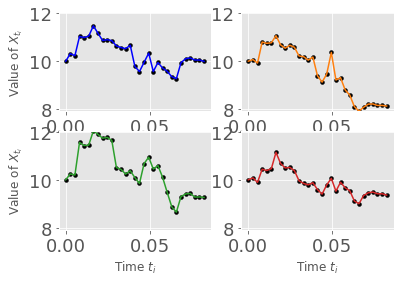

In [4]:
T = 30 / 365 # Maturity
n = 30 # Trading Dates
a_0 = [0.3,0.7]
a_1 = [0.4,0.6]
b_0 = [-0.2,0.2]
b_1 = [-0.1,0.1]
gamma = [0.5,1.5]
x_0 = 10
# Generate x and y values
times = np.linspace(0,T,n+1)
path1 = generate_path(a_0,a_1,b_0,b_1,gamma,x_0,T,n,seed = 5)
path2 = generate_path(a_0,a_1,b_0,b_1,gamma,x_0,T,n,seed = 5)
path3 = generate_path(a_0,a_1,b_0,b_1,gamma,x_0,T,n,seed = 5)
path4 = generate_path(a_0,a_1,b_0,b_1,gamma,x_0,T,n,seed = 5)


#plot
fig, axs = plt.subplots(2, 2)
ylim_1 = min([min(path1),min(path2),min(path3),min(path4)])
ylim_2 = max([max(path1),max(path2),max(path3),max(path4)])
axs[0, 0].plot(times, path1,color="blue")
axs[0, 0].scatter(times, path1,color="black",s=15)
axs[0, 0].set(ylabel="Value of " + "$X_{t_i}$",ylim= [ylim_1,ylim_2])
axs[0, 1].plot(times, path2, 'tab:orange')
axs[0, 1].scatter(times, path2,color="black",s=15)
axs[0, 1].set(ylim= [ylim_1,ylim_2])
axs[1, 0].plot(times, path3, 'tab:green')
axs[1, 0].scatter(times, path3,color="black",s=15)
axs[1, 0].set(xlabel="Time "+"$t_i$", ylabel="Value of " + "$X_{t_i}$",ylim= [ylim_1,ylim_2])
axs[1, 1].plot(times, path4, 'tab:red')
axs[1, 1].scatter(times, path4,color="black",s=15)
axs[1, 1].set(xlabel="Time "+"$t_i$",ylim= [ylim_1,ylim_2])
plt.show()

Write a function to determine the optimal hedge based on a deep learning approach

Test it in a purely nonlinear setting:

$$
d X_t = (b_0+b_1 X_t) dt + (a_0+a_1 X_t)^{\gamma} dW_t
$$

for 

\begin{align}
a_0 &\in [0.3,0.7] \\
a_1 &\in [0.4,0.6] \\
b_0 &\in [-0.2,0.2] \\
b_1 &\in [-0.1,0.1] \\
\gamma &\in [0.5,1.5]
\end{align}

with payoff function $\Phi(X_T)=(X_T-X_0)^+$.

In [5]:
T = 30 / 365 # Maturity
n = 30 # Trading Dates
a_0 = [0.3,0.7]
a_1 = [0.4,0.6]
b_0 = [-0.2,0.2]
b_1 = [-0.1,0.1]
gamma = [0.5,1.5]
x_0 = 10.
def derivative(path):
    return tf.nn.relu(path[-1]-x_0)

price, hedge = optimal_hedge(derivative,a_0,a_1,b_0,b_1,gamma,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 10000,l_r = 0.005,BATCH_SIZE =256)

  0%|          | 11/10000 [00:07<1:49:54,  1.51it/s]

Iteration:10, Price of Hedge: 0.8187639117240906, Loss: 0.2242182344198227


  0%|          | 21/10000 [00:14<1:49:38,  1.52it/s]

Iteration:20, Price of Hedge: 0.8172227740287781, Loss: 0.2662412226200104


  0%|          | 31/10000 [00:21<2:03:18,  1.35it/s]

Iteration:30, Price of Hedge: 0.8064921498298645, Loss: 0.2149941325187683


  0%|          | 41/10000 [00:28<1:59:41,  1.39it/s]

Iteration:40, Price of Hedge: 0.7957075834274292, Loss: 0.18807166814804077


  1%|          | 51/10000 [00:35<1:58:40,  1.40it/s]

Iteration:50, Price of Hedge: 0.7920147776603699, Loss: 0.20685428380966187


  1%|          | 61/10000 [00:43<1:55:07,  1.44it/s]

Iteration:60, Price of Hedge: 0.7856436371803284, Loss: 0.18333420157432556


  1%|          | 71/10000 [00:50<1:56:02,  1.43it/s]

Iteration:70, Price of Hedge: 0.7843449115753174, Loss: 0.17513617873191833


  1%|          | 81/10000 [00:57<2:07:36,  1.30it/s]

Iteration:80, Price of Hedge: 0.784634530544281, Loss: 0.1799173206090927


  1%|          | 91/10000 [01:05<2:04:09,  1.33it/s]

Iteration:90, Price of Hedge: 0.7862237691879272, Loss: 0.1490408182144165


  1%|          | 101/10000 [01:12<1:53:06,  1.46it/s]

Iteration:100, Price of Hedge: 0.7850161194801331, Loss: 0.13362722098827362


  1%|          | 111/10000 [01:19<1:53:12,  1.46it/s]

Iteration:110, Price of Hedge: 0.78267502784729, Loss: 0.16185122728347778


  1%|          | 121/10000 [01:25<1:50:43,  1.49it/s]

Iteration:120, Price of Hedge: 0.7876958250999451, Loss: 0.10541006922721863


  1%|▏         | 131/10000 [01:32<1:50:19,  1.49it/s]

Iteration:130, Price of Hedge: 0.7937197685241699, Loss: 0.1487557739019394


  1%|▏         | 141/10000 [01:39<1:50:03,  1.49it/s]

Iteration:140, Price of Hedge: 0.7916728258132935, Loss: 0.1474573165178299


  2%|▏         | 151/10000 [01:46<1:50:47,  1.48it/s]

Iteration:150, Price of Hedge: 0.7898923754692078, Loss: 0.11089449375867844


  2%|▏         | 161/10000 [01:52<1:50:28,  1.48it/s]

Iteration:160, Price of Hedge: 0.7934876680374146, Loss: 0.09349118918180466


  2%|▏         | 171/10000 [01:59<1:53:21,  1.45it/s]

Iteration:170, Price of Hedge: 0.7918792963027954, Loss: 0.08567816019058228


  2%|▏         | 181/10000 [02:06<1:49:24,  1.50it/s]

Iteration:180, Price of Hedge: 0.7945981025695801, Loss: 0.2130213975906372


  2%|▏         | 191/10000 [02:13<1:47:27,  1.52it/s]

Iteration:190, Price of Hedge: 0.7900294065475464, Loss: 0.08632930368185043


  2%|▏         | 201/10000 [02:20<1:54:25,  1.43it/s]

Iteration:200, Price of Hedge: 0.788122296333313, Loss: 0.10392268002033234


  2%|▏         | 211/10000 [02:26<1:49:47,  1.49it/s]

Iteration:210, Price of Hedge: 0.7959778308868408, Loss: 0.085462786257267


  2%|▏         | 221/10000 [02:33<1:47:27,  1.52it/s]

Iteration:220, Price of Hedge: 0.7969973087310791, Loss: 0.10674472153186798


  2%|▏         | 231/10000 [02:41<1:59:42,  1.36it/s]

Iteration:230, Price of Hedge: 0.7945452928543091, Loss: 0.11524327844381332


  2%|▏         | 241/10000 [02:48<2:00:59,  1.34it/s]

Iteration:240, Price of Hedge: 0.7877086997032166, Loss: 0.08586348593235016


  3%|▎         | 251/10000 [02:56<2:01:02,  1.34it/s]

Iteration:250, Price of Hedge: 0.7910293340682983, Loss: 0.12930454313755035


  3%|▎         | 261/10000 [03:04<2:11:54,  1.23it/s]

Iteration:260, Price of Hedge: 0.7938169240951538, Loss: 0.12161989510059357


  3%|▎         | 271/10000 [03:12<2:08:04,  1.27it/s]

Iteration:270, Price of Hedge: 0.8092437386512756, Loss: 0.13408851623535156


  3%|▎         | 281/10000 [03:19<1:57:27,  1.38it/s]

Iteration:280, Price of Hedge: 0.8052967190742493, Loss: 0.09081170707941055


  3%|▎         | 291/10000 [03:26<1:59:11,  1.36it/s]

Iteration:290, Price of Hedge: 0.7891854643821716, Loss: 0.1872372180223465


  3%|▎         | 301/10000 [03:34<1:59:58,  1.35it/s]

Iteration:300, Price of Hedge: 0.7911152243614197, Loss: 1.4389121532440186


  3%|▎         | 311/10000 [03:41<2:00:15,  1.34it/s]

Iteration:310, Price of Hedge: 0.7852195501327515, Loss: 0.5492412447929382


  3%|▎         | 321/10000 [03:48<1:57:57,  1.37it/s]

Iteration:320, Price of Hedge: 0.7906327843666077, Loss: 0.1694231480360031


  3%|▎         | 331/10000 [03:56<1:58:40,  1.36it/s]

Iteration:330, Price of Hedge: 0.7950349450111389, Loss: 0.17623749375343323


  3%|▎         | 341/10000 [04:03<1:51:54,  1.44it/s]

Iteration:340, Price of Hedge: 0.8000598549842834, Loss: 0.1479128897190094


  4%|▎         | 351/10000 [04:09<1:46:55,  1.50it/s]

Iteration:350, Price of Hedge: 0.7951814532279968, Loss: 0.12289489805698395


  4%|▎         | 361/10000 [04:16<1:50:55,  1.45it/s]

Iteration:360, Price of Hedge: 0.7870897650718689, Loss: 0.1239464208483696


  4%|▎         | 371/10000 [04:23<1:48:14,  1.48it/s]

Iteration:370, Price of Hedge: 0.788483202457428, Loss: 0.09911920130252838


  4%|▍         | 381/10000 [04:30<1:46:55,  1.50it/s]

Iteration:380, Price of Hedge: 0.796019971370697, Loss: 0.09867408871650696


  4%|▍         | 391/10000 [04:36<1:45:25,  1.52it/s]

Iteration:390, Price of Hedge: 0.7958127856254578, Loss: 0.12277257442474365


  4%|▍         | 401/10000 [04:43<1:47:30,  1.49it/s]

Iteration:400, Price of Hedge: 0.7946118116378784, Loss: 0.08547147363424301


  4%|▍         | 411/10000 [04:50<1:45:48,  1.51it/s]

Iteration:410, Price of Hedge: 0.795124351978302, Loss: 0.07984119653701782


  4%|▍         | 421/10000 [04:56<1:49:12,  1.46it/s]

Iteration:420, Price of Hedge: 0.797744870185852, Loss: 0.08854933083057404


  4%|▍         | 431/10000 [05:05<2:34:59,  1.03it/s]

Iteration:430, Price of Hedge: 0.7982178926467896, Loss: 0.11399907618761063


  4%|▍         | 441/10000 [05:13<1:50:11,  1.45it/s]

Iteration:440, Price of Hedge: 0.7935073375701904, Loss: 0.08741094917058945


  5%|▍         | 451/10000 [05:20<1:48:22,  1.47it/s]

Iteration:450, Price of Hedge: 0.7931768298149109, Loss: 0.1746102273464203


  5%|▍         | 461/10000 [05:26<1:45:57,  1.50it/s]

Iteration:460, Price of Hedge: 0.7851334810256958, Loss: 0.09945683926343918


  5%|▍         | 471/10000 [05:33<1:49:55,  1.44it/s]

Iteration:470, Price of Hedge: 0.775695264339447, Loss: 0.09887619316577911


  5%|▍         | 481/10000 [05:40<1:45:23,  1.51it/s]

Iteration:480, Price of Hedge: 0.7872004508972168, Loss: 0.1133083775639534


  5%|▍         | 491/10000 [05:46<1:45:56,  1.50it/s]

Iteration:490, Price of Hedge: 0.7874519228935242, Loss: 0.11380206048488617


  5%|▌         | 501/10000 [05:53<1:47:28,  1.47it/s]

Iteration:500, Price of Hedge: 0.7919933795928955, Loss: 0.13523425161838531


  5%|▌         | 511/10000 [06:00<1:46:37,  1.48it/s]

Iteration:510, Price of Hedge: 0.7904613018035889, Loss: 0.08177559077739716


  5%|▌         | 521/10000 [06:07<1:48:12,  1.46it/s]

Iteration:520, Price of Hedge: 0.7960166335105896, Loss: 0.13917481899261475


  5%|▌         | 531/10000 [06:14<1:47:23,  1.47it/s]

Iteration:530, Price of Hedge: 0.8013365864753723, Loss: 0.0896325409412384


  5%|▌         | 541/10000 [06:21<1:56:52,  1.35it/s]

Iteration:540, Price of Hedge: 0.7874085903167725, Loss: 0.11089617758989334


  6%|▌         | 551/10000 [06:28<1:47:13,  1.47it/s]

Iteration:550, Price of Hedge: 0.7864730954170227, Loss: 0.08710765838623047


  6%|▌         | 561/10000 [06:34<1:44:43,  1.50it/s]

Iteration:560, Price of Hedge: 0.7953600883483887, Loss: 0.27438271045684814


  6%|▌         | 571/10000 [06:41<1:46:04,  1.48it/s]

Iteration:570, Price of Hedge: 0.7953147888183594, Loss: 0.09745416045188904


  6%|▌         | 581/10000 [06:48<1:42:56,  1.53it/s]

Iteration:580, Price of Hedge: 0.7978947758674622, Loss: 0.10584509372711182


  6%|▌         | 591/10000 [06:55<1:47:06,  1.46it/s]

Iteration:590, Price of Hedge: 0.78751540184021, Loss: 0.3026900291442871


  6%|▌         | 601/10000 [07:02<1:52:13,  1.40it/s]

Iteration:600, Price of Hedge: 0.783693790435791, Loss: 0.10177358984947205


  6%|▌         | 611/10000 [07:09<1:54:32,  1.37it/s]

Iteration:610, Price of Hedge: 0.79325932264328, Loss: 0.18192428350448608


  6%|▌         | 621/10000 [07:16<1:55:18,  1.36it/s]

Iteration:620, Price of Hedge: 0.7960101962089539, Loss: 0.08538345247507095


  6%|▋         | 631/10000 [07:23<1:53:15,  1.38it/s]

Iteration:630, Price of Hedge: 0.7973936796188354, Loss: 0.0800672322511673


  6%|▋         | 641/10000 [07:31<1:52:41,  1.38it/s]

Iteration:640, Price of Hedge: 0.7976638674736023, Loss: 0.07734441757202148


  7%|▋         | 651/10000 [07:38<1:53:54,  1.37it/s]

Iteration:650, Price of Hedge: 0.797603189945221, Loss: 0.07443778216838837


  7%|▋         | 661/10000 [07:45<1:52:45,  1.38it/s]

Iteration:660, Price of Hedge: 0.7997704744338989, Loss: 0.07140924036502838


  7%|▋         | 671/10000 [07:52<1:51:38,  1.39it/s]

Iteration:670, Price of Hedge: 0.7932819724082947, Loss: 0.06884448230266571


  7%|▋         | 681/10000 [08:00<1:53:40,  1.37it/s]

Iteration:680, Price of Hedge: 0.7891502380371094, Loss: 0.08962380141019821


  7%|▋         | 691/10000 [08:07<1:49:30,  1.42it/s]

Iteration:690, Price of Hedge: 0.7889681458473206, Loss: 0.07544535398483276


  7%|▋         | 701/10000 [08:14<1:54:54,  1.35it/s]

Iteration:700, Price of Hedge: 0.8003666400909424, Loss: 0.06289646774530411


  7%|▋         | 711/10000 [08:21<1:56:19,  1.33it/s]

Iteration:710, Price of Hedge: 0.7956186532974243, Loss: 0.09231741726398468


  7%|▋         | 721/10000 [08:29<1:56:24,  1.33it/s]

Iteration:720, Price of Hedge: 0.7877126932144165, Loss: 0.08701782673597336


  7%|▋         | 731/10000 [08:36<1:49:38,  1.41it/s]

Iteration:730, Price of Hedge: 0.7934969663619995, Loss: 0.06786252558231354


  7%|▋         | 741/10000 [08:43<1:45:08,  1.47it/s]

Iteration:740, Price of Hedge: 0.7973760962486267, Loss: 0.07652278244495392


  8%|▊         | 751/10000 [08:50<1:47:58,  1.43it/s]

Iteration:750, Price of Hedge: 0.7918214201927185, Loss: 0.0694657564163208


  8%|▊         | 761/10000 [08:57<1:51:35,  1.38it/s]

Iteration:760, Price of Hedge: 0.7865501046180725, Loss: 0.06984344124794006


  8%|▊         | 771/10000 [09:04<1:49:00,  1.41it/s]

Iteration:770, Price of Hedge: 0.7869839668273926, Loss: 0.07428289204835892


  8%|▊         | 781/10000 [09:11<1:45:18,  1.46it/s]

Iteration:780, Price of Hedge: 0.8044923543930054, Loss: 0.06472102552652359


  8%|▊         | 791/10000 [09:18<1:48:54,  1.41it/s]

Iteration:790, Price of Hedge: 0.8001527786254883, Loss: 0.05591599643230438


  8%|▊         | 801/10000 [09:25<1:44:19,  1.47it/s]

Iteration:800, Price of Hedge: 0.792922854423523, Loss: 0.06319994479417801


  8%|▊         | 811/10000 [09:32<1:41:07,  1.51it/s]

Iteration:810, Price of Hedge: 0.7907289862632751, Loss: 0.06746731698513031


  8%|▊         | 821/10000 [09:38<1:42:34,  1.49it/s]

Iteration:820, Price of Hedge: 0.7887880802154541, Loss: 0.06922351568937302


  8%|▊         | 831/10000 [09:45<1:42:30,  1.49it/s]

Iteration:830, Price of Hedge: 0.7921525835990906, Loss: 0.05137547850608826


  8%|▊         | 841/10000 [09:52<1:42:47,  1.49it/s]

Iteration:840, Price of Hedge: 0.794030487537384, Loss: 0.05069424957036972


  9%|▊         | 851/10000 [09:58<1:42:49,  1.48it/s]

Iteration:850, Price of Hedge: 0.7914847135543823, Loss: 0.056954313069581985


  9%|▊         | 861/10000 [10:05<1:47:13,  1.42it/s]

Iteration:860, Price of Hedge: 0.7889012694358826, Loss: 0.06878377497196198


  9%|▊         | 871/10000 [10:12<1:40:51,  1.51it/s]

Iteration:870, Price of Hedge: 0.7888853549957275, Loss: 0.07741191238164902


  9%|▉         | 881/10000 [10:20<2:08:35,  1.18it/s]

Iteration:880, Price of Hedge: 0.7986701130867004, Loss: 0.057403773069381714


  9%|▉         | 891/10000 [10:28<2:04:28,  1.22it/s]

Iteration:890, Price of Hedge: 0.7997236251831055, Loss: 0.060243457555770874


  9%|▉         | 901/10000 [10:36<2:02:00,  1.24it/s]

Iteration:900, Price of Hedge: 0.7969925999641418, Loss: 0.05402851849794388


  9%|▉         | 911/10000 [10:44<1:58:38,  1.28it/s]

Iteration:910, Price of Hedge: 0.7910899519920349, Loss: 0.05094771832227707


  9%|▉         | 921/10000 [10:52<1:55:43,  1.31it/s]

Iteration:920, Price of Hedge: 0.7909322381019592, Loss: 0.05018480867147446


  9%|▉         | 931/10000 [11:00<2:09:32,  1.17it/s]

Iteration:930, Price of Hedge: 0.7877850532531738, Loss: 0.05268289893865585


  9%|▉         | 941/10000 [11:09<2:13:09,  1.13it/s]

Iteration:940, Price of Hedge: 0.7873356342315674, Loss: 0.05619732290506363


 10%|▉         | 951/10000 [11:17<2:01:17,  1.24it/s]

Iteration:950, Price of Hedge: 0.7977820634841919, Loss: 0.048211175948381424


 10%|▉         | 961/10000 [11:25<1:59:39,  1.26it/s]

Iteration:960, Price of Hedge: 0.7994497418403625, Loss: 0.058773014694452286


 10%|▉         | 971/10000 [11:33<1:55:46,  1.30it/s]

Iteration:970, Price of Hedge: 0.7957098484039307, Loss: 0.046609800308942795


 10%|▉         | 981/10000 [11:40<1:57:04,  1.28it/s]

Iteration:980, Price of Hedge: 0.7923392057418823, Loss: 0.04642624408006668


 10%|▉         | 991/10000 [11:48<1:55:48,  1.30it/s]

Iteration:990, Price of Hedge: 0.7918879985809326, Loss: 0.051964111626148224


 10%|█         | 1001/10000 [11:56<1:55:51,  1.29it/s]

Iteration:1000, Price of Hedge: 0.7885688543319702, Loss: 0.041436824947595596


 10%|█         | 1011/10000 [12:04<1:55:18,  1.30it/s]

Iteration:1010, Price of Hedge: 0.794039249420166, Loss: 0.049405500292778015


 10%|█         | 1021/10000 [12:11<1:55:42,  1.29it/s]

Iteration:1020, Price of Hedge: 0.7983388900756836, Loss: 0.04193622246384621


 10%|█         | 1031/10000 [12:19<1:56:59,  1.28it/s]

Iteration:1030, Price of Hedge: 0.7912447452545166, Loss: 0.05473339557647705


 10%|█         | 1041/10000 [12:27<1:57:29,  1.27it/s]

Iteration:1040, Price of Hedge: 0.785083532333374, Loss: 0.05507521331310272


 11%|█         | 1051/10000 [12:35<1:53:03,  1.32it/s]

Iteration:1050, Price of Hedge: 0.7961597442626953, Loss: 0.052240755409002304


 11%|█         | 1061/10000 [12:43<1:55:14,  1.29it/s]

Iteration:1060, Price of Hedge: 0.7981172800064087, Loss: 0.05622061342000961


 11%|█         | 1071/10000 [12:50<1:54:37,  1.30it/s]

Iteration:1070, Price of Hedge: 0.790769100189209, Loss: 0.05967133492231369


 11%|█         | 1081/10000 [12:58<1:58:23,  1.26it/s]

Iteration:1080, Price of Hedge: 0.7920054197311401, Loss: 0.05216687172651291


 11%|█         | 1091/10000 [13:07<2:05:34,  1.18it/s]

Iteration:1090, Price of Hedge: 0.7936608195304871, Loss: 0.0529208779335022


 11%|█         | 1101/10000 [13:14<1:45:18,  1.41it/s]

Iteration:1100, Price of Hedge: 0.791826605796814, Loss: 0.05149374157190323


 11%|█         | 1111/10000 [13:21<1:38:42,  1.50it/s]

Iteration:1110, Price of Hedge: 0.7959654331207275, Loss: 0.057018447667360306


 11%|█         | 1121/10000 [13:28<1:42:05,  1.45it/s]

Iteration:1120, Price of Hedge: 0.7876742482185364, Loss: 0.06607324630022049


 11%|█▏        | 1131/10000 [13:35<1:41:14,  1.46it/s]

Iteration:1130, Price of Hedge: 0.7804884314537048, Loss: 0.0468769446015358


 11%|█▏        | 1141/10000 [13:42<1:40:16,  1.47it/s]

Iteration:1140, Price of Hedge: 0.7916747331619263, Loss: 0.054307520389556885


 12%|█▏        | 1151/10000 [13:49<1:51:06,  1.33it/s]

Iteration:1150, Price of Hedge: 0.8021274209022522, Loss: 0.05169890820980072


 12%|█▏        | 1161/10000 [13:56<1:49:24,  1.35it/s]

Iteration:1160, Price of Hedge: 0.7975003123283386, Loss: 0.038903795182704926


 12%|█▏        | 1171/10000 [14:04<1:55:31,  1.27it/s]

Iteration:1170, Price of Hedge: 0.7870815992355347, Loss: 0.060954153537750244


 12%|█▏        | 1181/10000 [14:12<1:51:55,  1.31it/s]

Iteration:1180, Price of Hedge: 0.778217077255249, Loss: 0.06562941521406174


 12%|█▏        | 1191/10000 [14:20<2:03:01,  1.19it/s]

Iteration:1190, Price of Hedge: 0.7816882729530334, Loss: 0.057602547109127045


 12%|█▏        | 1201/10000 [14:28<1:56:34,  1.26it/s]

Iteration:1200, Price of Hedge: 0.7922855019569397, Loss: 0.052132222801446915


 12%|█▏        | 1211/10000 [14:35<1:51:16,  1.32it/s]

Iteration:1210, Price of Hedge: 0.7933838963508606, Loss: 0.04475988820195198


 12%|█▏        | 1221/10000 [14:43<1:45:06,  1.39it/s]

Iteration:1220, Price of Hedge: 0.7962788343429565, Loss: 0.053868114948272705


 12%|█▏        | 1231/10000 [14:51<1:58:25,  1.23it/s]

Iteration:1230, Price of Hedge: 0.7941854000091553, Loss: 0.054744601249694824


 12%|█▏        | 1241/10000 [14:59<2:00:23,  1.21it/s]

Iteration:1240, Price of Hedge: 0.7957547903060913, Loss: 0.04545949399471283


 13%|█▎        | 1251/10000 [15:08<2:04:15,  1.17it/s]

Iteration:1250, Price of Hedge: 0.7921808362007141, Loss: 0.045346371829509735


 13%|█▎        | 1261/10000 [15:15<1:45:53,  1.38it/s]

Iteration:1260, Price of Hedge: 0.7857129573822021, Loss: 0.048474811017513275


 13%|█▎        | 1271/10000 [15:22<1:44:43,  1.39it/s]

Iteration:1270, Price of Hedge: 0.7853701710700989, Loss: 0.051244236528873444


 13%|█▎        | 1281/10000 [15:30<1:49:59,  1.32it/s]

Iteration:1280, Price of Hedge: 0.7968457937240601, Loss: 0.04688992351293564


 13%|█▎        | 1291/10000 [15:38<1:51:44,  1.30it/s]

Iteration:1290, Price of Hedge: 0.7902315258979797, Loss: 0.043722447007894516


 13%|█▎        | 1301/10000 [15:46<2:00:45,  1.20it/s]

Iteration:1300, Price of Hedge: 0.7907890677452087, Loss: 0.04031632840633392


 13%|█▎        | 1311/10000 [15:54<1:59:34,  1.21it/s]

Iteration:1310, Price of Hedge: 0.7845869064331055, Loss: 0.05138471722602844


 13%|█▎        | 1321/10000 [16:02<1:55:48,  1.25it/s]

Iteration:1320, Price of Hedge: 0.7898005843162537, Loss: 0.0494043305516243


 13%|█▎        | 1331/10000 [16:09<1:44:30,  1.38it/s]

Iteration:1330, Price of Hedge: 0.7968271374702454, Loss: 0.05717698484659195


 13%|█▎        | 1341/10000 [16:16<1:41:16,  1.42it/s]

Iteration:1340, Price of Hedge: 0.7934664487838745, Loss: 0.045706458389759064


 14%|█▎        | 1351/10000 [16:23<1:42:46,  1.40it/s]

Iteration:1350, Price of Hedge: 0.7953283190727234, Loss: 0.04387263208627701


 14%|█▎        | 1361/10000 [16:31<1:50:25,  1.30it/s]

Iteration:1360, Price of Hedge: 0.7905166149139404, Loss: 0.05095873773097992


 14%|█▎        | 1371/10000 [16:39<1:50:39,  1.30it/s]

Iteration:1370, Price of Hedge: 0.7901488542556763, Loss: 0.05225105583667755


 14%|█▍        | 1381/10000 [16:46<1:52:45,  1.27it/s]

Iteration:1380, Price of Hedge: 0.7877098917961121, Loss: 0.05661401152610779


 14%|█▍        | 1391/10000 [16:53<1:42:43,  1.40it/s]

Iteration:1390, Price of Hedge: 0.7965345978736877, Loss: 0.07065435498952866


 14%|█▍        | 1401/10000 [17:01<1:54:11,  1.25it/s]

Iteration:1400, Price of Hedge: 0.7996424436569214, Loss: 0.04502653703093529


 14%|█▍        | 1411/10000 [17:09<1:46:09,  1.35it/s]

Iteration:1410, Price of Hedge: 0.7995383143424988, Loss: 0.04809833690524101


 14%|█▍        | 1421/10000 [17:16<1:47:17,  1.33it/s]

Iteration:1420, Price of Hedge: 0.7907851934432983, Loss: 0.041542068123817444


 14%|█▍        | 1431/10000 [17:23<1:43:45,  1.38it/s]

Iteration:1430, Price of Hedge: 0.792411744594574, Loss: 0.06413018703460693


 14%|█▍        | 1441/10000 [17:30<1:35:05,  1.50it/s]

Iteration:1440, Price of Hedge: 0.7976991534233093, Loss: 0.05547783896327019


 15%|█▍        | 1451/10000 [17:37<1:37:48,  1.46it/s]

Iteration:1450, Price of Hedge: 0.7891812324523926, Loss: 0.046648040413856506


 15%|█▍        | 1461/10000 [17:44<1:36:22,  1.48it/s]

Iteration:1460, Price of Hedge: 0.7874530553817749, Loss: 0.055187515914440155


 15%|█▍        | 1471/10000 [17:51<1:43:57,  1.37it/s]

Iteration:1470, Price of Hedge: 0.7947307825088501, Loss: 0.06234690546989441


 15%|█▍        | 1481/10000 [17:58<1:42:18,  1.39it/s]

Iteration:1480, Price of Hedge: 0.7967761158943176, Loss: 0.047227125614881516


 15%|█▍        | 1491/10000 [18:05<1:39:39,  1.42it/s]

Iteration:1490, Price of Hedge: 0.7954361438751221, Loss: 0.057839009910821915


 15%|█▌        | 1501/10000 [18:12<1:38:03,  1.44it/s]

Iteration:1500, Price of Hedge: 0.7959156632423401, Loss: 0.058670688420534134


 15%|█▌        | 1511/10000 [18:20<1:47:13,  1.32it/s]

Iteration:1510, Price of Hedge: 0.797347903251648, Loss: 0.047003135085105896


 15%|█▌        | 1521/10000 [18:27<1:39:48,  1.42it/s]

Iteration:1520, Price of Hedge: 0.7934229969978333, Loss: 0.05753354728221893


 15%|█▌        | 1531/10000 [18:34<1:37:53,  1.44it/s]

Iteration:1530, Price of Hedge: 0.7948291897773743, Loss: 0.04359647259116173


 15%|█▌        | 1541/10000 [18:41<1:39:06,  1.42it/s]

Iteration:1540, Price of Hedge: 0.7919540405273438, Loss: 0.052879903465509415


 16%|█▌        | 1551/10000 [18:49<1:42:48,  1.37it/s]

Iteration:1550, Price of Hedge: 0.7876120209693909, Loss: 0.0542648509144783


 16%|█▌        | 1561/10000 [18:56<1:42:52,  1.37it/s]

Iteration:1560, Price of Hedge: 0.7973055839538574, Loss: 0.059651296585798264


 16%|█▌        | 1571/10000 [19:03<1:46:29,  1.32it/s]

Iteration:1570, Price of Hedge: 0.7917936444282532, Loss: 0.04548952728509903


 16%|█▌        | 1581/10000 [19:11<1:49:55,  1.28it/s]

Iteration:1580, Price of Hedge: 0.790981113910675, Loss: 0.04819983243942261


 16%|█▌        | 1591/10000 [19:19<1:52:45,  1.24it/s]

Iteration:1590, Price of Hedge: 0.7959646582603455, Loss: 0.05440760403871536


 16%|█▌        | 1601/10000 [19:27<1:59:17,  1.17it/s]

Iteration:1600, Price of Hedge: 0.7981387376785278, Loss: 0.045648761093616486


 16%|█▌        | 1611/10000 [19:36<2:03:04,  1.14it/s]

Iteration:1610, Price of Hedge: 0.796351432800293, Loss: 0.04548618569970131


 16%|█▌        | 1621/10000 [19:44<1:59:12,  1.17it/s]

Iteration:1620, Price of Hedge: 0.7913082838058472, Loss: 0.04567268118262291


 16%|█▋        | 1631/10000 [19:52<1:49:11,  1.28it/s]

Iteration:1630, Price of Hedge: 0.7837769985198975, Loss: 0.041774772107601166


 16%|█▋        | 1641/10000 [20:00<1:46:28,  1.31it/s]

Iteration:1640, Price of Hedge: 0.7800066471099854, Loss: 0.04853451997041702


 17%|█▋        | 1651/10000 [20:07<1:37:53,  1.42it/s]

Iteration:1650, Price of Hedge: 0.792473316192627, Loss: 0.04863755777478218


 17%|█▋        | 1661/10000 [20:15<1:45:37,  1.32it/s]

Iteration:1660, Price of Hedge: 0.7938838005065918, Loss: 0.0482029989361763


 17%|█▋        | 1671/10000 [20:22<1:41:57,  1.36it/s]

Iteration:1670, Price of Hedge: 0.8010704517364502, Loss: 0.04387013614177704


 17%|█▋        | 1681/10000 [20:30<1:50:46,  1.25it/s]

Iteration:1680, Price of Hedge: 0.7961515188217163, Loss: 0.05073412135243416


 17%|█▋        | 1691/10000 [20:37<1:41:50,  1.36it/s]

Iteration:1690, Price of Hedge: 0.7788491249084473, Loss: 0.04936131089925766


 17%|█▋        | 1701/10000 [20:45<1:40:36,  1.37it/s]

Iteration:1700, Price of Hedge: 0.7917530536651611, Loss: 0.04799552261829376


 17%|█▋        | 1711/10000 [20:52<1:41:14,  1.36it/s]

Iteration:1710, Price of Hedge: 0.7987048029899597, Loss: 0.0459597110748291


 17%|█▋        | 1721/10000 [21:00<1:40:58,  1.37it/s]

Iteration:1720, Price of Hedge: 0.7916926145553589, Loss: 0.051215965300798416


 17%|█▋        | 1731/10000 [21:08<1:54:28,  1.20it/s]

Iteration:1730, Price of Hedge: 0.7833964824676514, Loss: 0.04971003532409668


 17%|█▋        | 1741/10000 [21:16<1:48:31,  1.27it/s]

Iteration:1740, Price of Hedge: 0.7968869805335999, Loss: 0.052351243793964386


 18%|█▊        | 1751/10000 [21:24<1:52:32,  1.22it/s]

Iteration:1750, Price of Hedge: 0.798321545124054, Loss: 0.04991820082068443


 18%|█▊        | 1761/10000 [21:32<1:46:30,  1.29it/s]

Iteration:1760, Price of Hedge: 0.7900174260139465, Loss: 0.05579087510704994


 18%|█▊        | 1771/10000 [21:40<1:52:50,  1.22it/s]

Iteration:1770, Price of Hedge: 0.7902199029922485, Loss: 0.04888547956943512


 18%|█▊        | 1781/10000 [21:48<1:41:17,  1.35it/s]

Iteration:1780, Price of Hedge: 0.7883936762809753, Loss: 0.05188173055648804


 18%|█▊        | 1791/10000 [21:55<1:37:40,  1.40it/s]

Iteration:1790, Price of Hedge: 0.7902547717094421, Loss: 0.05108536779880524


 18%|█▊        | 1801/10000 [22:02<1:38:07,  1.39it/s]

Iteration:1800, Price of Hedge: 0.7950239777565002, Loss: 0.04586248844861984


 18%|█▊        | 1811/10000 [22:10<1:41:06,  1.35it/s]

Iteration:1810, Price of Hedge: 0.7949855923652649, Loss: 0.05119003355503082


 18%|█▊        | 1821/10000 [22:18<1:47:08,  1.27it/s]

Iteration:1820, Price of Hedge: 0.7877970337867737, Loss: 0.04372134059667587


 18%|█▊        | 1831/10000 [22:26<1:48:21,  1.26it/s]

Iteration:1830, Price of Hedge: 0.7883504629135132, Loss: 0.0801892951130867


 18%|█▊        | 1841/10000 [22:34<1:38:56,  1.37it/s]

Iteration:1840, Price of Hedge: 0.7914608716964722, Loss: 0.05235614255070686


 19%|█▊        | 1851/10000 [22:41<1:39:40,  1.36it/s]

Iteration:1850, Price of Hedge: 0.7983489036560059, Loss: 0.061619095504283905


 19%|█▊        | 1861/10000 [22:48<1:42:35,  1.32it/s]

Iteration:1860, Price of Hedge: 0.7881112694740295, Loss: 0.04892170429229736


 19%|█▊        | 1871/10000 [22:56<1:40:30,  1.35it/s]

Iteration:1870, Price of Hedge: 0.7908686399459839, Loss: 0.0543142631649971


 19%|█▉        | 1881/10000 [23:03<1:47:40,  1.26it/s]

Iteration:1880, Price of Hedge: 0.7902200818061829, Loss: 0.0523763969540596


 19%|█▉        | 1891/10000 [23:12<1:48:28,  1.25it/s]

Iteration:1890, Price of Hedge: 0.7797675728797913, Loss: 0.04931237921118736


 19%|█▉        | 1901/10000 [23:19<1:41:01,  1.34it/s]

Iteration:1900, Price of Hedge: 0.7797206044197083, Loss: 0.059165023267269135


 19%|█▉        | 1911/10000 [23:27<1:40:49,  1.34it/s]

Iteration:1910, Price of Hedge: 0.7846047282218933, Loss: 0.050928808748722076


 19%|█▉        | 1921/10000 [23:34<1:39:21,  1.36it/s]

Iteration:1920, Price of Hedge: 0.7934552431106567, Loss: 0.03851628303527832


 19%|█▉        | 1931/10000 [23:42<1:42:44,  1.31it/s]

Iteration:1930, Price of Hedge: 0.7911409139633179, Loss: 0.0619703084230423


 19%|█▉        | 1941/10000 [23:49<1:36:10,  1.40it/s]

Iteration:1940, Price of Hedge: 0.7872759699821472, Loss: 0.06703896820545197


 20%|█▉        | 1951/10000 [23:56<1:32:43,  1.45it/s]

Iteration:1950, Price of Hedge: 0.793388307094574, Loss: 0.06174519285559654


 20%|█▉        | 1961/10000 [24:03<1:30:15,  1.48it/s]

Iteration:1960, Price of Hedge: 0.7960767149925232, Loss: 0.05496446043252945


 20%|█▉        | 1971/10000 [24:10<1:31:10,  1.47it/s]

Iteration:1970, Price of Hedge: 0.7890053391456604, Loss: 0.068210169672966


 20%|█▉        | 1981/10000 [24:17<1:31:31,  1.46it/s]

Iteration:1980, Price of Hedge: 0.7957293391227722, Loss: 0.04675723612308502


 20%|█▉        | 1991/10000 [24:24<1:38:50,  1.35it/s]

Iteration:1990, Price of Hedge: 0.805756151676178, Loss: 0.05241287499666214


 20%|██        | 2001/10000 [24:31<1:34:07,  1.42it/s]

Iteration:2000, Price of Hedge: 0.7894030809402466, Loss: 0.048753995448350906


 20%|██        | 2011/10000 [24:38<1:37:29,  1.37it/s]

Iteration:2010, Price of Hedge: 0.788467526435852, Loss: 0.050822120159864426


 20%|██        | 2021/10000 [24:45<1:41:31,  1.31it/s]

Iteration:2020, Price of Hedge: 0.7915948629379272, Loss: 0.054269939661026


 20%|██        | 2031/10000 [24:53<1:36:29,  1.38it/s]

Iteration:2030, Price of Hedge: 0.7867564558982849, Loss: 0.04191049560904503


 20%|██        | 2041/10000 [25:00<1:40:40,  1.32it/s]

Iteration:2040, Price of Hedge: 0.7804925441741943, Loss: 0.05105374753475189


 21%|██        | 2051/10000 [25:09<1:52:37,  1.18it/s]

Iteration:2050, Price of Hedge: 0.7838479280471802, Loss: 0.08758337795734406


 21%|██        | 2061/10000 [25:18<1:57:43,  1.12it/s]

Iteration:2060, Price of Hedge: 0.7987393140792847, Loss: 0.04397480934858322


 21%|██        | 2071/10000 [25:26<1:46:35,  1.24it/s]

Iteration:2070, Price of Hedge: 0.7889310121536255, Loss: 0.059984639286994934


 21%|██        | 2081/10000 [25:33<1:36:18,  1.37it/s]

Iteration:2080, Price of Hedge: 0.7880952954292297, Loss: 0.043514762073755264


 21%|██        | 2091/10000 [25:40<1:28:02,  1.50it/s]

Iteration:2090, Price of Hedge: 0.7954040169715881, Loss: 0.05273102968931198


 21%|██        | 2101/10000 [25:47<1:28:07,  1.49it/s]

Iteration:2100, Price of Hedge: 0.7905490398406982, Loss: 0.05258217826485634


 21%|██        | 2111/10000 [25:54<1:28:43,  1.48it/s]

Iteration:2110, Price of Hedge: 0.7890451550483704, Loss: 0.052020519971847534


 21%|██        | 2121/10000 [26:00<1:27:13,  1.51it/s]

Iteration:2120, Price of Hedge: 0.7989967465400696, Loss: 0.04641827195882797


 21%|██▏       | 2131/10000 [26:07<1:29:44,  1.46it/s]

Iteration:2130, Price of Hedge: 0.7972351312637329, Loss: 0.04663488641381264


 21%|██▏       | 2141/10000 [26:14<1:33:11,  1.41it/s]

Iteration:2140, Price of Hedge: 0.7847642302513123, Loss: 0.04513610154390335


 22%|██▏       | 2151/10000 [26:21<1:31:11,  1.43it/s]

Iteration:2150, Price of Hedge: 0.7803100943565369, Loss: 0.06098755821585655


 22%|██▏       | 2161/10000 [26:28<1:31:38,  1.43it/s]

Iteration:2160, Price of Hedge: 0.790655255317688, Loss: 0.05493158474564552


 22%|██▏       | 2171/10000 [26:35<1:35:19,  1.37it/s]

Iteration:2170, Price of Hedge: 0.7959232330322266, Loss: 0.05907907336950302


 22%|██▏       | 2181/10000 [26:43<1:34:35,  1.38it/s]

Iteration:2180, Price of Hedge: 0.7882838845252991, Loss: 0.04430990666151047


 22%|██▏       | 2191/10000 [26:51<1:50:28,  1.18it/s]

Iteration:2190, Price of Hedge: 0.7840494513511658, Loss: 0.04372676461935043


 22%|██▏       | 2201/10000 [26:59<1:49:55,  1.18it/s]

Iteration:2200, Price of Hedge: 0.7865176796913147, Loss: 0.05442630127072334


 22%|██▏       | 2211/10000 [27:08<1:50:16,  1.18it/s]

Iteration:2210, Price of Hedge: 0.7866214513778687, Loss: 0.04683949425816536


 22%|██▏       | 2221/10000 [27:16<1:56:26,  1.11it/s]

Iteration:2220, Price of Hedge: 0.8015848398208618, Loss: 0.06331100314855576


 22%|██▏       | 2231/10000 [27:25<1:56:00,  1.12it/s]

Iteration:2230, Price of Hedge: 0.7963714003562927, Loss: 0.048784416168928146


 22%|██▏       | 2241/10000 [27:34<1:50:44,  1.17it/s]

Iteration:2240, Price of Hedge: 0.791454553604126, Loss: 0.04570396617054939


 23%|██▎       | 2251/10000 [27:42<1:42:03,  1.27it/s]

Iteration:2250, Price of Hedge: 0.7913641929626465, Loss: 0.05254902318120003


 23%|██▎       | 2261/10000 [27:49<1:30:15,  1.43it/s]

Iteration:2260, Price of Hedge: 0.7878497242927551, Loss: 0.051789790391922


 23%|██▎       | 2271/10000 [27:56<1:32:29,  1.39it/s]

Iteration:2270, Price of Hedge: 0.7907654047012329, Loss: 0.03847675025463104


 23%|██▎       | 2281/10000 [28:04<1:38:18,  1.31it/s]

Iteration:2280, Price of Hedge: 0.7942435145378113, Loss: 0.05116833746433258


 23%|██▎       | 2291/10000 [28:12<1:41:30,  1.27it/s]

Iteration:2290, Price of Hedge: 0.7916340231895447, Loss: 0.050169870257377625


 23%|██▎       | 2301/10000 [28:19<1:31:06,  1.41it/s]

Iteration:2300, Price of Hedge: 0.7902491092681885, Loss: 0.058221131563186646


 23%|██▎       | 2311/10000 [28:26<1:31:32,  1.40it/s]

Iteration:2310, Price of Hedge: 0.7893083095550537, Loss: 0.053104154765605927


 23%|██▎       | 2321/10000 [28:33<1:26:21,  1.48it/s]

Iteration:2320, Price of Hedge: 0.7866978049278259, Loss: 0.044213227927684784


 23%|██▎       | 2331/10000 [28:40<1:25:58,  1.49it/s]

Iteration:2330, Price of Hedge: 0.7964197993278503, Loss: 0.05247606337070465


 23%|██▎       | 2341/10000 [28:47<1:25:57,  1.49it/s]

Iteration:2340, Price of Hedge: 0.7949074506759644, Loss: 0.044538386166095734


 24%|██▎       | 2351/10000 [28:53<1:29:40,  1.42it/s]

Iteration:2350, Price of Hedge: 0.7843125462532043, Loss: 0.04523976519703865


 24%|██▎       | 2361/10000 [29:01<1:31:53,  1.39it/s]

Iteration:2360, Price of Hedge: 0.7863485217094421, Loss: 0.03531090170145035


 24%|██▎       | 2371/10000 [29:08<1:31:18,  1.39it/s]

Iteration:2370, Price of Hedge: 0.798068106174469, Loss: 0.04281168431043625


 24%|██▍       | 2381/10000 [29:15<1:30:53,  1.40it/s]

Iteration:2380, Price of Hedge: 0.7909525036811829, Loss: 0.06426576524972916


 24%|██▍       | 2391/10000 [29:22<1:26:46,  1.46it/s]

Iteration:2390, Price of Hedge: 0.7853519916534424, Loss: 0.05059238150715828


 24%|██▍       | 2401/10000 [29:28<1:26:12,  1.47it/s]

Iteration:2400, Price of Hedge: 0.7929648160934448, Loss: 0.04448150098323822


 24%|██▍       | 2411/10000 [29:35<1:26:32,  1.46it/s]

Iteration:2410, Price of Hedge: 0.7972682118415833, Loss: 0.0684497058391571


 24%|██▍       | 2421/10000 [29:42<1:28:27,  1.43it/s]

Iteration:2420, Price of Hedge: 0.7941671013832092, Loss: 0.05492113530635834


 24%|██▍       | 2431/10000 [29:50<1:32:06,  1.37it/s]

Iteration:2430, Price of Hedge: 0.7855854034423828, Loss: 0.055892907083034515


 24%|██▍       | 2441/10000 [29:57<1:34:41,  1.33it/s]

Iteration:2440, Price of Hedge: 0.7873030304908752, Loss: 0.052427858114242554


 25%|██▍       | 2451/10000 [30:05<1:40:07,  1.26it/s]

Iteration:2450, Price of Hedge: 0.8000693917274475, Loss: 0.054520994424819946


 25%|██▍       | 2461/10000 [30:13<1:37:33,  1.29it/s]

Iteration:2460, Price of Hedge: 0.8014066815376282, Loss: 0.05206400528550148


 25%|██▍       | 2471/10000 [30:20<1:30:11,  1.39it/s]

Iteration:2470, Price of Hedge: 0.7968505024909973, Loss: 0.0836857482790947


 25%|██▍       | 2481/10000 [30:27<1:28:55,  1.41it/s]

Iteration:2480, Price of Hedge: 0.7911757826805115, Loss: 0.06571079790592194


 25%|██▍       | 2491/10000 [30:34<1:24:28,  1.48it/s]

Iteration:2490, Price of Hedge: 0.7966432571411133, Loss: 0.05214974656701088


 25%|██▌       | 2501/10000 [30:41<1:25:05,  1.47it/s]

Iteration:2500, Price of Hedge: 0.7982380986213684, Loss: 0.0456322580575943


 25%|██▌       | 2511/10000 [30:47<1:23:29,  1.49it/s]

Iteration:2510, Price of Hedge: 0.7933884859085083, Loss: 0.04575994610786438


 25%|██▌       | 2521/10000 [30:54<1:26:23,  1.44it/s]

Iteration:2520, Price of Hedge: 0.7890467047691345, Loss: 0.05028408020734787


 25%|██▌       | 2531/10000 [31:01<1:23:25,  1.49it/s]

Iteration:2530, Price of Hedge: 0.7938803434371948, Loss: 0.04886380583047867


 25%|██▌       | 2541/10000 [31:08<1:38:08,  1.27it/s]

Iteration:2540, Price of Hedge: 0.7937949895858765, Loss: 0.049873121082782745


 26%|██▌       | 2551/10000 [31:16<1:35:43,  1.30it/s]

Iteration:2550, Price of Hedge: 0.790372371673584, Loss: 0.053153641521930695


 26%|██▌       | 2561/10000 [31:23<1:25:06,  1.46it/s]

Iteration:2560, Price of Hedge: 0.7860700488090515, Loss: 0.055141158401966095


 26%|██▌       | 2571/10000 [31:31<1:26:52,  1.43it/s]

Iteration:2570, Price of Hedge: 0.7894551157951355, Loss: 0.0346359983086586


 26%|██▌       | 2581/10000 [31:38<1:30:06,  1.37it/s]

Iteration:2580, Price of Hedge: 0.7940704226493835, Loss: 0.04192968085408211


 26%|██▌       | 2591/10000 [31:45<1:27:35,  1.41it/s]

Iteration:2590, Price of Hedge: 0.799404501914978, Loss: 0.04861559718847275


 26%|██▌       | 2601/10000 [31:52<1:25:32,  1.44it/s]

Iteration:2600, Price of Hedge: 0.7917676568031311, Loss: 0.05160658061504364


 26%|██▌       | 2611/10000 [32:00<1:28:52,  1.39it/s]

Iteration:2610, Price of Hedge: 0.7940607070922852, Loss: 0.04170040786266327


 26%|██▌       | 2621/10000 [32:07<1:27:56,  1.40it/s]

Iteration:2620, Price of Hedge: 0.7841646075248718, Loss: 0.04754689335823059


 26%|██▋       | 2631/10000 [32:15<1:30:05,  1.36it/s]

Iteration:2630, Price of Hedge: 0.7933270335197449, Loss: 0.0534898042678833


 26%|██▋       | 2641/10000 [32:22<1:30:50,  1.35it/s]

Iteration:2640, Price of Hedge: 0.8023585081100464, Loss: 0.048276543617248535


 27%|██▋       | 2651/10000 [32:30<1:40:37,  1.22it/s]

Iteration:2650, Price of Hedge: 0.7877954244613647, Loss: 0.03986051678657532


 27%|██▋       | 2661/10000 [32:37<1:30:57,  1.34it/s]

Iteration:2660, Price of Hedge: 0.7848316431045532, Loss: 0.042311109602451324


 27%|██▋       | 2671/10000 [32:44<1:21:56,  1.49it/s]

Iteration:2670, Price of Hedge: 0.7866626381874084, Loss: 0.0457405149936676


 27%|██▋       | 2681/10000 [32:51<1:23:27,  1.46it/s]

Iteration:2680, Price of Hedge: 0.8010709285736084, Loss: 0.059922028332948685


 27%|██▋       | 2691/10000 [32:58<1:28:45,  1.37it/s]

Iteration:2690, Price of Hedge: 0.7929478287696838, Loss: 0.050342921167612076


 27%|██▋       | 2701/10000 [33:05<1:31:06,  1.34it/s]

Iteration:2700, Price of Hedge: 0.7921875715255737, Loss: 0.046746931970119476


 27%|██▋       | 2711/10000 [33:12<1:25:44,  1.42it/s]

Iteration:2710, Price of Hedge: 0.7943637371063232, Loss: 0.053024206310510635


 27%|██▋       | 2721/10000 [33:19<1:24:11,  1.44it/s]

Iteration:2720, Price of Hedge: 0.7959381341934204, Loss: 0.052588626742362976


 27%|██▋       | 2731/10000 [33:26<1:20:48,  1.50it/s]

Iteration:2730, Price of Hedge: 0.7890569567680359, Loss: 0.06380631774663925


 27%|██▋       | 2741/10000 [33:33<1:30:49,  1.33it/s]

Iteration:2740, Price of Hedge: 0.786979615688324, Loss: 0.05049010366201401


 28%|██▊       | 2751/10000 [33:40<1:31:50,  1.32it/s]

Iteration:2750, Price of Hedge: 0.802186131477356, Loss: 0.06223364546895027


 28%|██▊       | 2761/10000 [33:47<1:21:51,  1.47it/s]

Iteration:2760, Price of Hedge: 0.7821155786514282, Loss: 0.04086882621049881


 28%|██▊       | 2771/10000 [33:54<1:25:38,  1.41it/s]

Iteration:2770, Price of Hedge: 0.7960768938064575, Loss: 0.04961086064577103


 28%|██▊       | 2781/10000 [34:01<1:24:37,  1.42it/s]

Iteration:2780, Price of Hedge: 0.7945806384086609, Loss: 0.04990573972463608


 28%|██▊       | 2791/10000 [34:08<1:27:17,  1.38it/s]

Iteration:2790, Price of Hedge: 0.7871074080467224, Loss: 0.10040052235126495


 28%|██▊       | 2801/10000 [34:15<1:22:07,  1.46it/s]

Iteration:2800, Price of Hedge: 0.796028733253479, Loss: 0.061980850994586945


 28%|██▊       | 2811/10000 [34:22<1:30:20,  1.33it/s]

Iteration:2810, Price of Hedge: 0.7932882905006409, Loss: 0.07097508013248444


 28%|██▊       | 2821/10000 [34:30<1:33:49,  1.28it/s]

Iteration:2820, Price of Hedge: 0.7978394627571106, Loss: 0.05270260199904442


 28%|██▊       | 2831/10000 [34:37<1:26:22,  1.38it/s]

Iteration:2830, Price of Hedge: 0.7917007803916931, Loss: 0.06167541816830635


 28%|██▊       | 2841/10000 [34:45<1:30:17,  1.32it/s]

Iteration:2840, Price of Hedge: 0.7847860455513, Loss: 0.053422510623931885


 29%|██▊       | 2851/10000 [34:52<1:30:21,  1.32it/s]

Iteration:2850, Price of Hedge: 0.7871740460395813, Loss: 0.046063318848609924


 29%|██▊       | 2861/10000 [34:59<1:25:30,  1.39it/s]

Iteration:2860, Price of Hedge: 0.7950990200042725, Loss: 0.05018512159585953


 29%|██▊       | 2871/10000 [35:06<1:27:04,  1.36it/s]

Iteration:2870, Price of Hedge: 0.7921905517578125, Loss: 0.050268616527318954


 29%|██▉       | 2881/10000 [35:14<1:31:38,  1.29it/s]

Iteration:2880, Price of Hedge: 0.7943130135536194, Loss: 0.039996854960918427


 29%|██▉       | 2891/10000 [35:21<1:24:13,  1.41it/s]

Iteration:2890, Price of Hedge: 0.7986903190612793, Loss: 0.0359894260764122


 29%|██▉       | 2901/10000 [35:28<1:23:41,  1.41it/s]

Iteration:2900, Price of Hedge: 0.7883443832397461, Loss: 0.03812054544687271


 29%|██▉       | 2911/10000 [35:35<1:21:02,  1.46it/s]

Iteration:2910, Price of Hedge: 0.787954568862915, Loss: 0.05267230421304703


 29%|██▉       | 2921/10000 [35:42<1:20:50,  1.46it/s]

Iteration:2920, Price of Hedge: 0.791917622089386, Loss: 0.045960210263729095


 29%|██▉       | 2931/10000 [35:50<1:29:15,  1.32it/s]

Iteration:2930, Price of Hedge: 0.7927399277687073, Loss: 0.04425625130534172


 29%|██▉       | 2941/10000 [35:58<1:39:22,  1.18it/s]

Iteration:2940, Price of Hedge: 0.7848440408706665, Loss: 0.04864819720387459


 30%|██▉       | 2951/10000 [36:05<1:22:26,  1.43it/s]

Iteration:2950, Price of Hedge: 0.7860995531082153, Loss: 0.041172295808792114


 30%|██▉       | 2961/10000 [36:12<1:26:35,  1.35it/s]

Iteration:2960, Price of Hedge: 0.7971881628036499, Loss: 0.05222189426422119


 30%|██▉       | 2971/10000 [36:19<1:22:43,  1.42it/s]

Iteration:2970, Price of Hedge: 0.7903505563735962, Loss: 0.04522617906332016


 30%|██▉       | 2981/10000 [36:26<1:25:55,  1.36it/s]

Iteration:2980, Price of Hedge: 0.7913327813148499, Loss: 0.04858997091650963


 30%|██▉       | 2991/10000 [36:33<1:22:36,  1.41it/s]

Iteration:2990, Price of Hedge: 0.7925190329551697, Loss: 0.0494389533996582


 30%|███       | 3001/10000 [36:40<1:18:25,  1.49it/s]

Iteration:3000, Price of Hedge: 0.79294353723526, Loss: 0.040674421936273575


 30%|███       | 3011/10000 [36:47<1:19:51,  1.46it/s]

Iteration:3010, Price of Hedge: 0.788550078868866, Loss: 0.04743414372205734


 30%|███       | 3021/10000 [36:54<1:17:44,  1.50it/s]

Iteration:3020, Price of Hedge: 0.7863146662712097, Loss: 0.04430995136499405


 30%|███       | 3031/10000 [37:00<1:18:52,  1.47it/s]

Iteration:3030, Price of Hedge: 0.8015718460083008, Loss: 0.04070951044559479


 30%|███       | 3041/10000 [37:08<1:29:07,  1.30it/s]

Iteration:3040, Price of Hedge: 0.7942951917648315, Loss: 0.04729117453098297


 31%|███       | 3051/10000 [37:15<1:25:17,  1.36it/s]

Iteration:3050, Price of Hedge: 0.7858923077583313, Loss: 0.06166942045092583


 31%|███       | 3061/10000 [37:22<1:18:45,  1.47it/s]

Iteration:3060, Price of Hedge: 0.7916421890258789, Loss: 0.04472954571247101


 31%|███       | 3071/10000 [37:30<1:26:59,  1.33it/s]

Iteration:3070, Price of Hedge: 0.7967339754104614, Loss: 0.046956926584243774


 31%|███       | 3081/10000 [37:37<1:24:43,  1.36it/s]

Iteration:3080, Price of Hedge: 0.7919631600379944, Loss: 0.06104562431573868


 31%|███       | 3091/10000 [37:44<1:25:02,  1.35it/s]

Iteration:3090, Price of Hedge: 0.8029274344444275, Loss: 0.04228783771395683


 31%|███       | 3101/10000 [37:52<1:25:57,  1.34it/s]

Iteration:3100, Price of Hedge: 0.7881730198860168, Loss: 0.046695955097675323


 31%|███       | 3111/10000 [37:59<1:22:40,  1.39it/s]

Iteration:3110, Price of Hedge: 0.7825334668159485, Loss: 0.048028331249952316


 31%|███       | 3121/10000 [38:06<1:23:13,  1.38it/s]

Iteration:3120, Price of Hedge: 0.803615391254425, Loss: 0.057057175785303116


 31%|███▏      | 3131/10000 [38:13<1:16:45,  1.49it/s]

Iteration:3130, Price of Hedge: 0.804162859916687, Loss: 0.04198212921619415


 31%|███▏      | 3141/10000 [38:20<1:26:02,  1.33it/s]

Iteration:3140, Price of Hedge: 0.7850251197814941, Loss: 0.051773615181446075


 32%|███▏      | 3151/10000 [38:29<1:34:00,  1.21it/s]

Iteration:3150, Price of Hedge: 0.786616861820221, Loss: 0.04942433536052704


 32%|███▏      | 3161/10000 [38:37<1:31:33,  1.24it/s]

Iteration:3160, Price of Hedge: 0.7968707084655762, Loss: 0.04225475713610649


 32%|███▏      | 3171/10000 [38:45<1:26:17,  1.32it/s]

Iteration:3170, Price of Hedge: 0.7906572222709656, Loss: 0.03713736683130264


 32%|███▏      | 3181/10000 [38:53<1:45:19,  1.08it/s]

Iteration:3180, Price of Hedge: 0.7823535799980164, Loss: 0.030849557369947433


 32%|███▏      | 3191/10000 [39:00<1:22:30,  1.38it/s]

Iteration:3190, Price of Hedge: 0.7865874767303467, Loss: 0.03726542741060257


 32%|███▏      | 3201/10000 [39:08<1:28:37,  1.28it/s]

Iteration:3200, Price of Hedge: 0.7934753894805908, Loss: 0.050780512392520905


 32%|███▏      | 3211/10000 [39:16<1:32:46,  1.22it/s]

Iteration:3210, Price of Hedge: 0.7931458950042725, Loss: 0.03521367907524109


 32%|███▏      | 3221/10000 [39:24<1:24:18,  1.34it/s]

Iteration:3220, Price of Hedge: 0.7934892177581787, Loss: 0.040454745292663574


 32%|███▏      | 3231/10000 [39:31<1:19:12,  1.42it/s]

Iteration:3230, Price of Hedge: 0.7724376916885376, Loss: 0.10078761726617813


 32%|███▏      | 3241/10000 [39:39<1:38:15,  1.15it/s]

Iteration:3240, Price of Hedge: 0.787065327167511, Loss: 0.12885181605815887


 33%|███▎      | 3251/10000 [39:46<1:25:31,  1.32it/s]

Iteration:3250, Price of Hedge: 0.8004847764968872, Loss: 0.0972449779510498


 33%|███▎      | 3261/10000 [39:54<1:22:02,  1.37it/s]

Iteration:3260, Price of Hedge: 0.7986331582069397, Loss: 0.05172815918922424


 33%|███▎      | 3271/10000 [40:01<1:23:22,  1.35it/s]

Iteration:3270, Price of Hedge: 0.7917791604995728, Loss: 0.06280198693275452


 33%|███▎      | 3281/10000 [40:09<1:26:30,  1.29it/s]

Iteration:3280, Price of Hedge: 0.7920064330101013, Loss: 0.05032338201999664


 33%|███▎      | 3291/10000 [40:18<1:28:40,  1.26it/s]

Iteration:3290, Price of Hedge: 0.786816418170929, Loss: 0.04242997616529465


 33%|███▎      | 3301/10000 [40:25<1:30:42,  1.23it/s]

Iteration:3300, Price of Hedge: 0.7842365503311157, Loss: 0.05772197246551514


 33%|███▎      | 3311/10000 [40:34<1:30:34,  1.23it/s]

Iteration:3310, Price of Hedge: 0.7914076447486877, Loss: 0.054468173533678055


 33%|███▎      | 3321/10000 [40:42<1:30:20,  1.23it/s]

Iteration:3320, Price of Hedge: 0.8029822707176208, Loss: 0.05173215642571449


 33%|███▎      | 3331/10000 [40:49<1:19:45,  1.39it/s]

Iteration:3330, Price of Hedge: 0.8024320602416992, Loss: 0.04646255075931549


 33%|███▎      | 3341/10000 [40:57<1:23:48,  1.32it/s]

Iteration:3340, Price of Hedge: 0.7937249541282654, Loss: 0.05517347529530525


 34%|███▎      | 3351/10000 [41:04<1:28:27,  1.25it/s]

Iteration:3350, Price of Hedge: 0.7915990948677063, Loss: 0.03965555503964424


 34%|███▎      | 3361/10000 [41:12<1:29:54,  1.23it/s]

Iteration:3360, Price of Hedge: 0.7903122305870056, Loss: 0.04616425931453705


 34%|███▎      | 3371/10000 [41:20<1:27:41,  1.26it/s]

Iteration:3370, Price of Hedge: 0.783794641494751, Loss: 0.04718703031539917


 34%|███▍      | 3381/10000 [41:28<1:18:45,  1.40it/s]

Iteration:3380, Price of Hedge: 0.7930896878242493, Loss: 0.05119547247886658


 34%|███▍      | 3391/10000 [41:35<1:17:19,  1.42it/s]

Iteration:3390, Price of Hedge: 0.7926878929138184, Loss: 0.053895656019449234


 34%|███▍      | 3401/10000 [41:42<1:18:06,  1.41it/s]

Iteration:3400, Price of Hedge: 0.7879161238670349, Loss: 0.052332088351249695


 34%|███▍      | 3411/10000 [41:49<1:18:50,  1.39it/s]

Iteration:3410, Price of Hedge: 0.7836483716964722, Loss: 0.04362253099679947


 34%|███▍      | 3421/10000 [41:56<1:18:44,  1.39it/s]

Iteration:3420, Price of Hedge: 0.7940273284912109, Loss: 0.050895459949970245


 34%|███▍      | 3431/10000 [42:04<1:19:00,  1.39it/s]

Iteration:3430, Price of Hedge: 0.7930561304092407, Loss: 0.04728098586201668


 34%|███▍      | 3441/10000 [42:11<1:20:52,  1.35it/s]

Iteration:3440, Price of Hedge: 0.7894390225410461, Loss: 0.04804427921772003


 35%|███▍      | 3451/10000 [42:18<1:17:17,  1.41it/s]

Iteration:3450, Price of Hedge: 0.7887856364250183, Loss: 0.04193970188498497


 35%|███▍      | 3461/10000 [42:27<1:38:58,  1.10it/s]

Iteration:3460, Price of Hedge: 0.7924994230270386, Loss: 0.04332391172647476


 35%|███▍      | 3471/10000 [42:35<1:26:07,  1.26it/s]

Iteration:3470, Price of Hedge: 0.7997687458992004, Loss: 0.044442612677812576


 35%|███▍      | 3481/10000 [42:42<1:22:28,  1.32it/s]

Iteration:3480, Price of Hedge: 0.7908880710601807, Loss: 0.05223575979471207


 35%|███▍      | 3491/10000 [42:50<1:19:00,  1.37it/s]

Iteration:3490, Price of Hedge: 0.7916565537452698, Loss: 0.04397070035338402


 35%|███▌      | 3501/10000 [42:57<1:22:49,  1.31it/s]

Iteration:3500, Price of Hedge: 0.7833623290061951, Loss: 0.03247138112783432


 35%|███▌      | 3511/10000 [43:05<1:22:02,  1.32it/s]

Iteration:3510, Price of Hedge: 0.7987298369407654, Loss: 0.043122462928295135


 35%|███▌      | 3521/10000 [43:13<1:31:38,  1.18it/s]

Iteration:3520, Price of Hedge: 0.8051115274429321, Loss: 0.05295189097523689


 35%|███▌      | 3531/10000 [43:22<1:30:47,  1.19it/s]

Iteration:3530, Price of Hedge: 0.7926636934280396, Loss: 0.055855609476566315


 35%|███▌      | 3541/10000 [43:29<1:16:02,  1.42it/s]

Iteration:3540, Price of Hedge: 0.793476402759552, Loss: 0.04638102650642395


 36%|███▌      | 3551/10000 [43:36<1:13:41,  1.46it/s]

Iteration:3550, Price of Hedge: 0.7881298065185547, Loss: 0.04282693937420845


 36%|███▌      | 3561/10000 [43:43<1:11:46,  1.50it/s]

Iteration:3560, Price of Hedge: 0.7877844572067261, Loss: 0.05386563017964363


 36%|███▌      | 3571/10000 [43:50<1:13:32,  1.46it/s]

Iteration:3570, Price of Hedge: 0.798667848110199, Loss: 0.05044926330447197


 36%|███▌      | 3581/10000 [43:56<1:13:18,  1.46it/s]

Iteration:3580, Price of Hedge: 0.7987509369850159, Loss: 0.04487910866737366


 36%|███▌      | 3591/10000 [44:03<1:13:16,  1.46it/s]

Iteration:3590, Price of Hedge: 0.7791599035263062, Loss: 0.03757613152265549


 36%|███▌      | 3601/10000 [44:10<1:12:34,  1.47it/s]

Iteration:3600, Price of Hedge: 0.7904283404350281, Loss: 0.04968983307480812


 36%|███▌      | 3611/10000 [44:17<1:16:25,  1.39it/s]

Iteration:3610, Price of Hedge: 0.7908236384391785, Loss: 0.05044224485754967


 36%|███▌      | 3621/10000 [44:25<1:24:48,  1.25it/s]

Iteration:3620, Price of Hedge: 0.7868894934654236, Loss: 0.04164953529834747


 36%|███▋      | 3631/10000 [44:33<1:21:24,  1.30it/s]

Iteration:3630, Price of Hedge: 0.790276825428009, Loss: 0.046541206538677216


 36%|███▋      | 3641/10000 [44:40<1:18:32,  1.35it/s]

Iteration:3640, Price of Hedge: 0.7950111031532288, Loss: 0.04525366425514221


 37%|███▋      | 3651/10000 [44:48<1:13:57,  1.43it/s]

Iteration:3650, Price of Hedge: 0.7898711562156677, Loss: 0.04084903746843338


 37%|███▋      | 3661/10000 [44:54<1:12:20,  1.46it/s]

Iteration:3660, Price of Hedge: 0.788399338722229, Loss: 0.049323949962854385


 37%|███▋      | 3671/10000 [45:01<1:17:36,  1.36it/s]

Iteration:3670, Price of Hedge: 0.7953052520751953, Loss: 0.044927019625902176


 37%|███▋      | 3681/10000 [45:09<1:22:13,  1.28it/s]

Iteration:3680, Price of Hedge: 0.7933489680290222, Loss: 0.03510885685682297


 37%|███▋      | 3691/10000 [45:17<1:26:15,  1.22it/s]

Iteration:3690, Price of Hedge: 0.7889145612716675, Loss: 0.033324822783470154


 37%|███▋      | 3701/10000 [45:25<1:17:41,  1.35it/s]

Iteration:3700, Price of Hedge: 0.7896499633789062, Loss: 0.054484929889440536


 37%|███▋      | 3711/10000 [45:32<1:19:18,  1.32it/s]

Iteration:3710, Price of Hedge: 0.8012082576751709, Loss: 0.041055552661418915


 37%|███▋      | 3721/10000 [45:40<1:13:04,  1.43it/s]

Iteration:3720, Price of Hedge: 0.7937871813774109, Loss: 0.04530344903469086


 37%|███▋      | 3731/10000 [45:47<1:12:09,  1.45it/s]

Iteration:3730, Price of Hedge: 0.792026162147522, Loss: 0.03976644575595856


 37%|███▋      | 3741/10000 [45:53<1:09:04,  1.51it/s]

Iteration:3740, Price of Hedge: 0.7915814518928528, Loss: 0.04734782874584198


 38%|███▊      | 3751/10000 [46:00<1:09:42,  1.49it/s]

Iteration:3750, Price of Hedge: 0.7940152883529663, Loss: 0.034773945808410645


 38%|███▊      | 3761/10000 [46:07<1:13:25,  1.42it/s]

Iteration:3760, Price of Hedge: 0.7893555164337158, Loss: 0.04351848363876343


 38%|███▊      | 3771/10000 [46:14<1:11:44,  1.45it/s]

Iteration:3770, Price of Hedge: 0.7847330570220947, Loss: 0.03953561186790466


 38%|███▊      | 3781/10000 [46:21<1:12:02,  1.44it/s]

Iteration:3780, Price of Hedge: 0.7974967956542969, Loss: 0.04059002920985222


 38%|███▊      | 3791/10000 [46:29<1:20:42,  1.28it/s]

Iteration:3790, Price of Hedge: 0.7968917489051819, Loss: 0.035978347063064575


 38%|███▊      | 3801/10000 [46:36<1:20:21,  1.29it/s]

Iteration:3800, Price of Hedge: 0.7836539149284363, Loss: 0.04518894851207733


 38%|███▊      | 3811/10000 [46:44<1:13:14,  1.41it/s]

Iteration:3810, Price of Hedge: 0.7951772809028625, Loss: 0.04148437827825546


 38%|███▊      | 3821/10000 [46:51<1:12:30,  1.42it/s]

Iteration:3820, Price of Hedge: 0.8000791072845459, Loss: 0.044555068016052246


 38%|███▊      | 3831/10000 [46:58<1:11:18,  1.44it/s]

Iteration:3830, Price of Hedge: 0.7905489206314087, Loss: 0.04245355725288391


 38%|███▊      | 3841/10000 [47:05<1:08:45,  1.49it/s]

Iteration:3840, Price of Hedge: 0.7814842462539673, Loss: 0.038233377039432526


 39%|███▊      | 3851/10000 [47:11<1:09:02,  1.48it/s]

Iteration:3850, Price of Hedge: 0.786840558052063, Loss: 0.0434972420334816


 39%|███▊      | 3861/10000 [47:18<1:11:33,  1.43it/s]

Iteration:3860, Price of Hedge: 0.7884169816970825, Loss: 0.05450640618801117


 39%|███▊      | 3871/10000 [47:25<1:10:41,  1.45it/s]

Iteration:3870, Price of Hedge: 0.7889994382858276, Loss: 0.03957871347665787


 39%|███▉      | 3881/10000 [47:32<1:08:02,  1.50it/s]

Iteration:3880, Price of Hedge: 0.7870867252349854, Loss: 0.04181056097149849


 39%|███▉      | 3891/10000 [47:39<1:09:11,  1.47it/s]

Iteration:3890, Price of Hedge: 0.7952825427055359, Loss: 0.040908023715019226


 39%|███▉      | 3901/10000 [47:46<1:08:10,  1.49it/s]

Iteration:3900, Price of Hedge: 0.7973057627677917, Loss: 0.042861826717853546


 39%|███▉      | 3911/10000 [47:52<1:07:45,  1.50it/s]

Iteration:3910, Price of Hedge: 0.7809897065162659, Loss: 0.033837269991636276


 39%|███▉      | 3921/10000 [47:59<1:07:56,  1.49it/s]

Iteration:3920, Price of Hedge: 0.7853862047195435, Loss: 0.04167262092232704


 39%|███▉      | 3931/10000 [48:06<1:07:35,  1.50it/s]

Iteration:3930, Price of Hedge: 0.8034380078315735, Loss: 0.03837897256016731


 39%|███▉      | 3941/10000 [48:13<1:13:48,  1.37it/s]

Iteration:3940, Price of Hedge: 0.7886732816696167, Loss: 0.05439648777246475


 40%|███▉      | 3951/10000 [48:20<1:14:13,  1.36it/s]

Iteration:3950, Price of Hedge: 0.7851278185844421, Loss: 0.08343981951475143


 40%|███▉      | 3961/10000 [48:27<1:13:40,  1.37it/s]

Iteration:3960, Price of Hedge: 0.7930419445037842, Loss: 0.04193903133273125


 40%|███▉      | 3971/10000 [48:35<1:20:57,  1.24it/s]

Iteration:3970, Price of Hedge: 0.7900909185409546, Loss: 0.04150623455643654


 40%|███▉      | 3981/10000 [48:43<1:13:57,  1.36it/s]

Iteration:3980, Price of Hedge: 0.7877162098884583, Loss: 0.047986969351768494


 40%|███▉      | 3991/10000 [48:50<1:13:26,  1.36it/s]

Iteration:3990, Price of Hedge: 0.7909927368164062, Loss: 0.04293904826045036


 40%|████      | 4001/10000 [48:57<1:12:41,  1.38it/s]

Iteration:4000, Price of Hedge: 0.7920894622802734, Loss: 0.03508101403713226


 40%|████      | 4011/10000 [49:05<1:15:07,  1.33it/s]

Iteration:4010, Price of Hedge: 0.7946275472640991, Loss: 0.0430716946721077


 40%|████      | 4021/10000 [49:12<1:15:58,  1.31it/s]

Iteration:4020, Price of Hedge: 0.7904173135757446, Loss: 0.032254211604595184


 40%|████      | 4031/10000 [49:20<1:17:49,  1.28it/s]

Iteration:4030, Price of Hedge: 0.7927649617195129, Loss: 0.03497540205717087


 40%|████      | 4041/10000 [49:28<1:12:56,  1.36it/s]

Iteration:4040, Price of Hedge: 0.7960350513458252, Loss: 0.04368841275572777


 41%|████      | 4051/10000 [49:35<1:12:44,  1.36it/s]

Iteration:4050, Price of Hedge: 0.7966899871826172, Loss: 0.04191771522164345


 41%|████      | 4061/10000 [49:42<1:11:42,  1.38it/s]

Iteration:4060, Price of Hedge: 0.7849054932594299, Loss: 0.045532114803791046


 41%|████      | 4071/10000 [49:49<1:13:04,  1.35it/s]

Iteration:4070, Price of Hedge: 0.7849398255348206, Loss: 0.036871664226055145


 41%|████      | 4081/10000 [49:56<1:11:07,  1.39it/s]

Iteration:4080, Price of Hedge: 0.7925923466682434, Loss: 0.03367176651954651


 41%|████      | 4091/10000 [50:04<1:10:57,  1.39it/s]

Iteration:4090, Price of Hedge: 0.7868350148200989, Loss: 0.053836189210414886


 41%|████      | 4101/10000 [50:11<1:11:37,  1.37it/s]

Iteration:4100, Price of Hedge: 0.795120894908905, Loss: 0.04591285437345505


 41%|████      | 4111/10000 [50:19<1:29:48,  1.09it/s]

Iteration:4110, Price of Hedge: 0.7962453365325928, Loss: 0.036157283931970596


 41%|████      | 4121/10000 [50:28<1:26:06,  1.14it/s]

Iteration:4120, Price of Hedge: 0.7887839078903198, Loss: 0.04332064092159271


 41%|████▏     | 4131/10000 [50:38<1:39:50,  1.02s/it]

Iteration:4130, Price of Hedge: 0.784241795539856, Loss: 0.03033534437417984


 41%|████▏     | 4141/10000 [50:47<1:22:11,  1.19it/s]

Iteration:4140, Price of Hedge: 0.7887520790100098, Loss: 0.050650808960199356


 42%|████▏     | 4151/10000 [50:55<1:15:52,  1.28it/s]

Iteration:4150, Price of Hedge: 0.8019466996192932, Loss: 0.045770347118377686


 42%|████▏     | 4161/10000 [51:02<1:12:01,  1.35it/s]

Iteration:4160, Price of Hedge: 0.7904675006866455, Loss: 0.03807801753282547


 42%|████▏     | 4171/10000 [51:10<1:13:07,  1.33it/s]

Iteration:4170, Price of Hedge: 0.7909108996391296, Loss: 0.04424269497394562


 42%|████▏     | 4181/10000 [51:17<1:09:27,  1.40it/s]

Iteration:4180, Price of Hedge: 0.792163610458374, Loss: 0.03171437233686447


 42%|████▏     | 4191/10000 [51:24<1:05:54,  1.47it/s]

Iteration:4190, Price of Hedge: 0.791022539138794, Loss: 0.043385040014982224


 42%|████▏     | 4201/10000 [51:30<1:04:51,  1.49it/s]

Iteration:4200, Price of Hedge: 0.7904517650604248, Loss: 0.04478168487548828


 42%|████▏     | 4211/10000 [51:37<1:04:16,  1.50it/s]

Iteration:4210, Price of Hedge: 0.7890907526016235, Loss: 0.06018339842557907


 42%|████▏     | 4221/10000 [51:44<1:04:02,  1.50it/s]

Iteration:4220, Price of Hedge: 0.787250816822052, Loss: 0.059261955320835114


 42%|████▏     | 4231/10000 [51:50<1:03:49,  1.51it/s]

Iteration:4230, Price of Hedge: 0.8049299716949463, Loss: 0.042908601462841034


 42%|████▏     | 4241/10000 [51:57<1:05:30,  1.47it/s]

Iteration:4240, Price of Hedge: 0.7948123812675476, Loss: 0.04564569890499115


 43%|████▎     | 4251/10000 [52:04<1:04:15,  1.49it/s]

Iteration:4250, Price of Hedge: 0.7900435328483582, Loss: 0.04339989647269249


 43%|████▎     | 4261/10000 [52:10<1:03:24,  1.51it/s]

Iteration:4260, Price of Hedge: 0.7888971567153931, Loss: 0.044878698885440826


 43%|████▎     | 4271/10000 [52:18<1:11:04,  1.34it/s]

Iteration:4270, Price of Hedge: 0.791971743106842, Loss: 0.04860474169254303


 43%|████▎     | 4281/10000 [52:25<1:10:08,  1.36it/s]

Iteration:4280, Price of Hedge: 0.7976389527320862, Loss: 0.04023118317127228


 43%|████▎     | 4291/10000 [52:33<1:14:01,  1.29it/s]

Iteration:4290, Price of Hedge: 0.7865222096443176, Loss: 0.03366130217909813


 43%|████▎     | 4301/10000 [52:40<1:11:18,  1.33it/s]

Iteration:4300, Price of Hedge: 0.7979219555854797, Loss: 0.03867512196302414


 43%|████▎     | 4311/10000 [52:48<1:09:49,  1.36it/s]

Iteration:4310, Price of Hedge: 0.7982491850852966, Loss: 0.045301031321287155


 43%|████▎     | 4321/10000 [52:55<1:07:00,  1.41it/s]

Iteration:4320, Price of Hedge: 0.7818611860275269, Loss: 0.04167989641427994


 43%|████▎     | 4331/10000 [53:02<1:08:47,  1.37it/s]

Iteration:4330, Price of Hedge: 0.7889741063117981, Loss: 0.041364893317222595


 43%|████▎     | 4341/10000 [53:10<1:07:20,  1.40it/s]

Iteration:4340, Price of Hedge: 0.8058215975761414, Loss: 0.04641106352210045


 44%|████▎     | 4351/10000 [53:17<1:15:21,  1.25it/s]

Iteration:4350, Price of Hedge: 0.7974651455879211, Loss: 0.03763967007398605


 44%|████▎     | 4361/10000 [53:25<1:11:20,  1.32it/s]

Iteration:4360, Price of Hedge: 0.7993876338005066, Loss: 0.04033259302377701


 44%|████▎     | 4371/10000 [53:32<1:07:40,  1.39it/s]

Iteration:4370, Price of Hedge: 0.7943868637084961, Loss: 0.043921228498220444


 44%|████▍     | 4381/10000 [53:39<1:06:48,  1.40it/s]

Iteration:4380, Price of Hedge: 0.7881348133087158, Loss: 0.03461046889424324


 44%|████▍     | 4391/10000 [53:47<1:06:33,  1.40it/s]

Iteration:4390, Price of Hedge: 0.7854843139648438, Loss: 0.0493084192276001


 44%|████▍     | 4401/10000 [53:54<1:06:06,  1.41it/s]

Iteration:4400, Price of Hedge: 0.7862128615379333, Loss: 0.04300430417060852


 44%|████▍     | 4411/10000 [54:01<1:07:35,  1.38it/s]

Iteration:4410, Price of Hedge: 0.7933843731880188, Loss: 0.04687312990427017


 44%|████▍     | 4421/10000 [54:08<1:07:42,  1.37it/s]

Iteration:4420, Price of Hedge: 0.7969340085983276, Loss: 0.03556386008858681


 44%|████▍     | 4431/10000 [54:15<1:05:43,  1.41it/s]

Iteration:4430, Price of Hedge: 0.7932708859443665, Loss: 0.03353164345026016


 44%|████▍     | 4441/10000 [54:23<1:06:44,  1.39it/s]

Iteration:4440, Price of Hedge: 0.7798954844474792, Loss: 0.0387670174241066


 45%|████▍     | 4451/10000 [54:30<1:06:47,  1.38it/s]

Iteration:4450, Price of Hedge: 0.785641074180603, Loss: 0.03851291909813881


 45%|████▍     | 4461/10000 [54:37<1:10:42,  1.31it/s]

Iteration:4460, Price of Hedge: 0.7939431667327881, Loss: 0.04444829002022743


 45%|████▍     | 4471/10000 [54:45<1:05:54,  1.40it/s]

Iteration:4470, Price of Hedge: 0.7817918658256531, Loss: 0.0332137793302536


 45%|████▍     | 4481/10000 [54:51<1:01:35,  1.49it/s]

Iteration:4480, Price of Hedge: 0.7865172028541565, Loss: 0.03649400174617767


 45%|████▍     | 4491/10000 [54:58<58:47,  1.56it/s]  

Iteration:4490, Price of Hedge: 0.797734260559082, Loss: 0.03576315566897392


 45%|████▌     | 4501/10000 [55:04<59:21,  1.54it/s]  

Iteration:4500, Price of Hedge: 0.7925053834915161, Loss: 0.04434685409069061


 45%|████▌     | 4511/10000 [55:11<1:01:50,  1.48it/s]

Iteration:4510, Price of Hedge: 0.7897350192070007, Loss: 0.042223118245601654


 45%|████▌     | 4521/10000 [55:18<1:02:57,  1.45it/s]

Iteration:4520, Price of Hedge: 0.7903140783309937, Loss: 0.04237502068281174


 45%|████▌     | 4531/10000 [55:25<1:03:19,  1.44it/s]

Iteration:4530, Price of Hedge: 0.7878199815750122, Loss: 0.03796474635601044


 45%|████▌     | 4541/10000 [55:33<1:13:23,  1.24it/s]

Iteration:4540, Price of Hedge: 0.795677661895752, Loss: 0.0405377633869648


 46%|████▌     | 4551/10000 [55:41<1:15:09,  1.21it/s]

Iteration:4550, Price of Hedge: 0.8040711879730225, Loss: 0.030083775520324707


 46%|████▌     | 4561/10000 [55:48<1:01:00,  1.49it/s]

Iteration:4560, Price of Hedge: 0.7906361818313599, Loss: 0.03109421394765377


 46%|████▌     | 4571/10000 [55:55<1:10:52,  1.28it/s]

Iteration:4570, Price of Hedge: 0.7921011447906494, Loss: 0.03874015808105469


 46%|████▌     | 4581/10000 [56:03<1:14:50,  1.21it/s]

Iteration:4580, Price of Hedge: 0.7964992523193359, Loss: 0.04979594424366951


 46%|████▌     | 4591/10000 [56:11<1:09:40,  1.29it/s]

Iteration:4590, Price of Hedge: 0.7981417775154114, Loss: 0.03574217110872269


 46%|████▌     | 4601/10000 [56:18<1:00:28,  1.49it/s]

Iteration:4600, Price of Hedge: 0.7923717498779297, Loss: 0.041487082839012146


 46%|████▌     | 4611/10000 [56:26<1:10:24,  1.28it/s]

Iteration:4610, Price of Hedge: 0.7976623177528381, Loss: 0.041733842343091965


 46%|████▌     | 4621/10000 [56:33<1:06:17,  1.35it/s]

Iteration:4620, Price of Hedge: 0.8006806969642639, Loss: 0.045200414955616


 46%|████▋     | 4631/10000 [56:40<1:00:16,  1.48it/s]

Iteration:4630, Price of Hedge: 0.7956525683403015, Loss: 0.04001595079898834


 46%|████▋     | 4641/10000 [56:49<1:14:39,  1.20it/s]

Iteration:4640, Price of Hedge: 0.7904259562492371, Loss: 0.03804173320531845


 47%|████▋     | 4651/10000 [56:56<1:08:06,  1.31it/s]

Iteration:4650, Price of Hedge: 0.7935360074043274, Loss: 0.03403571993112564


 47%|████▋     | 4661/10000 [57:03<1:03:29,  1.40it/s]

Iteration:4660, Price of Hedge: 0.7925880551338196, Loss: 0.03972890228033066


 47%|████▋     | 4671/10000 [57:11<1:07:03,  1.32it/s]

Iteration:4670, Price of Hedge: 0.7818107008934021, Loss: 0.05402257293462753


 47%|████▋     | 4681/10000 [57:20<1:20:12,  1.11it/s]

Iteration:4680, Price of Hedge: 0.795419454574585, Loss: 0.033453866839408875


 47%|████▋     | 4691/10000 [57:28<1:07:09,  1.32it/s]

Iteration:4690, Price of Hedge: 0.7940832376480103, Loss: 0.04708819091320038


 47%|████▋     | 4701/10000 [57:36<1:15:58,  1.16it/s]

Iteration:4700, Price of Hedge: 0.7937014698982239, Loss: 0.0415731742978096


 47%|████▋     | 4711/10000 [57:46<1:24:49,  1.04it/s]

Iteration:4710, Price of Hedge: 0.7903804779052734, Loss: 0.04015785828232765


 47%|████▋     | 4721/10000 [57:54<1:07:40,  1.30it/s]

Iteration:4720, Price of Hedge: 0.7918961048126221, Loss: 0.0423448421061039


 47%|████▋     | 4731/10000 [58:02<1:08:37,  1.28it/s]

Iteration:4730, Price of Hedge: 0.7896007895469666, Loss: 0.03194865584373474


 47%|████▋     | 4741/10000 [58:10<1:14:21,  1.18it/s]

Iteration:4740, Price of Hedge: 0.7879796028137207, Loss: 0.05104243382811546


 48%|████▊     | 4751/10000 [58:17<1:03:31,  1.38it/s]

Iteration:4750, Price of Hedge: 0.7954918146133423, Loss: 0.06203506514430046


 48%|████▊     | 4761/10000 [58:25<1:14:08,  1.18it/s]

Iteration:4760, Price of Hedge: 0.7873473167419434, Loss: 0.03418562561273575


 48%|████▊     | 4771/10000 [58:33<1:10:54,  1.23it/s]

Iteration:4770, Price of Hedge: 0.7913258075714111, Loss: 0.03802182152867317


 48%|████▊     | 4781/10000 [58:42<1:08:29,  1.27it/s]

Iteration:4780, Price of Hedge: 0.7884811162948608, Loss: 0.031896352767944336


 48%|████▊     | 4791/10000 [58:49<1:04:48,  1.34it/s]

Iteration:4790, Price of Hedge: 0.7939165234565735, Loss: 0.0427604578435421


 48%|████▊     | 4801/10000 [58:57<1:09:35,  1.25it/s]

Iteration:4800, Price of Hedge: 0.79794842004776, Loss: 0.04549553245306015


 48%|████▊     | 4811/10000 [59:05<1:02:01,  1.39it/s]

Iteration:4810, Price of Hedge: 0.7875984907150269, Loss: 0.03682705760002136


 48%|████▊     | 4821/10000 [59:12<1:06:05,  1.31it/s]

Iteration:4820, Price of Hedge: 0.788303017616272, Loss: 0.035278093069791794


 48%|████▊     | 4831/10000 [59:20<1:04:00,  1.35it/s]

Iteration:4830, Price of Hedge: 0.7928420901298523, Loss: 0.03759334981441498


 48%|████▊     | 4841/10000 [59:27<58:56,  1.46it/s]  

Iteration:4840, Price of Hedge: 0.7853305339813232, Loss: 0.042989857494831085


 49%|████▊     | 4851/10000 [59:35<1:07:16,  1.28it/s]

Iteration:4850, Price of Hedge: 0.7937542796134949, Loss: 0.04580901190638542


 49%|████▊     | 4861/10000 [59:43<1:12:34,  1.18it/s]

Iteration:4860, Price of Hedge: 0.7872633337974548, Loss: 0.062073297798633575


 49%|████▊     | 4871/10000 [59:51<1:12:25,  1.18it/s]

Iteration:4870, Price of Hedge: 0.7874571681022644, Loss: 0.042546097189188004


 49%|████▉     | 4881/10000 [59:59<1:11:42,  1.19it/s]

Iteration:4880, Price of Hedge: 0.7978481650352478, Loss: 0.04914237558841705


 49%|████▉     | 4891/10000 [1:00:07<1:01:52,  1.38it/s]

Iteration:4890, Price of Hedge: 0.7867761850357056, Loss: 0.04768696799874306


 49%|████▉     | 4901/10000 [1:00:14<1:00:53,  1.40it/s]

Iteration:4900, Price of Hedge: 0.7928968071937561, Loss: 0.037010468542575836


 49%|████▉     | 4911/10000 [1:00:22<1:03:50,  1.33it/s]

Iteration:4910, Price of Hedge: 0.7871765494346619, Loss: 0.035374026745557785


 49%|████▉     | 4921/10000 [1:00:30<1:09:10,  1.22it/s]

Iteration:4920, Price of Hedge: 0.7889792919158936, Loss: 0.03991430252790451


 49%|████▉     | 4931/10000 [1:00:37<1:05:25,  1.29it/s]

Iteration:4930, Price of Hedge: 0.7877314686775208, Loss: 0.04628833755850792


 49%|████▉     | 4941/10000 [1:00:45<1:03:59,  1.32it/s]

Iteration:4940, Price of Hedge: 0.788451075553894, Loss: 0.05382855236530304


 50%|████▉     | 4951/10000 [1:00:52<57:57,  1.45it/s]  

Iteration:4950, Price of Hedge: 0.7988163232803345, Loss: 0.041440948843955994


 50%|████▉     | 4961/10000 [1:00:59<59:59,  1.40it/s]

Iteration:4960, Price of Hedge: 0.7934163212776184, Loss: 0.03817817196249962


 50%|████▉     | 4971/10000 [1:01:07<1:07:13,  1.25it/s]

Iteration:4970, Price of Hedge: 0.7924119830131531, Loss: 0.036949507892131805


 50%|████▉     | 4981/10000 [1:01:14<1:04:47,  1.29it/s]

Iteration:4980, Price of Hedge: 0.7870508432388306, Loss: 0.03510995954275131


 50%|████▉     | 4991/10000 [1:01:22<1:08:24,  1.22it/s]

Iteration:4990, Price of Hedge: 0.7861068248748779, Loss: 0.042463239282369614


 50%|█████     | 5001/10000 [1:01:31<1:05:51,  1.27it/s]

Iteration:5000, Price of Hedge: 0.7933924198150635, Loss: 0.042214151471853256


 50%|█████     | 5011/10000 [1:01:38<1:00:31,  1.37it/s]

Iteration:5010, Price of Hedge: 0.7929088473320007, Loss: 0.043790366500616074


 50%|█████     | 5021/10000 [1:01:45<58:35,  1.42it/s]  

Iteration:5020, Price of Hedge: 0.7913286089897156, Loss: 0.03770586848258972


 50%|█████     | 5031/10000 [1:01:52<56:41,  1.46it/s]

Iteration:5030, Price of Hedge: 0.7919473052024841, Loss: 0.0422714501619339


 50%|█████     | 5041/10000 [1:01:59<55:36,  1.49it/s]

Iteration:5040, Price of Hedge: 0.7901520133018494, Loss: 0.03541504591703415


 51%|█████     | 5051/10000 [1:02:06<1:00:01,  1.37it/s]

Iteration:5050, Price of Hedge: 0.7937418818473816, Loss: 0.045801371335983276


 51%|█████     | 5061/10000 [1:02:13<57:32,  1.43it/s]  

Iteration:5060, Price of Hedge: 0.7860415577888489, Loss: 0.037330884486436844


 51%|█████     | 5071/10000 [1:02:20<59:58,  1.37it/s]

Iteration:5070, Price of Hedge: 0.785657525062561, Loss: 0.0404445081949234


 51%|█████     | 5081/10000 [1:02:28<1:07:42,  1.21it/s]

Iteration:5080, Price of Hedge: 0.7945696711540222, Loss: 0.044406503438949585


 51%|█████     | 5091/10000 [1:02:37<1:10:54,  1.15it/s]

Iteration:5090, Price of Hedge: 0.7837008237838745, Loss: 0.043333955109119415


 51%|█████     | 5101/10000 [1:02:45<1:01:33,  1.33it/s]

Iteration:5100, Price of Hedge: 0.792334258556366, Loss: 0.03613831475377083


 51%|█████     | 5111/10000 [1:02:52<1:02:39,  1.30it/s]

Iteration:5110, Price of Hedge: 0.79947429895401, Loss: 0.040172278881073


 51%|█████     | 5121/10000 [1:03:00<1:04:16,  1.27it/s]

Iteration:5120, Price of Hedge: 0.7910084128379822, Loss: 0.037856392562389374


 51%|█████▏    | 5131/10000 [1:03:08<59:27,  1.37it/s]  

Iteration:5130, Price of Hedge: 0.7841668128967285, Loss: 0.04451330006122589


 51%|█████▏    | 5141/10000 [1:03:16<1:07:53,  1.19it/s]

Iteration:5140, Price of Hedge: 0.7891746163368225, Loss: 0.029525263234972954


 52%|█████▏    | 5151/10000 [1:03:24<1:04:00,  1.26it/s]

Iteration:5150, Price of Hedge: 0.8011623620986938, Loss: 0.03630245476961136


 52%|█████▏    | 5161/10000 [1:03:31<1:00:33,  1.33it/s]

Iteration:5160, Price of Hedge: 0.7887746691703796, Loss: 0.03552474081516266


 52%|█████▏    | 5171/10000 [1:03:39<1:03:50,  1.26it/s]

Iteration:5170, Price of Hedge: 0.7866690754890442, Loss: 0.032071053981781006


 52%|█████▏    | 5181/10000 [1:03:47<1:00:12,  1.33it/s]

Iteration:5180, Price of Hedge: 0.7984207272529602, Loss: 0.03790687024593353


 52%|█████▏    | 5191/10000 [1:03:55<1:03:30,  1.26it/s]

Iteration:5190, Price of Hedge: 0.7976483106613159, Loss: 0.03833474963903427


 52%|█████▏    | 5201/10000 [1:04:03<1:01:07,  1.31it/s]

Iteration:5200, Price of Hedge: 0.7941746115684509, Loss: 0.038205087184906006


 52%|█████▏    | 5211/10000 [1:04:10<58:49,  1.36it/s]  

Iteration:5210, Price of Hedge: 0.7904177904129028, Loss: 0.040486667305231094


 52%|█████▏    | 5221/10000 [1:04:18<1:02:29,  1.27it/s]

Iteration:5220, Price of Hedge: 0.7933400273323059, Loss: 0.03476056084036827


 52%|█████▏    | 5231/10000 [1:04:25<57:50,  1.37it/s]  

Iteration:5230, Price of Hedge: 0.789775550365448, Loss: 0.03623305633664131


 52%|█████▏    | 5241/10000 [1:04:33<58:44,  1.35it/s]

Iteration:5240, Price of Hedge: 0.7902551293373108, Loss: 0.04218556731939316


 53%|█████▎    | 5251/10000 [1:04:41<1:02:33,  1.27it/s]

Iteration:5250, Price of Hedge: 0.7972826957702637, Loss: 0.03297562152147293


 53%|█████▎    | 5261/10000 [1:04:48<57:05,  1.38it/s]  

Iteration:5260, Price of Hedge: 0.7991315722465515, Loss: 0.038003310561180115


 53%|█████▎    | 5271/10000 [1:04:56<1:02:19,  1.26it/s]

Iteration:5270, Price of Hedge: 0.785365641117096, Loss: 0.04048856347799301


 53%|█████▎    | 5281/10000 [1:05:04<59:13,  1.33it/s]  

Iteration:5280, Price of Hedge: 0.7889248728752136, Loss: 0.04761561006307602


 53%|█████▎    | 5291/10000 [1:05:11<53:36,  1.46it/s]

Iteration:5290, Price of Hedge: 0.7938478589057922, Loss: 0.0314691886305809


 53%|█████▎    | 5301/10000 [1:05:19<1:04:01,  1.22it/s]

Iteration:5300, Price of Hedge: 0.7931140661239624, Loss: 0.03377031534910202


 53%|█████▎    | 5311/10000 [1:05:26<55:14,  1.41it/s]  

Iteration:5310, Price of Hedge: 0.7940145134925842, Loss: 0.03237495943903923


 53%|█████▎    | 5321/10000 [1:05:33<59:29,  1.31it/s]

Iteration:5320, Price of Hedge: 0.7901228070259094, Loss: 0.03286747261881828


 53%|█████▎    | 5331/10000 [1:05:41<1:02:41,  1.24it/s]

Iteration:5330, Price of Hedge: 0.7995628714561462, Loss: 0.042661458253860474


 53%|█████▎    | 5341/10000 [1:05:49<1:01:46,  1.26it/s]

Iteration:5340, Price of Hedge: 0.7869030833244324, Loss: 0.029454955831170082


 54%|█████▎    | 5351/10000 [1:05:57<1:00:41,  1.28it/s]

Iteration:5350, Price of Hedge: 0.7920805811882019, Loss: 0.04450036585330963


 54%|█████▎    | 5361/10000 [1:06:05<1:02:27,  1.24it/s]

Iteration:5360, Price of Hedge: 0.7907652258872986, Loss: 0.03429979085922241


 54%|█████▎    | 5371/10000 [1:06:13<1:00:59,  1.26it/s]

Iteration:5370, Price of Hedge: 0.7868992686271667, Loss: 0.03451776131987572


 54%|█████▍    | 5381/10000 [1:06:21<1:01:18,  1.26it/s]

Iteration:5380, Price of Hedge: 0.7977790236473083, Loss: 0.046816617250442505


 54%|█████▍    | 5391/10000 [1:06:28<54:54,  1.40it/s]  

Iteration:5390, Price of Hedge: 0.7914770841598511, Loss: 0.03958269953727722


 54%|█████▍    | 5401/10000 [1:06:36<1:04:48,  1.18it/s]

Iteration:5400, Price of Hedge: 0.7833518385887146, Loss: 0.03979044780135155


 54%|█████▍    | 5411/10000 [1:06:45<1:01:46,  1.24it/s]

Iteration:5410, Price of Hedge: 0.7948756217956543, Loss: 0.041650012135505676


 54%|█████▍    | 5421/10000 [1:06:53<1:01:25,  1.24it/s]

Iteration:5420, Price of Hedge: 0.7937491536140442, Loss: 0.04267677292227745


 54%|█████▍    | 5431/10000 [1:07:01<1:00:12,  1.26it/s]

Iteration:5430, Price of Hedge: 0.7868741154670715, Loss: 0.04174428433179855


 54%|█████▍    | 5441/10000 [1:07:09<1:00:29,  1.26it/s]

Iteration:5440, Price of Hedge: 0.7959831953048706, Loss: 0.036020368337631226


 55%|█████▍    | 5451/10000 [1:07:17<1:01:39,  1.23it/s]

Iteration:5450, Price of Hedge: 0.7888863682746887, Loss: 0.037474967539310455


 55%|█████▍    | 5461/10000 [1:07:25<1:04:37,  1.17it/s]

Iteration:5460, Price of Hedge: 0.7930939197540283, Loss: 0.03685521334409714


 55%|█████▍    | 5471/10000 [1:07:33<54:37,  1.38it/s]  

Iteration:5470, Price of Hedge: 0.793826699256897, Loss: 0.03764255344867706


 55%|█████▍    | 5481/10000 [1:07:40<51:44,  1.46it/s]

Iteration:5480, Price of Hedge: 0.7839771509170532, Loss: 0.04930005222558975


 55%|█████▍    | 5491/10000 [1:07:47<54:59,  1.37it/s]

Iteration:5490, Price of Hedge: 0.7989000082015991, Loss: 0.046397753059864044


 55%|█████▌    | 5501/10000 [1:07:54<50:48,  1.48it/s]

Iteration:5500, Price of Hedge: 0.7980408668518066, Loss: 0.049374885857105255


 55%|█████▌    | 5511/10000 [1:08:01<50:34,  1.48it/s]

Iteration:5510, Price of Hedge: 0.7964376211166382, Loss: 0.036274805665016174


 55%|█████▌    | 5521/10000 [1:08:08<53:12,  1.40it/s]

Iteration:5520, Price of Hedge: 0.7809502482414246, Loss: 0.05006062611937523


 55%|█████▌    | 5531/10000 [1:08:15<50:11,  1.48it/s]

Iteration:5530, Price of Hedge: 0.7902799844741821, Loss: 0.03203791752457619


 55%|█████▌    | 5541/10000 [1:08:21<49:01,  1.52it/s]

Iteration:5540, Price of Hedge: 0.7953563332557678, Loss: 0.04300364479422569


 56%|█████▌    | 5551/10000 [1:08:28<47:17,  1.57it/s]

Iteration:5550, Price of Hedge: 0.7887368202209473, Loss: 0.03918575868010521


 56%|█████▌    | 5561/10000 [1:08:35<48:32,  1.52it/s]

Iteration:5560, Price of Hedge: 0.7921679615974426, Loss: 0.044657282531261444


 56%|█████▌    | 5571/10000 [1:08:42<53:37,  1.38it/s]

Iteration:5570, Price of Hedge: 0.7888232469558716, Loss: 0.042325008660554886


 56%|█████▌    | 5581/10000 [1:08:48<50:27,  1.46it/s]

Iteration:5580, Price of Hedge: 0.790661096572876, Loss: 0.03555663675069809


 56%|█████▌    | 5591/10000 [1:08:55<48:16,  1.52it/s]

Iteration:5590, Price of Hedge: 0.7868908047676086, Loss: 0.03153949975967407


 56%|█████▌    | 5601/10000 [1:09:02<50:04,  1.46it/s]

Iteration:5600, Price of Hedge: 0.7864764928817749, Loss: 0.041030652821063995


 56%|█████▌    | 5611/10000 [1:09:08<48:20,  1.51it/s]

Iteration:5610, Price of Hedge: 0.7868481874465942, Loss: 0.04288965463638306


 56%|█████▌    | 5621/10000 [1:09:15<49:24,  1.48it/s]

Iteration:5620, Price of Hedge: 0.7853964567184448, Loss: 0.03754347935318947


 56%|█████▋    | 5631/10000 [1:09:22<52:24,  1.39it/s]

Iteration:5630, Price of Hedge: 0.788977861404419, Loss: 0.06828272342681885


 56%|█████▋    | 5641/10000 [1:09:29<50:20,  1.44it/s]

Iteration:5640, Price of Hedge: 0.7886859774589539, Loss: 0.04091813042759895


 57%|█████▋    | 5651/10000 [1:09:36<52:44,  1.37it/s]

Iteration:5650, Price of Hedge: 0.7896595597267151, Loss: 0.03438316658139229


 57%|█████▋    | 5661/10000 [1:09:44<55:52,  1.29it/s]

Iteration:5660, Price of Hedge: 0.7938814163208008, Loss: 0.03749080374836922


 57%|█████▋    | 5671/10000 [1:09:52<56:32,  1.28it/s]

Iteration:5670, Price of Hedge: 0.7900169491767883, Loss: 0.07256881892681122


 57%|█████▋    | 5681/10000 [1:09:59<56:19,  1.28it/s]

Iteration:5680, Price of Hedge: 0.801952064037323, Loss: 0.04320322349667549


 57%|█████▋    | 5691/10000 [1:10:07<56:38,  1.27it/s]

Iteration:5690, Price of Hedge: 0.792270839214325, Loss: 0.03416544198989868


 57%|█████▋    | 5701/10000 [1:10:15<53:10,  1.35it/s]

Iteration:5700, Price of Hedge: 0.7794888615608215, Loss: 0.04747316241264343


 57%|█████▋    | 5711/10000 [1:10:23<56:49,  1.26it/s]

Iteration:5710, Price of Hedge: 0.7955780625343323, Loss: 0.04265045002102852


 57%|█████▋    | 5721/10000 [1:10:30<54:39,  1.30it/s]

Iteration:5720, Price of Hedge: 0.7911080718040466, Loss: 0.0392271988093853


 57%|█████▋    | 5731/10000 [1:10:38<59:49,  1.19it/s]

Iteration:5730, Price of Hedge: 0.7912039756774902, Loss: 0.03850945457816124


 57%|█████▋    | 5741/10000 [1:10:47<55:32,  1.28it/s]  

Iteration:5740, Price of Hedge: 0.7949672341346741, Loss: 0.03611584007740021


 58%|█████▊    | 5751/10000 [1:10:54<54:44,  1.29it/s]

Iteration:5750, Price of Hedge: 0.7923612594604492, Loss: 0.037995703518390656


 58%|█████▊    | 5761/10000 [1:11:02<1:04:30,  1.10it/s]

Iteration:5760, Price of Hedge: 0.7957596182823181, Loss: 0.03144354373216629


 58%|█████▊    | 5771/10000 [1:11:10<55:10,  1.28it/s]  

Iteration:5770, Price of Hedge: 0.7946692109107971, Loss: 0.03444179892539978


 58%|█████▊    | 5781/10000 [1:11:17<55:16,  1.27it/s]

Iteration:5780, Price of Hedge: 0.7920247316360474, Loss: 0.04008497670292854


 58%|█████▊    | 5791/10000 [1:11:26<1:01:06,  1.15it/s]

Iteration:5790, Price of Hedge: 0.795619785785675, Loss: 0.037291690707206726


 58%|█████▊    | 5801/10000 [1:11:34<52:22,  1.34it/s]  

Iteration:5800, Price of Hedge: 0.7926648855209351, Loss: 0.04341013357043266


 58%|█████▊    | 5811/10000 [1:11:41<53:09,  1.31it/s]

Iteration:5810, Price of Hedge: 0.7995063662528992, Loss: 0.04216318577528


 58%|█████▊    | 5821/10000 [1:11:49<59:36,  1.17it/s]

Iteration:5820, Price of Hedge: 0.7918682098388672, Loss: 0.05048276484012604


 58%|█████▊    | 5831/10000 [1:11:57<55:23,  1.25it/s]

Iteration:5830, Price of Hedge: 0.7916573882102966, Loss: 0.03340356424450874


 58%|█████▊    | 5841/10000 [1:12:05<51:43,  1.34it/s]

Iteration:5840, Price of Hedge: 0.7913131713867188, Loss: 0.03745942562818527


 59%|█████▊    | 5851/10000 [1:12:12<48:51,  1.42it/s]

Iteration:5850, Price of Hedge: 0.8064650893211365, Loss: 0.03743531554937363


 59%|█████▊    | 5861/10000 [1:12:20<51:44,  1.33it/s]

Iteration:5860, Price of Hedge: 0.7921909689903259, Loss: 0.0390605553984642


 59%|█████▊    | 5871/10000 [1:12:27<52:14,  1.32it/s]

Iteration:5870, Price of Hedge: 0.7892106175422668, Loss: 0.044305168092250824


 59%|█████▉    | 5881/10000 [1:12:35<53:31,  1.28it/s]

Iteration:5880, Price of Hedge: 0.7958154082298279, Loss: 0.03539513796567917


 59%|█████▉    | 5891/10000 [1:12:43<55:02,  1.24it/s]

Iteration:5890, Price of Hedge: 0.7857560515403748, Loss: 0.03404415398836136


 59%|█████▉    | 5901/10000 [1:12:51<52:30,  1.30it/s]

Iteration:5900, Price of Hedge: 0.7937915921211243, Loss: 0.045160554349422455


 59%|█████▉    | 5911/10000 [1:12:59<51:45,  1.32it/s]

Iteration:5910, Price of Hedge: 0.7992780804634094, Loss: 0.03854689747095108


 59%|█████▉    | 5921/10000 [1:13:06<51:33,  1.32it/s]

Iteration:5920, Price of Hedge: 0.7821667194366455, Loss: 0.04434859752655029


 59%|█████▉    | 5931/10000 [1:13:14<51:28,  1.32it/s]

Iteration:5930, Price of Hedge: 0.7867437601089478, Loss: 0.047619402408599854


 59%|█████▉    | 5941/10000 [1:13:22<56:19,  1.20it/s]

Iteration:5940, Price of Hedge: 0.802998960018158, Loss: 0.04643893986940384


 60%|█████▉    | 5951/10000 [1:13:30<53:46,  1.25it/s]

Iteration:5950, Price of Hedge: 0.7943955659866333, Loss: 0.040834229439496994


 60%|█████▉    | 5961/10000 [1:13:38<49:48,  1.35it/s]

Iteration:5960, Price of Hedge: 0.7768996357917786, Loss: 0.03572060167789459


 60%|█████▉    | 5971/10000 [1:13:45<51:02,  1.32it/s]

Iteration:5970, Price of Hedge: 0.7874605655670166, Loss: 0.041934821754693985


 60%|█████▉    | 5981/10000 [1:13:53<51:29,  1.30it/s]

Iteration:5980, Price of Hedge: 0.7924726605415344, Loss: 0.03703628107905388


 60%|█████▉    | 5991/10000 [1:14:01<51:21,  1.30it/s]

Iteration:5990, Price of Hedge: 0.7980146408081055, Loss: 0.03874627500772476


 60%|██████    | 6001/10000 [1:14:09<52:26,  1.27it/s]

Iteration:6000, Price of Hedge: 0.7898960113525391, Loss: 0.048203129321336746


 60%|██████    | 6011/10000 [1:14:17<57:11,  1.16it/s]

Iteration:6010, Price of Hedge: 0.7947043180465698, Loss: 0.038783155381679535


 60%|██████    | 6021/10000 [1:14:25<52:22,  1.27it/s]

Iteration:6020, Price of Hedge: 0.7969058752059937, Loss: 0.03782588988542557


 60%|██████    | 6031/10000 [1:14:33<51:29,  1.28it/s]

Iteration:6030, Price of Hedge: 0.7901398539543152, Loss: 0.041591331362724304


 60%|██████    | 6041/10000 [1:14:41<56:00,  1.18it/s]

Iteration:6040, Price of Hedge: 0.7903590202331543, Loss: 0.03479694575071335


 61%|██████    | 6051/10000 [1:14:49<49:55,  1.32it/s]

Iteration:6050, Price of Hedge: 0.7946567535400391, Loss: 0.034598737955093384


 61%|██████    | 6061/10000 [1:14:56<50:42,  1.29it/s]

Iteration:6060, Price of Hedge: 0.7835286855697632, Loss: 0.03407807648181915


 61%|██████    | 6071/10000 [1:15:04<49:21,  1.33it/s]

Iteration:6070, Price of Hedge: 0.7934059500694275, Loss: 0.04230205714702606


 61%|██████    | 6081/10000 [1:15:12<51:20,  1.27it/s]

Iteration:6080, Price of Hedge: 0.7899273037910461, Loss: 0.03164990618824959


 61%|██████    | 6091/10000 [1:15:20<53:40,  1.21it/s]

Iteration:6090, Price of Hedge: 0.7875362038612366, Loss: 0.04562113806605339


 61%|██████    | 6101/10000 [1:15:28<55:07,  1.18it/s]

Iteration:6100, Price of Hedge: 0.7838782072067261, Loss: 0.033231716603040695


 61%|██████    | 6111/10000 [1:15:36<52:14,  1.24it/s]

Iteration:6110, Price of Hedge: 0.7898576855659485, Loss: 0.03281477093696594


 61%|██████    | 6121/10000 [1:15:44<49:13,  1.31it/s]

Iteration:6120, Price of Hedge: 0.7903615832328796, Loss: 0.032802872359752655


 61%|██████▏   | 6131/10000 [1:15:52<47:40,  1.35it/s]

Iteration:6130, Price of Hedge: 0.790137767791748, Loss: 0.03903269022703171


 61%|██████▏   | 6141/10000 [1:15:59<49:56,  1.29it/s]

Iteration:6140, Price of Hedge: 0.8116152286529541, Loss: 0.03729861229658127


 62%|██████▏   | 6151/10000 [1:16:07<49:51,  1.29it/s]

Iteration:6150, Price of Hedge: 0.7849012017250061, Loss: 0.03965384513139725


 62%|██████▏   | 6161/10000 [1:16:15<46:43,  1.37it/s]

Iteration:6160, Price of Hedge: 0.7846521139144897, Loss: 0.045544449239969254


 62%|██████▏   | 6171/10000 [1:16:22<44:34,  1.43it/s]

Iteration:6170, Price of Hedge: 0.7978188395500183, Loss: 0.03433804586529732


 62%|██████▏   | 6181/10000 [1:16:29<45:50,  1.39it/s]

Iteration:6180, Price of Hedge: 0.790912926197052, Loss: 0.041909635066986084


 62%|██████▏   | 6191/10000 [1:16:35<41:04,  1.55it/s]

Iteration:6190, Price of Hedge: 0.773024320602417, Loss: 0.028672298416495323


 62%|██████▏   | 6201/10000 [1:16:42<43:57,  1.44it/s]

Iteration:6200, Price of Hedge: 0.7885259389877319, Loss: 0.056898243725299835


 62%|██████▏   | 6211/10000 [1:16:50<47:26,  1.33it/s]

Iteration:6210, Price of Hedge: 0.8030332922935486, Loss: 0.03583706542849541


 62%|██████▏   | 6221/10000 [1:16:57<43:41,  1.44it/s]

Iteration:6220, Price of Hedge: 0.7873455882072449, Loss: 0.04348273575305939


 62%|██████▏   | 6231/10000 [1:17:03<41:34,  1.51it/s]

Iteration:6230, Price of Hedge: 0.7937544584274292, Loss: 0.038993410766124725


 62%|██████▏   | 6241/10000 [1:17:10<40:12,  1.56it/s]

Iteration:6240, Price of Hedge: 0.8045087456703186, Loss: 0.04115553945302963


 63%|██████▎   | 6251/10000 [1:17:17<49:43,  1.26it/s]

Iteration:6250, Price of Hedge: 0.7914875149726868, Loss: 0.04010310024023056


 63%|██████▎   | 6261/10000 [1:17:25<48:49,  1.28it/s]

Iteration:6260, Price of Hedge: 0.78409343957901, Loss: 0.0422634482383728


 63%|██████▎   | 6271/10000 [1:17:33<43:06,  1.44it/s]

Iteration:6270, Price of Hedge: 0.7935937643051147, Loss: 0.05302714556455612


 63%|██████▎   | 6281/10000 [1:17:39<39:40,  1.56it/s]

Iteration:6280, Price of Hedge: 0.7975202798843384, Loss: 0.03219883143901825


 63%|██████▎   | 6291/10000 [1:17:46<45:42,  1.35it/s]

Iteration:6290, Price of Hedge: 0.7820674777030945, Loss: 0.0558827742934227


 63%|██████▎   | 6301/10000 [1:17:53<44:51,  1.37it/s]

Iteration:6300, Price of Hedge: 0.796236515045166, Loss: 0.037309855222702026


 63%|██████▎   | 6311/10000 [1:18:00<43:08,  1.42it/s]

Iteration:6310, Price of Hedge: 0.7987247109413147, Loss: 0.03713912144303322


 63%|██████▎   | 6321/10000 [1:18:07<39:55,  1.54it/s]

Iteration:6320, Price of Hedge: 0.7886730432510376, Loss: 0.0301891528069973


 63%|██████▎   | 6331/10000 [1:18:14<43:16,  1.41it/s]

Iteration:6330, Price of Hedge: 0.7849584221839905, Loss: 0.03917251527309418


 63%|██████▎   | 6341/10000 [1:18:21<42:32,  1.43it/s]

Iteration:6340, Price of Hedge: 0.793948233127594, Loss: 0.0285102017223835


 64%|██████▎   | 6351/10000 [1:18:28<44:39,  1.36it/s]

Iteration:6350, Price of Hedge: 0.7971693277359009, Loss: 0.0439392514526844


 64%|██████▎   | 6361/10000 [1:18:35<43:23,  1.40it/s]

Iteration:6360, Price of Hedge: 0.7808919548988342, Loss: 0.03953194618225098


 64%|██████▎   | 6371/10000 [1:18:43<48:31,  1.25it/s]

Iteration:6370, Price of Hedge: 0.7902008891105652, Loss: 0.0449802540242672


 64%|██████▍   | 6381/10000 [1:18:50<44:45,  1.35it/s]

Iteration:6380, Price of Hedge: 0.7963532209396362, Loss: 0.03864866495132446


 64%|██████▍   | 6391/10000 [1:18:58<42:10,  1.43it/s]

Iteration:6390, Price of Hedge: 0.7840689420700073, Loss: 0.030898716300725937


 64%|██████▍   | 6401/10000 [1:19:04<39:40,  1.51it/s]

Iteration:6400, Price of Hedge: 0.7906362414360046, Loss: 0.047329507768154144


 64%|██████▍   | 6411/10000 [1:19:11<40:01,  1.49it/s]

Iteration:6410, Price of Hedge: 0.7965434193611145, Loss: 0.05924226716160774


 64%|██████▍   | 6421/10000 [1:19:18<42:35,  1.40it/s]

Iteration:6420, Price of Hedge: 0.8011990189552307, Loss: 0.051687780767679214


 64%|██████▍   | 6431/10000 [1:19:25<43:14,  1.38it/s]

Iteration:6430, Price of Hedge: 0.7992252111434937, Loss: 0.035659052431583405


 64%|██████▍   | 6441/10000 [1:19:32<41:33,  1.43it/s]

Iteration:6440, Price of Hedge: 0.7860636711120605, Loss: 0.0379427969455719


 65%|██████▍   | 6451/10000 [1:19:39<42:34,  1.39it/s]

Iteration:6450, Price of Hedge: 0.7997865676879883, Loss: 0.035202205181121826


 65%|██████▍   | 6461/10000 [1:19:46<37:49,  1.56it/s]

Iteration:6460, Price of Hedge: 0.7932834029197693, Loss: 0.03280622884631157


 65%|██████▍   | 6471/10000 [1:19:53<40:00,  1.47it/s]

Iteration:6470, Price of Hedge: 0.7902219891548157, Loss: 0.0340079590678215


 65%|██████▍   | 6481/10000 [1:20:00<41:54,  1.40it/s]

Iteration:6480, Price of Hedge: 0.7915545701980591, Loss: 0.037469714879989624


 65%|██████▍   | 6491/10000 [1:20:07<40:51,  1.43it/s]

Iteration:6490, Price of Hedge: 0.7887896299362183, Loss: 0.04445333778858185


 65%|██████▌   | 6501/10000 [1:20:14<38:51,  1.50it/s]

Iteration:6500, Price of Hedge: 0.7930586338043213, Loss: 0.035649288445711136


 65%|██████▌   | 6511/10000 [1:20:20<37:28,  1.55it/s]

Iteration:6510, Price of Hedge: 0.7981039881706238, Loss: 0.03786874935030937


 65%|██████▌   | 6521/10000 [1:20:28<43:49,  1.32it/s]

Iteration:6520, Price of Hedge: 0.7876244783401489, Loss: 0.04840058088302612


 65%|██████▌   | 6531/10000 [1:20:35<43:59,  1.31it/s]

Iteration:6530, Price of Hedge: 0.795600175857544, Loss: 0.03489168360829353


 65%|██████▌   | 6541/10000 [1:20:43<47:56,  1.20it/s]

Iteration:6540, Price of Hedge: 0.7953370809555054, Loss: 0.03073888272047043


 66%|██████▌   | 6551/10000 [1:20:51<42:10,  1.36it/s]

Iteration:6550, Price of Hedge: 0.7946459650993347, Loss: 0.0409526452422142


 66%|██████▌   | 6561/10000 [1:20:58<41:11,  1.39it/s]

Iteration:6560, Price of Hedge: 0.7957745790481567, Loss: 0.03366374224424362


 66%|██████▌   | 6571/10000 [1:21:05<37:27,  1.53it/s]

Iteration:6570, Price of Hedge: 0.7938305735588074, Loss: 0.04461565241217613


 66%|██████▌   | 6581/10000 [1:21:11<37:46,  1.51it/s]

Iteration:6580, Price of Hedge: 0.7868620157241821, Loss: 0.04087332636117935


 66%|██████▌   | 6591/10000 [1:21:18<39:48,  1.43it/s]

Iteration:6590, Price of Hedge: 0.7987351417541504, Loss: 0.03613896667957306


 66%|██████▌   | 6601/10000 [1:21:25<38:49,  1.46it/s]

Iteration:6600, Price of Hedge: 0.797531008720398, Loss: 0.03873656690120697


 66%|██████▌   | 6611/10000 [1:21:32<40:08,  1.41it/s]

Iteration:6610, Price of Hedge: 0.7879295349121094, Loss: 0.04349713772535324


 66%|██████▌   | 6621/10000 [1:21:40<40:48,  1.38it/s]

Iteration:6620, Price of Hedge: 0.7964028716087341, Loss: 0.039503052830696106


 66%|██████▋   | 6631/10000 [1:21:47<42:26,  1.32it/s]

Iteration:6630, Price of Hedge: 0.7920543551445007, Loss: 0.035336125642061234


 66%|██████▋   | 6641/10000 [1:21:54<36:51,  1.52it/s]

Iteration:6640, Price of Hedge: 0.7894495725631714, Loss: 0.03928729146718979


 67%|██████▋   | 6651/10000 [1:22:00<36:25,  1.53it/s]

Iteration:6650, Price of Hedge: 0.7950547337532043, Loss: 0.04445590823888779


 67%|██████▋   | 6661/10000 [1:22:08<41:06,  1.35it/s]

Iteration:6660, Price of Hedge: 0.7925668358802795, Loss: 0.042191192507743835


 67%|██████▋   | 6671/10000 [1:22:16<43:09,  1.29it/s]

Iteration:6670, Price of Hedge: 0.7889594435691833, Loss: 0.0343652069568634


 67%|██████▋   | 6681/10000 [1:22:23<40:54,  1.35it/s]

Iteration:6680, Price of Hedge: 0.7950511574745178, Loss: 0.040160778909921646


 67%|██████▋   | 6691/10000 [1:22:31<42:45,  1.29it/s]

Iteration:6690, Price of Hedge: 0.7916151881217957, Loss: 0.0324573814868927


 67%|██████▋   | 6701/10000 [1:22:38<39:36,  1.39it/s]

Iteration:6700, Price of Hedge: 0.7911331653594971, Loss: 0.03155200183391571


 67%|██████▋   | 6711/10000 [1:22:46<50:45,  1.08it/s]

Iteration:6710, Price of Hedge: 0.7878949642181396, Loss: 0.0439097061753273


 67%|██████▋   | 6721/10000 [1:22:55<48:40,  1.12it/s]

Iteration:6720, Price of Hedge: 0.7999899387359619, Loss: 0.03519078344106674


 67%|██████▋   | 6731/10000 [1:23:04<47:21,  1.15it/s]

Iteration:6730, Price of Hedge: 0.7909284830093384, Loss: 0.0439109206199646


 67%|██████▋   | 6741/10000 [1:23:12<46:12,  1.18it/s]

Iteration:6740, Price of Hedge: 0.7927944660186768, Loss: 0.040460631251335144


 68%|██████▊   | 6751/10000 [1:23:21<47:12,  1.15it/s]

Iteration:6750, Price of Hedge: 0.7919305562973022, Loss: 0.04011790454387665


 68%|██████▊   | 6761/10000 [1:23:30<48:19,  1.12it/s]

Iteration:6760, Price of Hedge: 0.793020486831665, Loss: 0.030581211671233177


 68%|██████▊   | 6771/10000 [1:23:39<47:17,  1.14it/s]

Iteration:6770, Price of Hedge: 0.790208101272583, Loss: 0.046697769314050674


 68%|██████▊   | 6781/10000 [1:23:47<45:26,  1.18it/s]

Iteration:6780, Price of Hedge: 0.797217071056366, Loss: 0.0440262146294117


 68%|██████▊   | 6791/10000 [1:23:56<44:33,  1.20it/s]

Iteration:6790, Price of Hedge: 0.802215576171875, Loss: 0.03923702985048294


 68%|██████▊   | 6801/10000 [1:24:04<43:54,  1.21it/s]

Iteration:6800, Price of Hedge: 0.7850711345672607, Loss: 0.03501279652118683


 68%|██████▊   | 6811/10000 [1:24:12<42:58,  1.24it/s]

Iteration:6810, Price of Hedge: 0.7843246459960938, Loss: 0.03917868062853813


 68%|██████▊   | 6821/10000 [1:24:20<42:35,  1.24it/s]

Iteration:6820, Price of Hedge: 0.794343113899231, Loss: 0.04778081178665161


 68%|██████▊   | 6831/10000 [1:24:29<45:00,  1.17it/s]

Iteration:6830, Price of Hedge: 0.7838835120201111, Loss: 0.038864392787218094


 68%|██████▊   | 6841/10000 [1:24:37<43:37,  1.21it/s]

Iteration:6840, Price of Hedge: 0.7982882857322693, Loss: 0.04448448866605759


 69%|██████▊   | 6851/10000 [1:24:46<46:23,  1.13it/s]

Iteration:6850, Price of Hedge: 0.7937653660774231, Loss: 0.04772359877824783


 69%|██████▊   | 6861/10000 [1:24:55<45:52,  1.14it/s]

Iteration:6860, Price of Hedge: 0.7843634486198425, Loss: 0.039920318871736526


 69%|██████▊   | 6871/10000 [1:25:04<45:32,  1.15it/s]

Iteration:6870, Price of Hedge: 0.7931386828422546, Loss: 0.03828127682209015


 69%|██████▉   | 6881/10000 [1:25:12<44:12,  1.18it/s]

Iteration:6880, Price of Hedge: 0.7996899485588074, Loss: 0.03767481446266174


 69%|██████▉   | 6891/10000 [1:25:21<45:12,  1.15it/s]

Iteration:6890, Price of Hedge: 0.7916677594184875, Loss: 0.03259678930044174


 69%|██████▉   | 6901/10000 [1:25:30<46:55,  1.10it/s]

Iteration:6900, Price of Hedge: 0.7947739958763123, Loss: 0.04098149761557579


 69%|██████▉   | 6911/10000 [1:25:39<43:59,  1.17it/s]

Iteration:6910, Price of Hedge: 0.7946567535400391, Loss: 0.05581647902727127


 69%|██████▉   | 6921/10000 [1:25:48<43:02,  1.19it/s]

Iteration:6920, Price of Hedge: 0.7906491160392761, Loss: 0.04656810313463211


 69%|██████▉   | 6931/10000 [1:25:56<43:14,  1.18it/s]

Iteration:6930, Price of Hedge: 0.7925721406936646, Loss: 0.044811129570007324


 69%|██████▉   | 6941/10000 [1:26:05<40:38,  1.25it/s]

Iteration:6940, Price of Hedge: 0.791926383972168, Loss: 0.040077243000268936


 70%|██████▉   | 6951/10000 [1:26:13<42:25,  1.20it/s]

Iteration:6950, Price of Hedge: 0.789427638053894, Loss: 0.03719213604927063


 70%|██████▉   | 6961/10000 [1:26:21<42:58,  1.18it/s]

Iteration:6960, Price of Hedge: 0.7952878475189209, Loss: 0.03965387120842934


 70%|██████▉   | 6971/10000 [1:26:30<41:47,  1.21it/s]

Iteration:6970, Price of Hedge: 0.7832598686218262, Loss: 0.0382065549492836


 70%|██████▉   | 6981/10000 [1:26:38<42:19,  1.19it/s]

Iteration:6980, Price of Hedge: 0.7926371693611145, Loss: 0.03377438336610794


 70%|██████▉   | 6991/10000 [1:26:47<46:24,  1.08it/s]

Iteration:6990, Price of Hedge: 0.7906174659729004, Loss: 0.04334539920091629


 70%|███████   | 7001/10000 [1:26:55<40:47,  1.23it/s]

Iteration:7000, Price of Hedge: 0.7834590077400208, Loss: 0.044846441596746445


 70%|███████   | 7011/10000 [1:27:03<41:42,  1.19it/s]

Iteration:7010, Price of Hedge: 0.7931347489356995, Loss: 0.04187141731381416


 70%|███████   | 7021/10000 [1:27:12<41:28,  1.20it/s]

Iteration:7020, Price of Hedge: 0.7932045459747314, Loss: 0.04381425306200981


 70%|███████   | 7031/10000 [1:27:20<42:53,  1.15it/s]

Iteration:7030, Price of Hedge: 0.7958287000656128, Loss: 0.03990871086716652


 70%|███████   | 7041/10000 [1:27:29<46:09,  1.07it/s]

Iteration:7040, Price of Hedge: 0.7961656451225281, Loss: 0.046325378119945526


 71%|███████   | 7051/10000 [1:27:38<43:31,  1.13it/s]

Iteration:7050, Price of Hedge: 0.7970565557479858, Loss: 0.03786689415574074


 71%|███████   | 7061/10000 [1:27:47<40:34,  1.21it/s]

Iteration:7060, Price of Hedge: 0.7921270132064819, Loss: 0.03656316548585892


 71%|███████   | 7071/10000 [1:27:55<39:57,  1.22it/s]

Iteration:7070, Price of Hedge: 0.782473623752594, Loss: 0.03486398607492447


 71%|███████   | 7081/10000 [1:28:03<39:33,  1.23it/s]

Iteration:7080, Price of Hedge: 0.7882533073425293, Loss: 0.03349526226520538


 71%|███████   | 7091/10000 [1:28:11<38:38,  1.25it/s]

Iteration:7090, Price of Hedge: 0.7979246973991394, Loss: 0.041908375918865204


 71%|███████   | 7101/10000 [1:28:19<40:11,  1.20it/s]

Iteration:7100, Price of Hedge: 0.7901095151901245, Loss: 0.03732413053512573


 71%|███████   | 7111/10000 [1:28:28<39:46,  1.21it/s]

Iteration:7110, Price of Hedge: 0.7894912958145142, Loss: 0.03281401842832565


 71%|███████   | 7121/10000 [1:28:36<39:39,  1.21it/s]

Iteration:7120, Price of Hedge: 0.7918631434440613, Loss: 0.044740740209817886


 71%|███████▏  | 7131/10000 [1:28:44<38:39,  1.24it/s]

Iteration:7130, Price of Hedge: 0.789068877696991, Loss: 0.030131597071886063


 71%|███████▏  | 7141/10000 [1:28:52<39:35,  1.20it/s]

Iteration:7140, Price of Hedge: 0.7912556529045105, Loss: 0.03624211624264717


 72%|███████▏  | 7151/10000 [1:29:00<38:37,  1.23it/s]

Iteration:7150, Price of Hedge: 0.7948557734489441, Loss: 0.0486675389111042


 72%|███████▏  | 7161/10000 [1:29:09<39:25,  1.20it/s]

Iteration:7160, Price of Hedge: 0.7985629439353943, Loss: 0.03372464329004288


 72%|███████▏  | 7171/10000 [1:29:17<37:54,  1.24it/s]

Iteration:7170, Price of Hedge: 0.7855004072189331, Loss: 0.03859095647931099


 72%|███████▏  | 7181/10000 [1:29:25<36:40,  1.28it/s]

Iteration:7180, Price of Hedge: 0.793572723865509, Loss: 0.045639242976903915


 72%|███████▏  | 7191/10000 [1:29:32<34:51,  1.34it/s]

Iteration:7190, Price of Hedge: 0.7937265634536743, Loss: 0.04013427346944809


 72%|███████▏  | 7201/10000 [1:29:40<33:23,  1.40it/s]

Iteration:7200, Price of Hedge: 0.7867177724838257, Loss: 0.04258918762207031


 72%|███████▏  | 7211/10000 [1:29:46<29:48,  1.56it/s]

Iteration:7210, Price of Hedge: 0.7971550822257996, Loss: 0.040926460176706314


 72%|███████▏  | 7221/10000 [1:29:53<32:04,  1.44it/s]

Iteration:7220, Price of Hedge: 0.7916563153266907, Loss: 0.041383109986782074


 72%|███████▏  | 7231/10000 [1:30:01<35:48,  1.29it/s]

Iteration:7230, Price of Hedge: 0.7897095084190369, Loss: 0.04011715576052666


 72%|███████▏  | 7241/10000 [1:30:08<35:51,  1.28it/s]

Iteration:7240, Price of Hedge: 0.7901602387428284, Loss: 0.03935251757502556


 73%|███████▎  | 7251/10000 [1:30:16<36:11,  1.27it/s]

Iteration:7250, Price of Hedge: 0.7993471622467041, Loss: 0.04138531535863876


 73%|███████▎  | 7261/10000 [1:30:24<33:13,  1.37it/s]

Iteration:7260, Price of Hedge: 0.7980412244796753, Loss: 0.04441039636731148


 73%|███████▎  | 7271/10000 [1:30:31<35:11,  1.29it/s]

Iteration:7270, Price of Hedge: 0.7971344590187073, Loss: 0.05000846087932587


 73%|███████▎  | 7281/10000 [1:30:39<33:27,  1.35it/s]

Iteration:7280, Price of Hedge: 0.7950112223625183, Loss: 0.03739485889673233


 73%|███████▎  | 7291/10000 [1:30:46<32:33,  1.39it/s]

Iteration:7290, Price of Hedge: 0.785929799079895, Loss: 0.03926573321223259


 73%|███████▎  | 7301/10000 [1:30:53<32:28,  1.39it/s]

Iteration:7300, Price of Hedge: 0.7924636006355286, Loss: 0.05228547006845474


 73%|███████▎  | 7311/10000 [1:31:00<32:13,  1.39it/s]

Iteration:7310, Price of Hedge: 0.7948281168937683, Loss: 0.04019676521420479


 73%|███████▎  | 7321/10000 [1:31:07<32:44,  1.36it/s]

Iteration:7320, Price of Hedge: 0.7894397377967834, Loss: 0.04779907315969467


 73%|███████▎  | 7331/10000 [1:31:15<32:31,  1.37it/s]

Iteration:7330, Price of Hedge: 0.7944797873497009, Loss: 0.040580637753009796


 73%|███████▎  | 7341/10000 [1:31:22<32:53,  1.35it/s]

Iteration:7340, Price of Hedge: 0.791300892829895, Loss: 0.05041712149977684


 74%|███████▎  | 7351/10000 [1:31:30<36:14,  1.22it/s]

Iteration:7350, Price of Hedge: 0.7823371887207031, Loss: 0.040966663509607315


 74%|███████▎  | 7361/10000 [1:31:39<34:36,  1.27it/s]

Iteration:7360, Price of Hedge: 0.7971214056015015, Loss: 0.046600088477134705


 74%|███████▎  | 7371/10000 [1:31:46<33:57,  1.29it/s]

Iteration:7370, Price of Hedge: 0.7916989326477051, Loss: 0.053797993808984756


 74%|███████▍  | 7381/10000 [1:31:54<31:12,  1.40it/s]

Iteration:7380, Price of Hedge: 0.7869510054588318, Loss: 0.0243306253105402


 74%|███████▍  | 7391/10000 [1:32:01<30:50,  1.41it/s]

Iteration:7390, Price of Hedge: 0.7928223013877869, Loss: 0.036359116435050964


 74%|███████▍  | 7401/10000 [1:32:07<27:58,  1.55it/s]

Iteration:7400, Price of Hedge: 0.7901948690414429, Loss: 0.04293779283761978


 74%|███████▍  | 7411/10000 [1:32:14<31:11,  1.38it/s]

Iteration:7410, Price of Hedge: 0.7873432040214539, Loss: 0.038570336997509


 74%|███████▍  | 7421/10000 [1:32:22<32:25,  1.33it/s]

Iteration:7420, Price of Hedge: 0.7937151789665222, Loss: 0.047129593789577484


 74%|███████▍  | 7431/10000 [1:32:29<30:18,  1.41it/s]

Iteration:7430, Price of Hedge: 0.7924726605415344, Loss: 0.04187066853046417


 74%|███████▍  | 7441/10000 [1:32:35<27:35,  1.55it/s]

Iteration:7440, Price of Hedge: 0.7861682772636414, Loss: 0.03696783259510994


 75%|███████▍  | 7451/10000 [1:32:42<31:36,  1.34it/s]

Iteration:7450, Price of Hedge: 0.7956133484840393, Loss: 0.05000733956694603


 75%|███████▍  | 7461/10000 [1:32:51<34:02,  1.24it/s]

Iteration:7460, Price of Hedge: 0.8015446662902832, Loss: 0.03979741409420967


 75%|███████▍  | 7471/10000 [1:32:58<33:05,  1.27it/s]

Iteration:7470, Price of Hedge: 0.7851826548576355, Loss: 0.04105423763394356


 75%|███████▍  | 7481/10000 [1:33:06<29:29,  1.42it/s]

Iteration:7480, Price of Hedge: 0.7942036390304565, Loss: 0.046904124319553375


 75%|███████▍  | 7491/10000 [1:33:13<33:18,  1.26it/s]

Iteration:7490, Price of Hedge: 0.7994523644447327, Loss: 0.03988296538591385


 75%|███████▌  | 7501/10000 [1:33:21<33:46,  1.23it/s]

Iteration:7500, Price of Hedge: 0.7951880097389221, Loss: 0.04343385994434357


 75%|███████▌  | 7511/10000 [1:33:29<32:52,  1.26it/s]

Iteration:7510, Price of Hedge: 0.7880663871765137, Loss: 0.04052382707595825


 75%|███████▌  | 7521/10000 [1:33:38<33:44,  1.22it/s]

Iteration:7520, Price of Hedge: 0.7879883050918579, Loss: 0.03716357797384262


 75%|███████▌  | 7531/10000 [1:33:45<28:19,  1.45it/s]

Iteration:7530, Price of Hedge: 0.7943253517150879, Loss: 0.032763294875621796


 75%|███████▌  | 7541/10000 [1:33:52<29:38,  1.38it/s]

Iteration:7540, Price of Hedge: 0.7959991097450256, Loss: 0.04420676827430725


 76%|███████▌  | 7551/10000 [1:34:00<32:42,  1.25it/s]

Iteration:7550, Price of Hedge: 0.7894391417503357, Loss: 0.033409036695957184


 76%|███████▌  | 7561/10000 [1:34:08<33:41,  1.21it/s]

Iteration:7560, Price of Hedge: 0.7860991358757019, Loss: 0.03459031134843826


 76%|███████▌  | 7571/10000 [1:34:16<31:50,  1.27it/s]

Iteration:7570, Price of Hedge: 0.7959609031677246, Loss: 0.04198676720261574


 76%|███████▌  | 7581/10000 [1:34:23<28:53,  1.40it/s]

Iteration:7580, Price of Hedge: 0.7975322604179382, Loss: 0.039549410343170166


 76%|███████▌  | 7591/10000 [1:34:30<27:44,  1.45it/s]

Iteration:7590, Price of Hedge: 0.7896016836166382, Loss: 0.042081914842128754


 76%|███████▌  | 7601/10000 [1:34:38<31:20,  1.28it/s]

Iteration:7600, Price of Hedge: 0.7934388518333435, Loss: 0.042700961232185364


 76%|███████▌  | 7611/10000 [1:34:46<30:51,  1.29it/s]

Iteration:7610, Price of Hedge: 0.792656421661377, Loss: 0.03863227739930153


 76%|███████▌  | 7621/10000 [1:34:54<31:43,  1.25it/s]

Iteration:7620, Price of Hedge: 0.7907899022102356, Loss: 0.04180282726883888


 76%|███████▋  | 7631/10000 [1:35:01<29:31,  1.34it/s]

Iteration:7630, Price of Hedge: 0.7856287956237793, Loss: 0.033920712769031525


 76%|███████▋  | 7641/10000 [1:35:09<31:10,  1.26it/s]

Iteration:7640, Price of Hedge: 0.7918834686279297, Loss: 0.038862328976392746


 77%|███████▋  | 7651/10000 [1:35:16<26:24,  1.48it/s]

Iteration:7650, Price of Hedge: 0.8030382394790649, Loss: 0.03395359218120575


 77%|███████▋  | 7661/10000 [1:35:23<30:00,  1.30it/s]

Iteration:7660, Price of Hedge: 0.7905480861663818, Loss: 0.04344369098544121


 77%|███████▋  | 7671/10000 [1:35:31<33:58,  1.14it/s]

Iteration:7670, Price of Hedge: 0.7955642342567444, Loss: 0.04624006152153015


 77%|███████▋  | 7681/10000 [1:35:39<30:08,  1.28it/s]

Iteration:7680, Price of Hedge: 0.7991639971733093, Loss: 0.04210345819592476


 77%|███████▋  | 7691/10000 [1:35:46<26:24,  1.46it/s]

Iteration:7690, Price of Hedge: 0.7868883013725281, Loss: 0.04098701849579811


 77%|███████▋  | 7701/10000 [1:35:54<28:48,  1.33it/s]

Iteration:7700, Price of Hedge: 0.7821232080459595, Loss: 0.03859876096248627


 77%|███████▋  | 7711/10000 [1:36:01<28:19,  1.35it/s]

Iteration:7710, Price of Hedge: 0.8040766716003418, Loss: 0.03852959722280502


 77%|███████▋  | 7721/10000 [1:36:08<25:26,  1.49it/s]

Iteration:7720, Price of Hedge: 0.7982624769210815, Loss: 0.0484912283718586


 77%|███████▋  | 7731/10000 [1:36:16<30:11,  1.25it/s]

Iteration:7730, Price of Hedge: 0.7877935171127319, Loss: 0.04411652684211731


 77%|███████▋  | 7741/10000 [1:36:23<28:17,  1.33it/s]

Iteration:7740, Price of Hedge: 0.7940419316291809, Loss: 0.03775991499423981


 78%|███████▊  | 7751/10000 [1:36:30<26:52,  1.39it/s]

Iteration:7750, Price of Hedge: 0.7964747548103333, Loss: 0.03747475892305374


 78%|███████▊  | 7761/10000 [1:36:37<24:13,  1.54it/s]

Iteration:7760, Price of Hedge: 0.7945449352264404, Loss: 0.03580125421285629


 78%|███████▊  | 7771/10000 [1:36:44<28:49,  1.29it/s]

Iteration:7770, Price of Hedge: 0.7887362837791443, Loss: 0.04373888671398163


 78%|███████▊  | 7781/10000 [1:36:52<29:00,  1.28it/s]

Iteration:7780, Price of Hedge: 0.7944741249084473, Loss: 0.04377831146121025


 78%|███████▊  | 7791/10000 [1:37:00<27:56,  1.32it/s]

Iteration:7790, Price of Hedge: 0.8033928871154785, Loss: 0.05212628096342087


 78%|███████▊  | 7801/10000 [1:37:08<30:05,  1.22it/s]

Iteration:7800, Price of Hedge: 0.790945827960968, Loss: 0.036053501069545746


 78%|███████▊  | 7811/10000 [1:37:16<28:40,  1.27it/s]

Iteration:7810, Price of Hedge: 0.7962827086448669, Loss: 0.03191886842250824


 78%|███████▊  | 7821/10000 [1:37:24<28:23,  1.28it/s]

Iteration:7820, Price of Hedge: 0.7946845293045044, Loss: 0.038933370262384415


 78%|███████▊  | 7831/10000 [1:37:31<28:44,  1.26it/s]

Iteration:7830, Price of Hedge: 0.7925723791122437, Loss: 0.04370322823524475


 78%|███████▊  | 7841/10000 [1:37:38<24:29,  1.47it/s]

Iteration:7840, Price of Hedge: 0.7998206615447998, Loss: 0.04748837649822235


 79%|███████▊  | 7851/10000 [1:37:46<26:51,  1.33it/s]

Iteration:7850, Price of Hedge: 0.7958731055259705, Loss: 0.041817352175712585


 79%|███████▊  | 7861/10000 [1:37:53<24:41,  1.44it/s]

Iteration:7860, Price of Hedge: 0.7857985496520996, Loss: 0.04334903135895729


 79%|███████▊  | 7871/10000 [1:38:00<23:42,  1.50it/s]

Iteration:7870, Price of Hedge: 0.7839463949203491, Loss: 0.05003557726740837


 79%|███████▉  | 7881/10000 [1:38:08<27:09,  1.30it/s]

Iteration:7880, Price of Hedge: 0.7974348664283752, Loss: 0.04424984008073807


 79%|███████▉  | 7891/10000 [1:38:15<24:50,  1.41it/s]

Iteration:7890, Price of Hedge: 0.7954515218734741, Loss: 0.04003816843032837


 79%|███████▉  | 7901/10000 [1:38:22<25:23,  1.38it/s]

Iteration:7900, Price of Hedge: 0.7909528613090515, Loss: 0.0378570556640625


 79%|███████▉  | 7911/10000 [1:38:30<28:06,  1.24it/s]

Iteration:7910, Price of Hedge: 0.7995508909225464, Loss: 0.034482091665267944


 79%|███████▉  | 7921/10000 [1:38:38<28:06,  1.23it/s]

Iteration:7920, Price of Hedge: 0.7903500199317932, Loss: 0.039619944989681244


 79%|███████▉  | 7931/10000 [1:38:46<28:30,  1.21it/s]

Iteration:7930, Price of Hedge: 0.786802351474762, Loss: 0.034943871200084686


 79%|███████▉  | 7941/10000 [1:38:55<28:48,  1.19it/s]

Iteration:7940, Price of Hedge: 0.7975196838378906, Loss: 0.0350552499294281


 80%|███████▉  | 7951/10000 [1:39:03<28:20,  1.21it/s]

Iteration:7950, Price of Hedge: 0.7992388010025024, Loss: 0.036000706255435944


 80%|███████▉  | 7961/10000 [1:39:12<29:25,  1.16it/s]

Iteration:7960, Price of Hedge: 0.7895485162734985, Loss: 0.030222401022911072


 80%|███████▉  | 7971/10000 [1:39:20<28:09,  1.20it/s]

Iteration:7970, Price of Hedge: 0.7954136729240417, Loss: 0.0372353121638298


 80%|███████▉  | 7981/10000 [1:39:28<26:43,  1.26it/s]

Iteration:7980, Price of Hedge: 0.790809154510498, Loss: 0.03882168233394623


 80%|███████▉  | 7991/10000 [1:39:37<29:12,  1.15it/s]

Iteration:7990, Price of Hedge: 0.7891011834144592, Loss: 0.04024409502744675


 80%|████████  | 8001/10000 [1:39:45<27:24,  1.22it/s]

Iteration:8000, Price of Hedge: 0.7946599125862122, Loss: 0.038104258477687836


 80%|████████  | 8011/10000 [1:39:54<27:36,  1.20it/s]

Iteration:8010, Price of Hedge: 0.8011514544487, Loss: 0.0377693809568882


 80%|████████  | 8021/10000 [1:40:02<27:20,  1.21it/s]

Iteration:8020, Price of Hedge: 0.7881256937980652, Loss: 0.03608725965023041


 80%|████████  | 8031/10000 [1:40:10<26:46,  1.23it/s]

Iteration:8030, Price of Hedge: 0.7954428195953369, Loss: 0.0458175390958786


 80%|████████  | 8041/10000 [1:40:18<26:14,  1.24it/s]

Iteration:8040, Price of Hedge: 0.7997326254844666, Loss: 0.033473435789346695


 81%|████████  | 8051/10000 [1:40:27<26:25,  1.23it/s]

Iteration:8050, Price of Hedge: 0.7955716848373413, Loss: 0.042289361357688904


 81%|████████  | 8061/10000 [1:40:35<25:18,  1.28it/s]

Iteration:8060, Price of Hedge: 0.7793376445770264, Loss: 0.050344355404376984


 81%|████████  | 8071/10000 [1:40:42<22:37,  1.42it/s]

Iteration:8070, Price of Hedge: 0.7928927540779114, Loss: 0.04899310693144798


 81%|████████  | 8081/10000 [1:40:49<23:53,  1.34it/s]

Iteration:8080, Price of Hedge: 0.8088106513023376, Loss: 0.04350002110004425


 81%|████████  | 8091/10000 [1:40:57<24:42,  1.29it/s]

Iteration:8090, Price of Hedge: 0.790048360824585, Loss: 0.04182152450084686


 81%|████████  | 8101/10000 [1:41:05<25:03,  1.26it/s]

Iteration:8100, Price of Hedge: 0.789059579372406, Loss: 0.03447991982102394


 81%|████████  | 8111/10000 [1:41:13<24:24,  1.29it/s]

Iteration:8110, Price of Hedge: 0.7943593263626099, Loss: 0.04622870683670044


 81%|████████  | 8121/10000 [1:41:20<22:36,  1.39it/s]

Iteration:8120, Price of Hedge: 0.7934948205947876, Loss: 0.04191437363624573


 81%|████████▏ | 8131/10000 [1:41:28<23:59,  1.30it/s]

Iteration:8130, Price of Hedge: 0.7854525446891785, Loss: 0.03797072917222977


 81%|████████▏ | 8141/10000 [1:41:36<22:25,  1.38it/s]

Iteration:8140, Price of Hedge: 0.796603262424469, Loss: 0.04067987948656082


 82%|████████▏ | 8151/10000 [1:41:43<23:28,  1.31it/s]

Iteration:8150, Price of Hedge: 0.7873071432113647, Loss: 0.04805533587932587


 82%|████████▏ | 8161/10000 [1:41:51<22:52,  1.34it/s]

Iteration:8160, Price of Hedge: 0.7879061698913574, Loss: 0.032054152339696884


 82%|████████▏ | 8171/10000 [1:41:58<22:57,  1.33it/s]

Iteration:8170, Price of Hedge: 0.8018566370010376, Loss: 0.05212811008095741


 82%|████████▏ | 8181/10000 [1:42:06<23:20,  1.30it/s]

Iteration:8180, Price of Hedge: 0.7998254299163818, Loss: 0.04279908910393715


 82%|████████▏ | 8191/10000 [1:42:13<22:34,  1.34it/s]

Iteration:8190, Price of Hedge: 0.7902038097381592, Loss: 0.03719645366072655


 82%|████████▏ | 8201/10000 [1:42:21<23:12,  1.29it/s]

Iteration:8200, Price of Hedge: 0.785962700843811, Loss: 0.033988989889621735


 82%|████████▏ | 8211/10000 [1:42:29<23:02,  1.29it/s]

Iteration:8210, Price of Hedge: 0.7976517677307129, Loss: 0.031137561425566673


 82%|████████▏ | 8221/10000 [1:42:36<23:32,  1.26it/s]

Iteration:8220, Price of Hedge: 0.7966470718383789, Loss: 0.04414738714694977


 82%|████████▏ | 8231/10000 [1:42:45<25:21,  1.16it/s]

Iteration:8230, Price of Hedge: 0.790462076663971, Loss: 0.04421833157539368


 82%|████████▏ | 8241/10000 [1:42:53<24:08,  1.21it/s]

Iteration:8240, Price of Hedge: 0.7970699071884155, Loss: 0.05045533552765846


 83%|████████▎ | 8251/10000 [1:43:02<25:00,  1.17it/s]

Iteration:8250, Price of Hedge: 0.794051468372345, Loss: 0.04341883212327957


 83%|████████▎ | 8261/10000 [1:43:10<23:43,  1.22it/s]

Iteration:8260, Price of Hedge: 0.8011208772659302, Loss: 0.04130159690976143


 83%|████████▎ | 8271/10000 [1:43:18<22:56,  1.26it/s]

Iteration:8270, Price of Hedge: 0.79620361328125, Loss: 0.04000873118638992


 83%|████████▎ | 8281/10000 [1:43:25<22:12,  1.29it/s]

Iteration:8280, Price of Hedge: 0.784467875957489, Loss: 0.039140406996011734


 83%|████████▎ | 8291/10000 [1:43:33<20:34,  1.38it/s]

Iteration:8290, Price of Hedge: 0.7930254936218262, Loss: 0.04398838430643082


 83%|████████▎ | 8301/10000 [1:43:40<18:28,  1.53it/s]

Iteration:8300, Price of Hedge: 0.7886603474617004, Loss: 0.04242091253399849


 83%|████████▎ | 8311/10000 [1:43:47<20:31,  1.37it/s]

Iteration:8310, Price of Hedge: 0.7866966128349304, Loss: 0.03339625149965286


 83%|████████▎ | 8321/10000 [1:43:54<19:05,  1.47it/s]

Iteration:8320, Price of Hedge: 0.8012604713439941, Loss: 0.0476340614259243


 83%|████████▎ | 8331/10000 [1:44:01<19:52,  1.40it/s]

Iteration:8330, Price of Hedge: 0.796431303024292, Loss: 0.031600870192050934


 83%|████████▎ | 8341/10000 [1:44:07<18:04,  1.53it/s]

Iteration:8340, Price of Hedge: 0.7858935594558716, Loss: 0.03707679361104965


 84%|████████▎ | 8351/10000 [1:44:14<19:50,  1.39it/s]

Iteration:8350, Price of Hedge: 0.7975993752479553, Loss: 0.04236332327127457


 84%|████████▎ | 8361/10000 [1:44:22<20:54,  1.31it/s]

Iteration:8360, Price of Hedge: 0.7984658479690552, Loss: 0.043320007622241974


 84%|████████▎ | 8371/10000 [1:44:30<21:36,  1.26it/s]

Iteration:8370, Price of Hedge: 0.7940965890884399, Loss: 0.05617791414260864


 84%|████████▍ | 8381/10000 [1:44:37<20:13,  1.33it/s]

Iteration:8380, Price of Hedge: 0.7889764904975891, Loss: 0.03893843665719032


 84%|████████▍ | 8391/10000 [1:44:45<19:54,  1.35it/s]

Iteration:8390, Price of Hedge: 0.7857277393341064, Loss: 0.04310482740402222


 84%|████████▍ | 8401/10000 [1:44:52<20:19,  1.31it/s]

Iteration:8400, Price of Hedge: 0.7866021394729614, Loss: 0.03841280937194824


 84%|████████▍ | 8411/10000 [1:44:59<18:55,  1.40it/s]

Iteration:8410, Price of Hedge: 0.7899260520935059, Loss: 0.03540506213903427


 84%|████████▍ | 8421/10000 [1:45:07<19:51,  1.33it/s]

Iteration:8420, Price of Hedge: 0.8010056614875793, Loss: 0.03757479414343834


 84%|████████▍ | 8431/10000 [1:45:15<20:17,  1.29it/s]

Iteration:8430, Price of Hedge: 0.792098343372345, Loss: 0.0330849289894104


 84%|████████▍ | 8441/10000 [1:45:22<19:13,  1.35it/s]

Iteration:8440, Price of Hedge: 0.7889381647109985, Loss: 0.04169061779975891


 85%|████████▍ | 8451/10000 [1:45:29<18:27,  1.40it/s]

Iteration:8450, Price of Hedge: 0.7971048355102539, Loss: 0.039271820336580276


 85%|████████▍ | 8461/10000 [1:45:36<18:47,  1.37it/s]

Iteration:8460, Price of Hedge: 0.7903927564620972, Loss: 0.03726739063858986


 85%|████████▍ | 8471/10000 [1:45:44<18:43,  1.36it/s]

Iteration:8470, Price of Hedge: 0.792866051197052, Loss: 0.04644762724637985


 85%|████████▍ | 8481/10000 [1:45:51<17:49,  1.42it/s]

Iteration:8480, Price of Hedge: 0.7937197685241699, Loss: 0.03569624572992325


 85%|████████▍ | 8491/10000 [1:45:58<17:53,  1.41it/s]

Iteration:8490, Price of Hedge: 0.7837527394294739, Loss: 0.0354435071349144


 85%|████████▌ | 8501/10000 [1:46:05<16:28,  1.52it/s]

Iteration:8500, Price of Hedge: 0.7867081761360168, Loss: 0.047874920070171356


 85%|████████▌ | 8511/10000 [1:46:11<16:13,  1.53it/s]

Iteration:8510, Price of Hedge: 0.788479208946228, Loss: 0.03257143124938011


 85%|████████▌ | 8521/10000 [1:46:18<17:37,  1.40it/s]

Iteration:8520, Price of Hedge: 0.7914853096008301, Loss: 0.03877340257167816


 85%|████████▌ | 8531/10000 [1:46:25<16:11,  1.51it/s]

Iteration:8530, Price of Hedge: 0.7809228897094727, Loss: 0.041420064866542816


 85%|████████▌ | 8541/10000 [1:46:31<16:18,  1.49it/s]

Iteration:8540, Price of Hedge: 0.7807728052139282, Loss: 0.04874769598245621


 86%|████████▌ | 8551/10000 [1:46:38<17:26,  1.38it/s]

Iteration:8550, Price of Hedge: 0.8068764209747314, Loss: 0.034530192613601685


 86%|████████▌ | 8561/10000 [1:46:45<15:23,  1.56it/s]

Iteration:8560, Price of Hedge: 0.7897886037826538, Loss: 0.04003361985087395


 86%|████████▌ | 8571/10000 [1:46:51<15:43,  1.52it/s]

Iteration:8570, Price of Hedge: 0.7806073427200317, Loss: 0.03952035307884216


 86%|████████▌ | 8581/10000 [1:46:58<16:44,  1.41it/s]

Iteration:8580, Price of Hedge: 0.7983170747756958, Loss: 0.039746880531311035


 86%|████████▌ | 8591/10000 [1:47:05<15:27,  1.52it/s]

Iteration:8590, Price of Hedge: 0.8032404184341431, Loss: 0.039744168519973755


 86%|████████▌ | 8601/10000 [1:47:12<15:58,  1.46it/s]

Iteration:8600, Price of Hedge: 0.7843671441078186, Loss: 0.0418052040040493


 86%|████████▌ | 8611/10000 [1:47:19<16:19,  1.42it/s]

Iteration:8610, Price of Hedge: 0.782295823097229, Loss: 0.034070782363414764


 86%|████████▌ | 8621/10000 [1:47:25<14:49,  1.55it/s]

Iteration:8620, Price of Hedge: 0.7843520045280457, Loss: 0.032945893704891205


 86%|████████▋ | 8631/10000 [1:47:32<15:23,  1.48it/s]

Iteration:8630, Price of Hedge: 0.7861047983169556, Loss: 0.04030320793390274


 86%|████████▋ | 8641/10000 [1:47:39<15:51,  1.43it/s]

Iteration:8640, Price of Hedge: 0.7980328798294067, Loss: 0.04151586815714836


 87%|████████▋ | 8651/10000 [1:47:47<17:10,  1.31it/s]

Iteration:8650, Price of Hedge: 0.7895501852035522, Loss: 0.0424761027097702


 87%|████████▋ | 8661/10000 [1:47:54<15:39,  1.43it/s]

Iteration:8660, Price of Hedge: 0.7965291142463684, Loss: 0.0525030680000782


 87%|████████▋ | 8671/10000 [1:48:01<16:04,  1.38it/s]

Iteration:8670, Price of Hedge: 0.7948401570320129, Loss: 0.03869542479515076


 87%|████████▋ | 8681/10000 [1:48:08<15:13,  1.44it/s]

Iteration:8680, Price of Hedge: 0.7869711518287659, Loss: 0.03848523646593094


 87%|████████▋ | 8691/10000 [1:48:15<14:35,  1.50it/s]

Iteration:8690, Price of Hedge: 0.7910512685775757, Loss: 0.038495972752571106


 87%|████████▋ | 8701/10000 [1:48:22<15:40,  1.38it/s]

Iteration:8700, Price of Hedge: 0.7940207123756409, Loss: 0.03511056676506996


 87%|████████▋ | 8711/10000 [1:48:30<17:03,  1.26it/s]

Iteration:8710, Price of Hedge: 0.7888488173484802, Loss: 0.036777108907699585


 87%|████████▋ | 8721/10000 [1:48:38<16:35,  1.28it/s]

Iteration:8720, Price of Hedge: 0.7835288643836975, Loss: 0.03379332274198532


 87%|████████▋ | 8731/10000 [1:48:45<15:44,  1.34it/s]

Iteration:8730, Price of Hedge: 0.7847979068756104, Loss: 0.03246968984603882


 87%|████████▋ | 8741/10000 [1:48:52<16:00,  1.31it/s]

Iteration:8740, Price of Hedge: 0.7954002022743225, Loss: 0.03804069384932518


 88%|████████▊ | 8751/10000 [1:49:00<16:35,  1.26it/s]

Iteration:8750, Price of Hedge: 0.7962392568588257, Loss: 0.03782397508621216


 88%|████████▊ | 8761/10000 [1:49:07<14:04,  1.47it/s]

Iteration:8760, Price of Hedge: 0.7860227227210999, Loss: 0.04045902565121651


 88%|████████▊ | 8771/10000 [1:49:15<16:10,  1.27it/s]

Iteration:8770, Price of Hedge: 0.7948122620582581, Loss: 0.050463587045669556


 88%|████████▊ | 8781/10000 [1:49:23<17:00,  1.19it/s]

Iteration:8780, Price of Hedge: 0.789151668548584, Loss: 0.044302258640527725


 88%|████████▊ | 8791/10000 [1:49:31<17:05,  1.18it/s]

Iteration:8790, Price of Hedge: 0.7818166017532349, Loss: 0.03546503931283951


 88%|████████▊ | 8801/10000 [1:49:40<16:50,  1.19it/s]

Iteration:8800, Price of Hedge: 0.7945795059204102, Loss: 0.034361906349658966


 88%|████████▊ | 8811/10000 [1:49:48<16:53,  1.17it/s]

Iteration:8810, Price of Hedge: 0.7871679663658142, Loss: 0.042873673141002655


 88%|████████▊ | 8821/10000 [1:49:57<16:27,  1.19it/s]

Iteration:8820, Price of Hedge: 0.7993367314338684, Loss: 0.04234607517719269


 88%|████████▊ | 8831/10000 [1:50:06<16:48,  1.16it/s]

Iteration:8830, Price of Hedge: 0.7956661581993103, Loss: 0.048873595893383026


 88%|████████▊ | 8841/10000 [1:50:14<16:00,  1.21it/s]

Iteration:8840, Price of Hedge: 0.7895746827125549, Loss: 0.03852416202425957


 89%|████████▊ | 8851/10000 [1:50:22<16:23,  1.17it/s]

Iteration:8850, Price of Hedge: 0.7928943037986755, Loss: 0.038658104836940765


 89%|████████▊ | 8861/10000 [1:50:30<14:27,  1.31it/s]

Iteration:8860, Price of Hedge: 0.7876256108283997, Loss: 0.03481339290738106


 89%|████████▊ | 8871/10000 [1:50:38<15:38,  1.20it/s]

Iteration:8870, Price of Hedge: 0.7909371256828308, Loss: 0.03426786884665489


 89%|████████▉ | 8881/10000 [1:50:46<15:07,  1.23it/s]

Iteration:8880, Price of Hedge: 0.7927217483520508, Loss: 0.044194355607032776


 89%|████████▉ | 8891/10000 [1:50:55<15:27,  1.20it/s]

Iteration:8890, Price of Hedge: 0.7873630523681641, Loss: 0.037090856581926346


 89%|████████▉ | 8901/10000 [1:51:03<14:59,  1.22it/s]

Iteration:8900, Price of Hedge: 0.7881460189819336, Loss: 0.048047199845314026


 89%|████████▉ | 8911/10000 [1:51:11<15:21,  1.18it/s]

Iteration:8910, Price of Hedge: 0.794930636882782, Loss: 0.033552877604961395


 89%|████████▉ | 8921/10000 [1:51:20<14:50,  1.21it/s]

Iteration:8920, Price of Hedge: 0.7920433282852173, Loss: 0.039986781775951385


 89%|████████▉ | 8931/10000 [1:51:28<14:21,  1.24it/s]

Iteration:8930, Price of Hedge: 0.7956149578094482, Loss: 0.033601246774196625


 89%|████████▉ | 8941/10000 [1:51:36<14:41,  1.20it/s]

Iteration:8940, Price of Hedge: 0.7857756614685059, Loss: 0.03372124955058098


 90%|████████▉ | 8951/10000 [1:51:44<12:59,  1.35it/s]

Iteration:8950, Price of Hedge: 0.7938510775566101, Loss: 0.03647860139608383


 90%|████████▉ | 8961/10000 [1:51:52<13:36,  1.27it/s]

Iteration:8960, Price of Hedge: 0.7970424294471741, Loss: 0.0503183975815773


 90%|████████▉ | 8971/10000 [1:51:59<13:57,  1.23it/s]

Iteration:8970, Price of Hedge: 0.7979126572608948, Loss: 0.04923904687166214


 90%|████████▉ | 8981/10000 [1:52:07<13:06,  1.29it/s]

Iteration:8980, Price of Hedge: 0.7906135320663452, Loss: 0.037872157990932465


 90%|████████▉ | 8991/10000 [1:52:15<13:02,  1.29it/s]

Iteration:8990, Price of Hedge: 0.7866018414497375, Loss: 0.036832284182310104


 90%|█████████ | 9001/10000 [1:52:22<12:32,  1.33it/s]

Iteration:9000, Price of Hedge: 0.7946021556854248, Loss: 0.03794623911380768


 90%|█████████ | 9011/10000 [1:52:30<12:24,  1.33it/s]

Iteration:9010, Price of Hedge: 0.7916455864906311, Loss: 0.0359046533703804


 90%|█████████ | 9021/10000 [1:52:38<12:31,  1.30it/s]

Iteration:9020, Price of Hedge: 0.7939044237136841, Loss: 0.034740131348371506


 90%|█████████ | 9031/10000 [1:52:46<12:57,  1.25it/s]

Iteration:9030, Price of Hedge: 0.7873841524124146, Loss: 0.03372963145375252


 90%|█████████ | 9041/10000 [1:52:53<12:10,  1.31it/s]

Iteration:9040, Price of Hedge: 0.7895249128341675, Loss: 0.034179456532001495


 91%|█████████ | 9051/10000 [1:53:01<12:14,  1.29it/s]

Iteration:9050, Price of Hedge: 0.7938036322593689, Loss: 0.04685394838452339


 91%|█████████ | 9061/10000 [1:53:09<12:13,  1.28it/s]

Iteration:9060, Price of Hedge: 0.7980448007583618, Loss: 0.038035061210393906


 91%|█████████ | 9071/10000 [1:53:16<11:50,  1.31it/s]

Iteration:9070, Price of Hedge: 0.7898339629173279, Loss: 0.030780309811234474


 91%|█████████ | 9081/10000 [1:53:24<11:39,  1.31it/s]

Iteration:9080, Price of Hedge: 0.7934499979019165, Loss: 0.03946828842163086


 91%|█████████ | 9091/10000 [1:53:32<11:55,  1.27it/s]

Iteration:9090, Price of Hedge: 0.8021775484085083, Loss: 0.03498631343245506


 91%|█████████ | 9101/10000 [1:53:40<11:46,  1.27it/s]

Iteration:9100, Price of Hedge: 0.7990670800209045, Loss: 0.03632526844739914


 91%|█████████ | 9111/10000 [1:53:47<11:05,  1.34it/s]

Iteration:9110, Price of Hedge: 0.7822901010513306, Loss: 0.04432366043329239


 91%|█████████ | 9121/10000 [1:53:55<11:05,  1.32it/s]

Iteration:9120, Price of Hedge: 0.7864933013916016, Loss: 0.0424208790063858


 91%|█████████▏| 9131/10000 [1:54:02<10:28,  1.38it/s]

Iteration:9130, Price of Hedge: 0.7939339280128479, Loss: 0.03504396229982376


 91%|█████████▏| 9141/10000 [1:54:09<10:05,  1.42it/s]

Iteration:9140, Price of Hedge: 0.7821335196495056, Loss: 0.03837770223617554


 92%|█████████▏| 9151/10000 [1:54:16<09:18,  1.52it/s]

Iteration:9150, Price of Hedge: 0.7928051948547363, Loss: 0.04193133860826492


 92%|█████████▏| 9161/10000 [1:54:22<09:35,  1.46it/s]

Iteration:9160, Price of Hedge: 0.7940545082092285, Loss: 0.03467588126659393


 92%|█████████▏| 9171/10000 [1:54:30<11:08,  1.24it/s]

Iteration:9170, Price of Hedge: 0.7891864776611328, Loss: 0.04667665809392929


 92%|█████████▏| 9181/10000 [1:54:37<09:45,  1.40it/s]

Iteration:9180, Price of Hedge: 0.7901806831359863, Loss: 0.031030207872390747


 92%|█████████▏| 9191/10000 [1:54:44<08:52,  1.52it/s]

Iteration:9190, Price of Hedge: 0.7907897233963013, Loss: 0.03456154465675354


 92%|█████████▏| 9201/10000 [1:54:50<08:31,  1.56it/s]

Iteration:9200, Price of Hedge: 0.7924934029579163, Loss: 0.037398599088191986


 92%|█████████▏| 9211/10000 [1:54:58<09:59,  1.32it/s]

Iteration:9210, Price of Hedge: 0.7901286482810974, Loss: 0.0343792587518692


 92%|█████████▏| 9221/10000 [1:55:05<09:10,  1.42it/s]

Iteration:9220, Price of Hedge: 0.7942286133766174, Loss: 0.041185736656188965


 92%|█████████▏| 9231/10000 [1:55:12<08:39,  1.48it/s]

Iteration:9230, Price of Hedge: 0.7950334548950195, Loss: 0.05557406693696976


 92%|█████████▏| 9241/10000 [1:55:18<08:00,  1.58it/s]

Iteration:9240, Price of Hedge: 0.7955911159515381, Loss: 0.03701405972242355


 93%|█████████▎| 9251/10000 [1:55:25<09:09,  1.36it/s]

Iteration:9250, Price of Hedge: 0.7885663509368896, Loss: 0.04382669925689697


 93%|█████████▎| 9261/10000 [1:55:33<09:02,  1.36it/s]

Iteration:9260, Price of Hedge: 0.7948551177978516, Loss: 0.0323401540517807


 93%|█████████▎| 9271/10000 [1:55:40<08:32,  1.42it/s]

Iteration:9270, Price of Hedge: 0.792752742767334, Loss: 0.03676261380314827


 93%|█████████▎| 9281/10000 [1:55:47<07:43,  1.55it/s]

Iteration:9280, Price of Hedge: 0.7988251447677612, Loss: 0.03745630010962486


 93%|█████████▎| 9291/10000 [1:55:53<08:25,  1.40it/s]

Iteration:9290, Price of Hedge: 0.7872107625007629, Loss: 0.03284648805856705


 93%|█████████▎| 9301/10000 [1:56:01<08:40,  1.34it/s]

Iteration:9300, Price of Hedge: 0.7906821370124817, Loss: 0.04580523818731308


 93%|█████████▎| 9311/10000 [1:56:08<07:39,  1.50it/s]

Iteration:9310, Price of Hedge: 0.7921919226646423, Loss: 0.03634324669837952


 93%|█████████▎| 9321/10000 [1:56:15<08:46,  1.29it/s]

Iteration:9320, Price of Hedge: 0.7898917198181152, Loss: 0.03987881541252136


 93%|█████████▎| 9331/10000 [1:56:23<08:31,  1.31it/s]

Iteration:9330, Price of Hedge: 0.7913193106651306, Loss: 0.03578738868236542


 93%|█████████▎| 9341/10000 [1:56:31<08:53,  1.24it/s]

Iteration:9340, Price of Hedge: 0.79230797290802, Loss: 0.03496405854821205


 94%|█████████▎| 9351/10000 [1:56:39<08:07,  1.33it/s]

Iteration:9350, Price of Hedge: 0.7898264527320862, Loss: 0.03715388476848602


 94%|█████████▎| 9361/10000 [1:56:46<07:30,  1.42it/s]

Iteration:9360, Price of Hedge: 0.7950596213340759, Loss: 0.04048891365528107


 94%|█████████▎| 9371/10000 [1:56:53<07:18,  1.43it/s]

Iteration:9370, Price of Hedge: 0.791333794593811, Loss: 0.04235503822565079


 94%|█████████▍| 9381/10000 [1:57:00<07:18,  1.41it/s]

Iteration:9380, Price of Hedge: 0.7833070158958435, Loss: 0.030702855437994003


 94%|█████████▍| 9391/10000 [1:57:08<07:35,  1.34it/s]

Iteration:9390, Price of Hedge: 0.7971557974815369, Loss: 0.04784372076392174


 94%|█████████▍| 9401/10000 [1:57:15<07:07,  1.40it/s]

Iteration:9400, Price of Hedge: 0.791649341583252, Loss: 0.03730033338069916


 94%|█████████▍| 9411/10000 [1:57:22<06:41,  1.47it/s]

Iteration:9410, Price of Hedge: 0.7970749139785767, Loss: 0.05131659656763077


 94%|█████████▍| 9421/10000 [1:57:28<06:12,  1.55it/s]

Iteration:9420, Price of Hedge: 0.784309983253479, Loss: 0.03743050992488861


 94%|█████████▍| 9431/10000 [1:57:35<06:48,  1.39it/s]

Iteration:9430, Price of Hedge: 0.7867289185523987, Loss: 0.039960186928510666


 94%|█████████▍| 9441/10000 [1:57:43<06:56,  1.34it/s]

Iteration:9440, Price of Hedge: 0.8038936853408813, Loss: 0.04575321078300476


 95%|█████████▍| 9451/10000 [1:57:50<07:01,  1.30it/s]

Iteration:9450, Price of Hedge: 0.7853389978408813, Loss: 0.03636420518159866


 95%|█████████▍| 9461/10000 [1:57:57<06:06,  1.47it/s]

Iteration:9460, Price of Hedge: 0.7798564434051514, Loss: 0.031998246908187866


 95%|█████████▍| 9471/10000 [1:58:04<06:39,  1.33it/s]

Iteration:9470, Price of Hedge: 0.7968541383743286, Loss: 0.04322434216737747


 95%|█████████▍| 9481/10000 [1:58:12<06:15,  1.38it/s]

Iteration:9480, Price of Hedge: 0.7963959574699402, Loss: 0.045350998640060425


 95%|█████████▍| 9491/10000 [1:58:19<05:41,  1.49it/s]

Iteration:9490, Price of Hedge: 0.786505937576294, Loss: 0.04136945307254791


 95%|█████████▌| 9501/10000 [1:58:26<06:04,  1.37it/s]

Iteration:9500, Price of Hedge: 0.7935739159584045, Loss: 0.038103606551885605


 95%|█████████▌| 9511/10000 [1:58:33<05:34,  1.46it/s]

Iteration:9510, Price of Hedge: 0.7967739701271057, Loss: 0.039686642587184906


 95%|█████████▌| 9521/10000 [1:58:40<05:39,  1.41it/s]

Iteration:9520, Price of Hedge: 0.7889817357063293, Loss: 0.035750601440668106


 95%|█████████▌| 9531/10000 [1:58:46<04:47,  1.63it/s]

Iteration:9530, Price of Hedge: 0.7957701683044434, Loss: 0.03197391331195831


 95%|█████████▌| 9541/10000 [1:58:52<04:54,  1.56it/s]

Iteration:9540, Price of Hedge: 0.7931044697761536, Loss: 0.04686388000845909


 96%|█████████▌| 9551/10000 [1:58:59<05:31,  1.36it/s]

Iteration:9550, Price of Hedge: 0.7928569912910461, Loss: 0.043831560760736465


 96%|█████████▌| 9561/10000 [1:59:07<05:03,  1.45it/s]

Iteration:9560, Price of Hedge: 0.786849319934845, Loss: 0.03958567604422569


 96%|█████████▌| 9571/10000 [1:59:13<04:31,  1.58it/s]

Iteration:9570, Price of Hedge: 0.7880929112434387, Loss: 0.03381388261914253


 96%|█████████▌| 9581/10000 [1:59:25<08:35,  1.23s/it]

Iteration:9580, Price of Hedge: 0.7872785329818726, Loss: 0.04213233292102814


 96%|█████████▌| 9591/10000 [1:59:33<05:12,  1.31it/s]

Iteration:9590, Price of Hedge: 0.7762275338172913, Loss: 0.04132489860057831


 96%|█████████▌| 9601/10000 [1:59:40<04:40,  1.42it/s]

Iteration:9600, Price of Hedge: 0.7918988466262817, Loss: 0.036602575331926346


 96%|█████████▌| 9611/10000 [1:59:48<04:59,  1.30it/s]

Iteration:9610, Price of Hedge: 0.7909615635871887, Loss: 0.028798840939998627


 96%|█████████▌| 9621/10000 [1:59:55<04:47,  1.32it/s]

Iteration:9620, Price of Hedge: 0.7880600094795227, Loss: 0.03931201994419098


 96%|█████████▋| 9631/10000 [2:00:03<04:29,  1.37it/s]

Iteration:9630, Price of Hedge: 0.7898419499397278, Loss: 0.042830053716897964


 96%|█████████▋| 9641/10000 [2:00:10<03:58,  1.51it/s]

Iteration:9640, Price of Hedge: 0.7893595695495605, Loss: 0.03298051655292511


 97%|█████████▋| 9651/10000 [2:00:18<04:45,  1.22it/s]

Iteration:9650, Price of Hedge: 0.7967749834060669, Loss: 0.04600387439131737


 97%|█████████▋| 9661/10000 [2:00:26<04:37,  1.22it/s]

Iteration:9660, Price of Hedge: 0.7955634593963623, Loss: 0.03660084307193756


 97%|█████████▋| 9671/10000 [2:00:34<04:19,  1.27it/s]

Iteration:9670, Price of Hedge: 0.7911049723625183, Loss: 0.03793704882264137


 97%|█████████▋| 9681/10000 [2:00:41<03:51,  1.38it/s]

Iteration:9680, Price of Hedge: 0.7894183993339539, Loss: 0.03778165206313133


 97%|█████████▋| 9691/10000 [2:00:49<03:44,  1.37it/s]

Iteration:9690, Price of Hedge: 0.7879826426506042, Loss: 0.03612346947193146


 97%|█████████▋| 9701/10000 [2:00:56<03:42,  1.34it/s]

Iteration:9700, Price of Hedge: 0.7828429937362671, Loss: 0.043932002037763596


 97%|█████████▋| 9711/10000 [2:01:04<03:38,  1.33it/s]

Iteration:9710, Price of Hedge: 0.7928622961044312, Loss: 0.04091506451368332


 97%|█████████▋| 9721/10000 [2:01:11<03:28,  1.34it/s]

Iteration:9720, Price of Hedge: 0.7950736284255981, Loss: 0.033015571534633636


 97%|█████████▋| 9731/10000 [2:01:19<03:33,  1.26it/s]

Iteration:9730, Price of Hedge: 0.7874096632003784, Loss: 0.03337293118238449


 97%|█████████▋| 9741/10000 [2:01:27<03:20,  1.29it/s]

Iteration:9740, Price of Hedge: 0.7945490479469299, Loss: 0.042050909250974655


 98%|█████████▊| 9751/10000 [2:01:34<03:14,  1.28it/s]

Iteration:9750, Price of Hedge: 0.8006622791290283, Loss: 0.04404899477958679


 98%|█████████▊| 9761/10000 [2:01:42<03:01,  1.32it/s]

Iteration:9760, Price of Hedge: 0.7904214859008789, Loss: 0.040333181619644165


 98%|█████████▊| 9771/10000 [2:01:50<03:04,  1.24it/s]

Iteration:9770, Price of Hedge: 0.7889958024024963, Loss: 0.04322704300284386


 98%|█████████▊| 9781/10000 [2:01:57<02:49,  1.29it/s]

Iteration:9780, Price of Hedge: 0.7923410534858704, Loss: 0.031210634857416153


 98%|█████████▊| 9791/10000 [2:02:05<02:43,  1.28it/s]

Iteration:9790, Price of Hedge: 0.7934154272079468, Loss: 0.042213793843984604


 98%|█████████▊| 9801/10000 [2:02:13<02:28,  1.34it/s]

Iteration:9800, Price of Hedge: 0.7948130965232849, Loss: 0.041910771280527115


 98%|█████████▊| 9811/10000 [2:02:20<02:23,  1.32it/s]

Iteration:9810, Price of Hedge: 0.7842456698417664, Loss: 0.036870770156383514


 98%|█████████▊| 9821/10000 [2:02:28<02:16,  1.31it/s]

Iteration:9820, Price of Hedge: 0.7914530634880066, Loss: 0.040695786476135254


 98%|█████████▊| 9831/10000 [2:02:35<02:08,  1.32it/s]

Iteration:9830, Price of Hedge: 0.7935876250267029, Loss: 0.03198639303445816


 98%|█████████▊| 9841/10000 [2:02:43<01:59,  1.33it/s]

Iteration:9840, Price of Hedge: 0.7869611382484436, Loss: 0.04006485268473625


 99%|█████████▊| 9851/10000 [2:02:51<01:54,  1.30it/s]

Iteration:9850, Price of Hedge: 0.798345685005188, Loss: 0.03250879794359207


 99%|█████████▊| 9861/10000 [2:02:58<01:49,  1.27it/s]

Iteration:9860, Price of Hedge: 0.7864255309104919, Loss: 0.03838247433304787


 99%|█████████▊| 9871/10000 [2:03:06<01:39,  1.30it/s]

Iteration:9870, Price of Hedge: 0.7923703789710999, Loss: 0.046230100095272064


 99%|█████████▉| 9881/10000 [2:03:13<01:24,  1.40it/s]

Iteration:9880, Price of Hedge: 0.7948766350746155, Loss: 0.03171807527542114


 99%|█████████▉| 9891/10000 [2:03:21<01:20,  1.35it/s]

Iteration:9890, Price of Hedge: 0.7846831679344177, Loss: 0.04759131371974945


 99%|█████████▉| 9901/10000 [2:03:28<01:13,  1.34it/s]

Iteration:9900, Price of Hedge: 0.7970371842384338, Loss: 0.031143423169851303


 99%|█████████▉| 9911/10000 [2:03:36<01:10,  1.26it/s]

Iteration:9910, Price of Hedge: 0.7921404838562012, Loss: 0.03502703830599785


 99%|█████████▉| 9921/10000 [2:03:44<01:01,  1.29it/s]

Iteration:9920, Price of Hedge: 0.7968608736991882, Loss: 0.03578413277864456


 99%|█████████▉| 9931/10000 [2:03:52<00:53,  1.30it/s]

Iteration:9930, Price of Hedge: 0.7971917986869812, Loss: 0.03513413667678833


 99%|█████████▉| 9941/10000 [2:03:59<00:43,  1.36it/s]

Iteration:9940, Price of Hedge: 0.7930012941360474, Loss: 0.03287754952907562


100%|█████████▉| 9951/10000 [2:04:07<00:37,  1.30it/s]

Iteration:9950, Price of Hedge: 0.7935190796852112, Loss: 0.044531043618917465


100%|█████████▉| 9961/10000 [2:04:14<00:29,  1.34it/s]

Iteration:9960, Price of Hedge: 0.7953994870185852, Loss: 0.03097514994442463


100%|█████████▉| 9971/10000 [2:04:22<00:23,  1.26it/s]

Iteration:9970, Price of Hedge: 0.7908132076263428, Loss: 0.03477703034877777


100%|█████████▉| 9981/10000 [2:04:30<00:14,  1.29it/s]

Iteration:9980, Price of Hedge: 0.7932157516479492, Loss: 0.04373273253440857


100%|█████████▉| 9991/10000 [2:04:37<00:06,  1.30it/s]

Iteration:9990, Price of Hedge: 0.7941827774047852, Loss: 0.03767255321145058


100%|██████████| 10000/10000 [2:04:44<00:00,  1.34it/s]


In [6]:
########Load the model if desired:

#hedge=keras.models.load_model('model_gamma_uncertain.h5')

Illustrate the computed hedging strategy

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


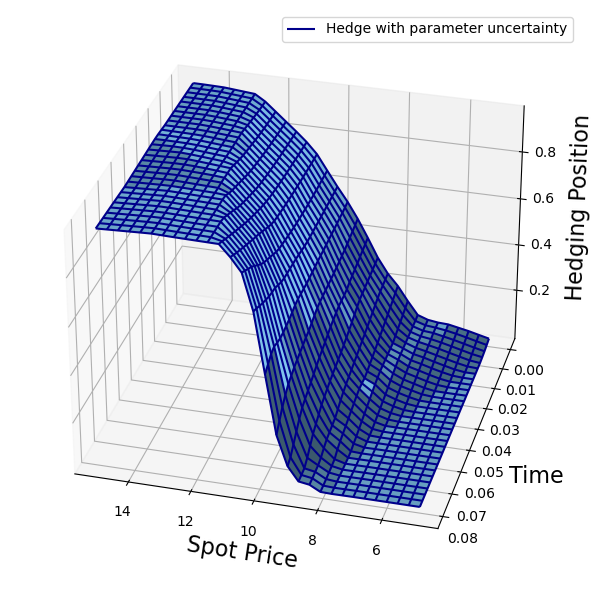

In [7]:
nr_discrete_points = 30 # Number of discrete points for the grid
# Create list of times and values
times = np.linspace(0,T,nr_discrete_points+1)[:-1]
values = np.linspace(x_0-x_0*0.5,x_0+x_0*0.5,nr_discrete_points)
# Empty grid
grid = np.zeros((nr_discrete_points,nr_discrete_points))
#grid_Delta_hedge = np.zeros((nr_discrete_points,nr_discrete_points))
# Fill the grid with the values of the trained hedge
for i in range(len(times)):
    for j in range(len(values)):
        grid[i,j] = hedge([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]
        #grid_Delta_hedge[i,j] = BS_Delta(0.5,0,values[j],T-times[i],x_0)

# 3D PLOT
X, Y = np.meshgrid(values, times)

style.use('default')
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(bottom=0.15)
ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax.plot_wireframe(X, Y , grid_Delta_hedge,color = "darkred",label = "Delta-Hedge")
ax.plot_surface(X, Y , grid,color = "lightskyblue")
ax.plot_wireframe(X, Y , grid,color = "darkblue",label = "Hedge with parameter uncertainty")

ax.view_init(30, 105)
ax.set_ylabel("Time", fontsize=16, labelpad=15)
ax.set_xlabel("Spot Price", fontsize=16)
ax.set_zlabel("Hedging Position", fontsize=16, labelpad=10)
plt.legend()
plt.tight_layout()
plt.savefig('eps/fig_3d_gamma_uncertain.eps', format='eps')
plt.show()


Save the model

In [8]:
hedge.save("model_gamma_uncertain.h5")

# Comparison with fix-model hedge

Specify the setting and compute the hedge

In [9]:
T = 30 / 365 # Maturity
n = 30 # Trading Dates
# Specify parameters as the mean of the respective intervals.
a_0_fix = [0.5,0.5]
a_1_fix = [0.5,0.5]
b_0_fix = [0,0]
b_1_fix = [0,0]
gamma_fix = [1,1]
x_0 = 10.
def derivative(path):
    return tf.nn.relu(path[-1]-x_0)

price_fix, hedge_fix = optimal_hedge(derivative,a_0_fix,a_1_fix,b_0_fix,b_1_fix,gamma_fix,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 10000,l_r = 0.005,BATCH_SIZE =256)

  0%|          | 11/10000 [00:08<2:09:46,  1.28it/s]

Iteration:10, Price of Hedge: 0.7161112427711487, Loss: 0.1984226107597351


  0%|          | 21/10000 [00:16<2:06:46,  1.31it/s]

Iteration:20, Price of Hedge: 0.6922393441200256, Loss: 0.18443623185157776


  0%|          | 31/10000 [00:24<2:24:10,  1.15it/s]

Iteration:30, Price of Hedge: 0.6664854884147644, Loss: 0.13778026401996613


  0%|          | 41/10000 [00:33<2:25:00,  1.14it/s]

Iteration:40, Price of Hedge: 0.6460047960281372, Loss: 0.15909335017204285


  1%|          | 51/10000 [00:41<2:13:05,  1.25it/s]

Iteration:50, Price of Hedge: 0.627299964427948, Loss: 0.15822535753250122


  1%|          | 61/10000 [00:50<2:30:03,  1.10it/s]

Iteration:60, Price of Hedge: 0.6216655969619751, Loss: 0.12644030153751373


  1%|          | 71/10000 [00:58<2:22:01,  1.17it/s]

Iteration:70, Price of Hedge: 0.6191571950912476, Loss: 0.16004759073257446


  1%|          | 81/10000 [01:07<2:20:36,  1.18it/s]

Iteration:80, Price of Hedge: 0.6215770244598389, Loss: 0.14392471313476562


  1%|          | 91/10000 [01:15<2:18:39,  1.19it/s]

Iteration:90, Price of Hedge: 0.624915361404419, Loss: 0.1345706284046173


  1%|          | 101/10000 [01:24<2:17:08,  1.20it/s]

Iteration:100, Price of Hedge: 0.6298679709434509, Loss: 0.09558260440826416


  1%|          | 111/10000 [01:32<2:16:35,  1.21it/s]

Iteration:110, Price of Hedge: 0.6319898962974548, Loss: 0.09059971570968628


  1%|          | 121/10000 [01:40<2:14:18,  1.23it/s]

Iteration:120, Price of Hedge: 0.6307985782623291, Loss: 0.10043244063854218


  1%|▏         | 131/10000 [01:48<2:16:06,  1.21it/s]

Iteration:130, Price of Hedge: 0.6300225257873535, Loss: 0.0697842538356781


  1%|▏         | 141/10000 [01:57<2:17:17,  1.20it/s]

Iteration:140, Price of Hedge: 0.6326618194580078, Loss: 0.10661247372627258


  2%|▏         | 151/10000 [02:05<2:19:00,  1.18it/s]

Iteration:150, Price of Hedge: 0.6310693621635437, Loss: 0.09038835763931274


  2%|▏         | 161/10000 [02:13<2:07:12,  1.29it/s]

Iteration:160, Price of Hedge: 0.6254787445068359, Loss: 0.056777916848659515


  2%|▏         | 171/10000 [02:21<2:05:08,  1.31it/s]

Iteration:170, Price of Hedge: 0.622992753982544, Loss: 0.04971826449036598


  2%|▏         | 181/10000 [02:28<2:02:56,  1.33it/s]

Iteration:180, Price of Hedge: 0.6245276927947998, Loss: 0.06076589226722717


  2%|▏         | 191/10000 [02:36<2:03:55,  1.32it/s]

Iteration:190, Price of Hedge: 0.6270732879638672, Loss: 0.03563873842358589


  2%|▏         | 201/10000 [02:43<2:06:29,  1.29it/s]

Iteration:200, Price of Hedge: 0.6338815689086914, Loss: 0.0514758825302124


  2%|▏         | 211/10000 [02:51<2:07:34,  1.28it/s]

Iteration:210, Price of Hedge: 0.6362026929855347, Loss: 0.03271745145320892


  2%|▏         | 221/10000 [02:59<2:06:49,  1.29it/s]

Iteration:220, Price of Hedge: 0.6342899203300476, Loss: 0.03628816455602646


  2%|▏         | 231/10000 [03:07<2:06:00,  1.29it/s]

Iteration:230, Price of Hedge: 0.6299290657043457, Loss: 0.035976435989141464


  2%|▏         | 241/10000 [03:15<2:00:04,  1.35it/s]

Iteration:240, Price of Hedge: 0.6244564056396484, Loss: 0.13129867613315582


  3%|▎         | 251/10000 [03:22<2:07:39,  1.27it/s]

Iteration:250, Price of Hedge: 0.6256210207939148, Loss: 0.06046793609857559


  3%|▎         | 261/10000 [03:30<2:08:13,  1.27it/s]

Iteration:260, Price of Hedge: 0.629219114780426, Loss: 0.04175069183111191


  3%|▎         | 271/10000 [03:38<2:06:46,  1.28it/s]

Iteration:270, Price of Hedge: 0.6323933005332947, Loss: 0.036090463399887085


  3%|▎         | 281/10000 [03:46<2:00:15,  1.35it/s]

Iteration:280, Price of Hedge: 0.6319942474365234, Loss: 0.04711250960826874


  3%|▎         | 291/10000 [03:53<2:05:16,  1.29it/s]

Iteration:290, Price of Hedge: 0.6302646994590759, Loss: 0.04096369072794914


  3%|▎         | 301/10000 [04:01<2:05:31,  1.29it/s]

Iteration:300, Price of Hedge: 0.6318042278289795, Loss: 0.043786246329545975


  3%|▎         | 311/10000 [04:09<2:03:40,  1.31it/s]

Iteration:310, Price of Hedge: 0.6279281377792358, Loss: 0.05817220360040665


  3%|▎         | 321/10000 [04:17<1:58:57,  1.36it/s]

Iteration:320, Price of Hedge: 0.6322686076164246, Loss: 0.07484503090381622


  3%|▎         | 331/10000 [04:24<2:08:48,  1.25it/s]

Iteration:330, Price of Hedge: 0.635696291923523, Loss: 0.03231923282146454


  3%|▎         | 341/10000 [04:32<2:05:59,  1.28it/s]

Iteration:340, Price of Hedge: 0.6322161555290222, Loss: 0.03184102475643158


  4%|▎         | 351/10000 [04:40<1:57:34,  1.37it/s]

Iteration:350, Price of Hedge: 0.6273187398910522, Loss: 0.050307758152484894


  4%|▎         | 361/10000 [04:47<2:07:41,  1.26it/s]

Iteration:360, Price of Hedge: 0.6265802383422852, Loss: 0.1737270951271057


  4%|▎         | 371/10000 [04:55<2:02:50,  1.31it/s]

Iteration:370, Price of Hedge: 0.630544900894165, Loss: 0.06598149240016937


  4%|▍         | 381/10000 [05:02<1:58:40,  1.35it/s]

Iteration:380, Price of Hedge: 0.6250073313713074, Loss: 0.08355570584535599


  4%|▍         | 391/10000 [05:09<1:43:44,  1.54it/s]

Iteration:390, Price of Hedge: 0.6233704090118408, Loss: 0.04684847220778465


  4%|▍         | 401/10000 [05:16<1:55:26,  1.39it/s]

Iteration:400, Price of Hedge: 0.629771888256073, Loss: 0.04399649053812027


  4%|▍         | 411/10000 [05:23<2:02:38,  1.30it/s]

Iteration:410, Price of Hedge: 0.6258163452148438, Loss: 0.04062402993440628


  4%|▍         | 421/10000 [05:31<1:58:54,  1.34it/s]

Iteration:420, Price of Hedge: 0.6246193647384644, Loss: 0.0386086031794548


  4%|▍         | 431/10000 [05:38<1:55:36,  1.38it/s]

Iteration:430, Price of Hedge: 0.6262367367744446, Loss: 0.04337572306394577


  4%|▍         | 441/10000 [05:46<1:57:17,  1.36it/s]

Iteration:440, Price of Hedge: 0.6289768218994141, Loss: 0.054429054260253906


  5%|▍         | 451/10000 [05:54<1:59:10,  1.34it/s]

Iteration:450, Price of Hedge: 0.6277567148208618, Loss: 0.030880747362971306


  5%|▍         | 461/10000 [06:01<1:59:55,  1.33it/s]

Iteration:460, Price of Hedge: 0.6287397146224976, Loss: 0.03283299505710602


  5%|▍         | 471/10000 [06:08<1:53:24,  1.40it/s]

Iteration:470, Price of Hedge: 0.6300085783004761, Loss: 0.03806232661008835


  5%|▍         | 481/10000 [06:16<1:58:41,  1.34it/s]

Iteration:480, Price of Hedge: 0.6321502923965454, Loss: 0.030487820506095886


  5%|▍         | 491/10000 [06:24<1:58:12,  1.34it/s]

Iteration:490, Price of Hedge: 0.6330299973487854, Loss: 0.040232300758361816


  5%|▌         | 501/10000 [06:31<1:57:48,  1.34it/s]

Iteration:500, Price of Hedge: 0.6258735060691833, Loss: 0.030154775828123093


  5%|▌         | 511/10000 [06:38<1:51:57,  1.41it/s]

Iteration:510, Price of Hedge: 0.6244857311248779, Loss: 0.08331647515296936


  5%|▌         | 521/10000 [06:46<1:58:22,  1.33it/s]

Iteration:520, Price of Hedge: 0.6276656985282898, Loss: 0.027868470177054405


  5%|▌         | 531/10000 [06:54<2:03:37,  1.28it/s]

Iteration:530, Price of Hedge: 0.6309391856193542, Loss: 0.05925501137971878


  5%|▌         | 541/10000 [07:01<1:58:59,  1.32it/s]

Iteration:540, Price of Hedge: 0.6313149929046631, Loss: 0.033645693212747574


  6%|▌         | 551/10000 [07:09<2:01:41,  1.29it/s]

Iteration:550, Price of Hedge: 0.6265685558319092, Loss: 0.035262349992990494


  6%|▌         | 561/10000 [07:16<1:57:38,  1.34it/s]

Iteration:560, Price of Hedge: 0.6272345781326294, Loss: 0.02392754703760147


  6%|▌         | 571/10000 [07:24<2:00:44,  1.30it/s]

Iteration:570, Price of Hedge: 0.6287937760353088, Loss: 0.036133598536252975


  6%|▌         | 581/10000 [07:31<1:54:04,  1.38it/s]

Iteration:580, Price of Hedge: 0.6318832635879517, Loss: 0.026920825242996216


  6%|▌         | 591/10000 [07:39<1:57:30,  1.33it/s]

Iteration:590, Price of Hedge: 0.6303477883338928, Loss: 0.03318599984049797


  6%|▌         | 601/10000 [07:47<2:00:36,  1.30it/s]

Iteration:600, Price of Hedge: 0.6231076121330261, Loss: 0.027270345017313957


  6%|▌         | 611/10000 [07:55<2:02:09,  1.28it/s]

Iteration:610, Price of Hedge: 0.6269040703773499, Loss: 0.03014746867120266


  6%|▌         | 621/10000 [08:02<2:02:35,  1.28it/s]

Iteration:620, Price of Hedge: 0.6283426284790039, Loss: 0.02314973622560501


  6%|▋         | 631/10000 [08:10<2:01:13,  1.29it/s]

Iteration:630, Price of Hedge: 0.6292508244514465, Loss: 0.021270984783768654


  6%|▋         | 641/10000 [08:18<1:58:55,  1.31it/s]

Iteration:640, Price of Hedge: 0.6283085346221924, Loss: 0.023456785827875137


  7%|▋         | 651/10000 [08:25<2:02:12,  1.27it/s]

Iteration:650, Price of Hedge: 0.6224583387374878, Loss: 0.024799194186925888


  7%|▋         | 661/10000 [08:33<1:57:40,  1.32it/s]

Iteration:660, Price of Hedge: 0.6238973140716553, Loss: 0.021646209061145782


  7%|▋         | 671/10000 [08:41<2:00:22,  1.29it/s]

Iteration:670, Price of Hedge: 0.6270107626914978, Loss: 0.02204626053571701


  7%|▋         | 681/10000 [08:48<1:52:58,  1.37it/s]

Iteration:680, Price of Hedge: 0.6291351914405823, Loss: 0.023806732147932053


  7%|▋         | 691/10000 [08:56<1:59:44,  1.30it/s]

Iteration:690, Price of Hedge: 0.6287792325019836, Loss: 0.02099214866757393


  7%|▋         | 701/10000 [09:04<1:59:58,  1.29it/s]

Iteration:700, Price of Hedge: 0.6342176198959351, Loss: 0.022818442434072495


  7%|▋         | 711/10000 [09:12<1:58:24,  1.31it/s]

Iteration:710, Price of Hedge: 0.6337884664535522, Loss: 0.02391301468014717


  7%|▋         | 721/10000 [09:19<1:55:03,  1.34it/s]

Iteration:720, Price of Hedge: 0.6289752721786499, Loss: 0.02118523046374321


  7%|▋         | 731/10000 [09:27<2:04:30,  1.24it/s]

Iteration:730, Price of Hedge: 0.625602126121521, Loss: 0.01905982382595539


  7%|▋         | 741/10000 [09:35<2:04:35,  1.24it/s]

Iteration:740, Price of Hedge: 0.626059353351593, Loss: 0.01972292736172676


  8%|▊         | 751/10000 [09:43<2:00:43,  1.28it/s]

Iteration:750, Price of Hedge: 0.6265576481819153, Loss: 0.01928969845175743


  8%|▊         | 761/10000 [09:51<2:05:15,  1.23it/s]

Iteration:760, Price of Hedge: 0.6269102096557617, Loss: 0.024667106568813324


  8%|▊         | 771/10000 [09:59<2:01:45,  1.26it/s]

Iteration:770, Price of Hedge: 0.6274800896644592, Loss: 0.022021731361746788


  8%|▊         | 781/10000 [10:07<2:03:51,  1.24it/s]

Iteration:780, Price of Hedge: 0.627972424030304, Loss: 0.0354328379034996


  8%|▊         | 791/10000 [10:15<2:01:40,  1.26it/s]

Iteration:790, Price of Hedge: 0.6268482804298401, Loss: 0.018481958657503128


  8%|▊         | 801/10000 [10:23<2:01:33,  1.26it/s]

Iteration:800, Price of Hedge: 0.6246722340583801, Loss: 0.018495917320251465


  8%|▊         | 811/10000 [10:30<1:57:44,  1.30it/s]

Iteration:810, Price of Hedge: 0.6295875310897827, Loss: 0.020725294947624207


  8%|▊         | 821/10000 [10:38<2:01:25,  1.26it/s]

Iteration:820, Price of Hedge: 0.6276938915252686, Loss: 0.021445084363222122


  8%|▊         | 831/10000 [10:46<1:57:59,  1.30it/s]

Iteration:830, Price of Hedge: 0.6258944272994995, Loss: 0.023626670241355896


  8%|▊         | 841/10000 [10:54<1:58:00,  1.29it/s]

Iteration:840, Price of Hedge: 0.627097487449646, Loss: 0.01818176917731762


  9%|▊         | 851/10000 [11:01<1:57:37,  1.30it/s]

Iteration:850, Price of Hedge: 0.6268306374549866, Loss: 0.016717050224542618


  9%|▊         | 861/10000 [11:09<1:59:03,  1.28it/s]

Iteration:860, Price of Hedge: 0.6262871623039246, Loss: 0.01843515783548355


  9%|▊         | 871/10000 [11:17<2:02:12,  1.24it/s]

Iteration:870, Price of Hedge: 0.6294062733650208, Loss: 0.020123129710555077


  9%|▉         | 881/10000 [11:25<1:57:31,  1.29it/s]

Iteration:880, Price of Hedge: 0.6278300881385803, Loss: 0.020755313336849213


  9%|▉         | 891/10000 [11:33<1:58:02,  1.29it/s]

Iteration:890, Price of Hedge: 0.6235561966896057, Loss: 0.021145934239029884


  9%|▉         | 901/10000 [11:40<1:58:21,  1.28it/s]

Iteration:900, Price of Hedge: 0.6265398859977722, Loss: 0.021706130355596542


  9%|▉         | 911/10000 [11:48<1:54:36,  1.32it/s]

Iteration:910, Price of Hedge: 0.6342948079109192, Loss: 0.023928530514240265


  9%|▉         | 921/10000 [11:56<1:59:02,  1.27it/s]

Iteration:920, Price of Hedge: 0.6282452344894409, Loss: 0.01999897137284279


  9%|▉         | 931/10000 [12:03<1:55:38,  1.31it/s]

Iteration:930, Price of Hedge: 0.6293942332267761, Loss: 0.016701478511095047


  9%|▉         | 941/10000 [12:11<1:57:52,  1.28it/s]

Iteration:940, Price of Hedge: 0.6291784048080444, Loss: 0.01968350261449814


 10%|▉         | 951/10000 [12:18<1:47:18,  1.41it/s]

Iteration:950, Price of Hedge: 0.6286219358444214, Loss: 0.021937264129519463


 10%|▉         | 961/10000 [12:26<1:58:39,  1.27it/s]

Iteration:960, Price of Hedge: 0.6297115087509155, Loss: 0.021240200847387314


 10%|▉         | 971/10000 [12:34<1:53:06,  1.33it/s]

Iteration:970, Price of Hedge: 0.6305190920829773, Loss: 0.016888516023755074


 10%|▉         | 981/10000 [12:42<1:54:39,  1.31it/s]

Iteration:980, Price of Hedge: 0.6281932592391968, Loss: 0.03285675868391991


 10%|▉         | 991/10000 [12:49<1:58:36,  1.27it/s]

Iteration:990, Price of Hedge: 0.6252927184104919, Loss: 0.02076467126607895


 10%|█         | 1001/10000 [12:57<1:58:05,  1.27it/s]

Iteration:1000, Price of Hedge: 0.6316068172454834, Loss: 0.02325543761253357


 10%|█         | 1011/10000 [13:05<1:49:12,  1.37it/s]

Iteration:1010, Price of Hedge: 0.634124219417572, Loss: 0.023622717708349228


 10%|█         | 1021/10000 [13:12<1:49:23,  1.37it/s]

Iteration:1020, Price of Hedge: 0.6272286176681519, Loss: 0.021702146157622337


 10%|█         | 1031/10000 [13:20<1:46:35,  1.40it/s]

Iteration:1030, Price of Hedge: 0.6250838041305542, Loss: 0.029889628291130066


 10%|█         | 1041/10000 [13:27<1:48:42,  1.37it/s]

Iteration:1040, Price of Hedge: 0.6297688484191895, Loss: 0.032339829951524734


 11%|█         | 1051/10000 [13:34<1:47:49,  1.38it/s]

Iteration:1050, Price of Hedge: 0.6322218775749207, Loss: 0.027636244893074036


 11%|█         | 1061/10000 [13:40<1:40:28,  1.48it/s]

Iteration:1060, Price of Hedge: 0.6221625804901123, Loss: 0.025545410811901093


 11%|█         | 1071/10000 [13:47<1:39:28,  1.50it/s]

Iteration:1070, Price of Hedge: 0.6281191110610962, Loss: 0.02147931605577469


 11%|█         | 1081/10000 [13:54<1:34:11,  1.58it/s]

Iteration:1080, Price of Hedge: 0.6339048743247986, Loss: 0.0352683961391449


 11%|█         | 1091/10000 [14:06<2:38:53,  1.07s/it]

Iteration:1090, Price of Hedge: 0.6295835971832275, Loss: 0.020471546798944473


 11%|█         | 1101/10000 [14:14<1:54:25,  1.30it/s]

Iteration:1100, Price of Hedge: 0.6279311180114746, Loss: 0.023447958752512932


 11%|█         | 1111/10000 [14:22<1:59:30,  1.24it/s]

Iteration:1110, Price of Hedge: 0.6296004056930542, Loss: 0.03402227908372879


 11%|█         | 1121/10000 [14:30<1:58:36,  1.25it/s]

Iteration:1120, Price of Hedge: 0.6291425824165344, Loss: 0.021774981170892715


 11%|█▏        | 1131/10000 [14:38<1:59:47,  1.23it/s]

Iteration:1130, Price of Hedge: 0.6276040077209473, Loss: 0.020588528364896774


 11%|█▏        | 1141/10000 [14:46<2:01:05,  1.22it/s]

Iteration:1140, Price of Hedge: 0.6318254470825195, Loss: 0.018593434244394302


 12%|█▏        | 1151/10000 [14:54<1:58:30,  1.24it/s]

Iteration:1150, Price of Hedge: 0.6340003609657288, Loss: 0.019711898639798164


 12%|█▏        | 1161/10000 [15:02<2:03:07,  1.20it/s]

Iteration:1160, Price of Hedge: 0.6284486651420593, Loss: 0.021454017609357834


 12%|█▏        | 1171/10000 [15:10<2:08:28,  1.15it/s]

Iteration:1170, Price of Hedge: 0.6256726980209351, Loss: 0.019971445202827454


 12%|█▏        | 1181/10000 [15:19<2:05:51,  1.17it/s]

Iteration:1180, Price of Hedge: 0.6253260374069214, Loss: 0.04414670914411545


 12%|█▏        | 1191/10000 [15:27<2:04:26,  1.18it/s]

Iteration:1190, Price of Hedge: 0.6343139410018921, Loss: 0.030565552413463593


 12%|█▏        | 1201/10000 [15:36<2:01:55,  1.20it/s]

Iteration:1200, Price of Hedge: 0.6258697509765625, Loss: 0.03795977681875229


 12%|█▏        | 1211/10000 [15:44<2:01:29,  1.21it/s]

Iteration:1210, Price of Hedge: 0.6224811673164368, Loss: 0.02071131020784378


 12%|█▏        | 1221/10000 [15:52<2:01:19,  1.21it/s]

Iteration:1220, Price of Hedge: 0.6334841251373291, Loss: 0.018172699958086014


 12%|█▏        | 1231/10000 [16:01<2:03:05,  1.19it/s]

Iteration:1230, Price of Hedge: 0.6261022090911865, Loss: 0.018368922173976898


 12%|█▏        | 1241/10000 [16:09<2:02:03,  1.20it/s]

Iteration:1240, Price of Hedge: 0.6248013377189636, Loss: 0.020474202930927277


 13%|█▎        | 1251/10000 [16:17<2:01:54,  1.20it/s]

Iteration:1250, Price of Hedge: 0.6338723301887512, Loss: 0.020608559250831604


 13%|█▎        | 1261/10000 [16:26<2:03:47,  1.18it/s]

Iteration:1260, Price of Hedge: 0.625174343585968, Loss: 0.0189923457801342


 13%|█▎        | 1271/10000 [16:34<2:06:37,  1.15it/s]

Iteration:1270, Price of Hedge: 0.6320633888244629, Loss: 0.03596528246998787


 13%|█▎        | 1281/10000 [16:43<2:05:34,  1.16it/s]

Iteration:1280, Price of Hedge: 0.627374529838562, Loss: 0.023146096616983414


 13%|█▎        | 1291/10000 [16:51<2:04:38,  1.16it/s]

Iteration:1290, Price of Hedge: 0.6223049759864807, Loss: 0.018676744773983955


 13%|█▎        | 1301/10000 [17:00<2:02:29,  1.18it/s]

Iteration:1300, Price of Hedge: 0.6256940364837646, Loss: 0.021743638440966606


 13%|█▎        | 1311/10000 [17:08<2:02:01,  1.19it/s]

Iteration:1310, Price of Hedge: 0.6255965828895569, Loss: 0.020276684314012527


 13%|█▎        | 1321/10000 [17:16<1:50:13,  1.31it/s]

Iteration:1320, Price of Hedge: 0.6296772360801697, Loss: 0.016909681260585785


 13%|█▎        | 1331/10000 [17:24<1:48:25,  1.33it/s]

Iteration:1330, Price of Hedge: 0.6298828721046448, Loss: 0.01738443225622177


 13%|█▎        | 1341/10000 [17:31<1:51:39,  1.29it/s]

Iteration:1340, Price of Hedge: 0.6227614879608154, Loss: 0.01305585540831089


 14%|█▎        | 1351/10000 [17:39<1:47:44,  1.34it/s]

Iteration:1350, Price of Hedge: 0.6298139691352844, Loss: 0.03324044123291969


 14%|█▎        | 1361/10000 [17:46<1:50:03,  1.31it/s]

Iteration:1360, Price of Hedge: 0.6322399973869324, Loss: 0.021552573889493942


 14%|█▎        | 1371/10000 [17:54<1:48:00,  1.33it/s]

Iteration:1370, Price of Hedge: 0.623234212398529, Loss: 0.018285755068063736


 14%|█▍        | 1381/10000 [18:02<1:52:41,  1.27it/s]

Iteration:1380, Price of Hedge: 0.625910758972168, Loss: 0.02027418091893196


 14%|█▍        | 1391/10000 [18:10<1:53:47,  1.26it/s]

Iteration:1390, Price of Hedge: 0.629289984703064, Loss: 0.022743837907910347


 14%|█▍        | 1401/10000 [18:17<1:50:58,  1.29it/s]

Iteration:1400, Price of Hedge: 0.6299787759780884, Loss: 0.019645124673843384


 14%|█▍        | 1411/10000 [18:25<1:48:46,  1.32it/s]

Iteration:1410, Price of Hedge: 0.6313809752464294, Loss: 0.017834551632404327


 14%|█▍        | 1421/10000 [18:33<1:50:42,  1.29it/s]

Iteration:1420, Price of Hedge: 0.6304584741592407, Loss: 0.01756330579519272


 14%|█▍        | 1431/10000 [18:41<1:54:13,  1.25it/s]

Iteration:1430, Price of Hedge: 0.6319705843925476, Loss: 0.019792603328824043


 14%|█▍        | 1441/10000 [18:49<1:50:26,  1.29it/s]

Iteration:1440, Price of Hedge: 0.6248775124549866, Loss: 0.044315166771411896


 15%|█▍        | 1451/10000 [18:56<1:54:12,  1.25it/s]

Iteration:1450, Price of Hedge: 0.628200352191925, Loss: 0.030054444447159767


 15%|█▍        | 1461/10000 [19:04<1:52:24,  1.27it/s]

Iteration:1460, Price of Hedge: 0.6308502554893494, Loss: 0.021304424852132797


 15%|█▍        | 1471/10000 [19:12<1:50:30,  1.29it/s]

Iteration:1470, Price of Hedge: 0.6251123547554016, Loss: 0.022091684862971306


 15%|█▍        | 1481/10000 [19:20<1:53:13,  1.25it/s]

Iteration:1480, Price of Hedge: 0.626258373260498, Loss: 0.023377781733870506


 15%|█▍        | 1491/10000 [19:28<1:45:41,  1.34it/s]

Iteration:1490, Price of Hedge: 0.6326454877853394, Loss: 0.02661300078034401


 15%|█▌        | 1501/10000 [19:35<1:50:31,  1.28it/s]

Iteration:1500, Price of Hedge: 0.6370344758033752, Loss: 0.020710434764623642


 15%|█▌        | 1511/10000 [19:43<1:52:30,  1.26it/s]

Iteration:1510, Price of Hedge: 0.6321222186088562, Loss: 0.017062164843082428


 15%|█▌        | 1521/10000 [19:51<1:52:09,  1.26it/s]

Iteration:1520, Price of Hedge: 0.6290310621261597, Loss: 0.017851771786808968


 15%|█▌        | 1531/10000 [19:59<1:45:28,  1.34it/s]

Iteration:1530, Price of Hedge: 0.6330040693283081, Loss: 0.021444765850901604


 15%|█▌        | 1541/10000 [20:06<1:43:23,  1.36it/s]

Iteration:1540, Price of Hedge: 0.6332425475120544, Loss: 0.015876412391662598


 16%|█▌        | 1551/10000 [20:14<1:47:55,  1.30it/s]

Iteration:1550, Price of Hedge: 0.6246203780174255, Loss: 0.020882274955511093


 16%|█▌        | 1561/10000 [20:21<1:47:11,  1.31it/s]

Iteration:1560, Price of Hedge: 0.6261937618255615, Loss: 0.02100023813545704


 16%|█▌        | 1571/10000 [20:29<1:53:05,  1.24it/s]

Iteration:1570, Price of Hedge: 0.6244571805000305, Loss: 0.01734117791056633


 16%|█▌        | 1581/10000 [20:37<1:47:08,  1.31it/s]

Iteration:1580, Price of Hedge: 0.6230289340019226, Loss: 0.035118333995342255


 16%|█▌        | 1591/10000 [20:45<1:47:23,  1.31it/s]

Iteration:1590, Price of Hedge: 0.6227613091468811, Loss: 0.019776517525315285


 16%|█▌        | 1601/10000 [20:53<1:50:20,  1.27it/s]

Iteration:1600, Price of Hedge: 0.6268449425697327, Loss: 0.01879991963505745


 16%|█▌        | 1611/10000 [21:00<1:51:45,  1.25it/s]

Iteration:1610, Price of Hedge: 0.6366354823112488, Loss: 0.016199540346860886


 16%|█▌        | 1621/10000 [21:09<1:52:52,  1.24it/s]

Iteration:1620, Price of Hedge: 0.6334922313690186, Loss: 0.018717443570494652


 16%|█▋        | 1631/10000 [21:16<1:49:47,  1.27it/s]

Iteration:1630, Price of Hedge: 0.6232055425643921, Loss: 0.022774256765842438


 16%|█▋        | 1641/10000 [21:24<1:48:46,  1.28it/s]

Iteration:1640, Price of Hedge: 0.625374436378479, Loss: 0.03290216997265816


 17%|█▋        | 1651/10000 [21:32<1:51:10,  1.25it/s]

Iteration:1650, Price of Hedge: 0.6310356855392456, Loss: 0.025800015777349472


 17%|█▋        | 1661/10000 [21:40<1:46:17,  1.31it/s]

Iteration:1660, Price of Hedge: 0.6329563856124878, Loss: 0.018299032002687454


 17%|█▋        | 1671/10000 [21:48<1:51:21,  1.25it/s]

Iteration:1670, Price of Hedge: 0.6302394866943359, Loss: 0.024427680298686028


 17%|█▋        | 1681/10000 [21:56<1:44:56,  1.32it/s]

Iteration:1680, Price of Hedge: 0.6269782185554504, Loss: 0.019815674051642418


 17%|█▋        | 1691/10000 [22:03<1:46:46,  1.30it/s]

Iteration:1690, Price of Hedge: 0.6322751641273499, Loss: 0.019022304564714432


 17%|█▋        | 1701/10000 [22:11<1:46:43,  1.30it/s]

Iteration:1700, Price of Hedge: 0.6312615275382996, Loss: 0.018153565004467964


 17%|█▋        | 1711/10000 [22:19<1:48:08,  1.28it/s]

Iteration:1710, Price of Hedge: 0.6251969337463379, Loss: 0.017365165054798126


 17%|█▋        | 1721/10000 [22:27<1:47:45,  1.28it/s]

Iteration:1720, Price of Hedge: 0.6250537037849426, Loss: 0.024948591366410255


 17%|█▋        | 1731/10000 [22:35<1:50:38,  1.25it/s]

Iteration:1730, Price of Hedge: 0.6275171041488647, Loss: 0.017559241503477097


 17%|█▋        | 1741/10000 [22:43<1:45:44,  1.30it/s]

Iteration:1740, Price of Hedge: 0.6319873929023743, Loss: 0.020645439624786377


 18%|█▊        | 1751/10000 [22:50<1:44:50,  1.31it/s]

Iteration:1750, Price of Hedge: 0.6289774775505066, Loss: 0.01651165448129177


 18%|█▊        | 1761/10000 [22:58<1:44:15,  1.32it/s]

Iteration:1760, Price of Hedge: 0.6254494786262512, Loss: 0.019285615533590317


 18%|█▊        | 1771/10000 [23:06<1:41:33,  1.35it/s]

Iteration:1770, Price of Hedge: 0.6276025176048279, Loss: 0.016273509711027145


 18%|█▊        | 1781/10000 [23:13<1:36:38,  1.42it/s]

Iteration:1780, Price of Hedge: 0.6269665360450745, Loss: 0.03719723969697952


 18%|█▊        | 1791/10000 [23:20<1:36:53,  1.41it/s]

Iteration:1790, Price of Hedge: 0.6255316138267517, Loss: 0.03296313434839249


 18%|█▊        | 1801/10000 [23:27<1:30:40,  1.51it/s]

Iteration:1800, Price of Hedge: 0.6261491775512695, Loss: 0.028212105855345726


 18%|█▊        | 1811/10000 [23:33<1:31:02,  1.50it/s]

Iteration:1810, Price of Hedge: 0.6332076787948608, Loss: 0.02246313914656639


 18%|█▊        | 1821/10000 [23:41<1:38:48,  1.38it/s]

Iteration:1820, Price of Hedge: 0.6255419850349426, Loss: 0.02048560604453087


 18%|█▊        | 1831/10000 [23:48<1:43:39,  1.31it/s]

Iteration:1830, Price of Hedge: 0.6266236305236816, Loss: 0.017438437789678574


 18%|█▊        | 1841/10000 [23:55<1:38:17,  1.38it/s]

Iteration:1840, Price of Hedge: 0.6243351697921753, Loss: 0.03428554907441139


 19%|█▊        | 1851/10000 [24:03<1:38:59,  1.37it/s]

Iteration:1850, Price of Hedge: 0.6288878917694092, Loss: 0.0349699892103672


 19%|█▊        | 1861/10000 [24:10<1:36:15,  1.41it/s]

Iteration:1860, Price of Hedge: 0.6290149092674255, Loss: 0.0222117118537426


 19%|█▊        | 1871/10000 [24:16<1:27:57,  1.54it/s]

Iteration:1870, Price of Hedge: 0.6290652751922607, Loss: 0.017854541540145874


 19%|█▉        | 1881/10000 [24:23<1:34:49,  1.43it/s]

Iteration:1880, Price of Hedge: 0.6314764618873596, Loss: 0.020251374691724777


 19%|█▉        | 1891/10000 [24:31<1:45:30,  1.28it/s]

Iteration:1890, Price of Hedge: 0.6305747032165527, Loss: 0.022525325417518616


 19%|█▉        | 1901/10000 [24:39<1:43:05,  1.31it/s]

Iteration:1900, Price of Hedge: 0.6364994049072266, Loss: 0.021329622715711594


 19%|█▉        | 1911/10000 [24:46<1:35:49,  1.41it/s]

Iteration:1910, Price of Hedge: 0.6376436948776245, Loss: 0.019750140607357025


 19%|█▉        | 1921/10000 [24:53<1:34:18,  1.43it/s]

Iteration:1920, Price of Hedge: 0.6222848892211914, Loss: 0.02327437698841095


 19%|█▉        | 1931/10000 [25:01<1:41:12,  1.33it/s]

Iteration:1930, Price of Hedge: 0.619615375995636, Loss: 0.021194415166974068


 19%|█▉        | 1941/10000 [25:08<1:29:51,  1.49it/s]

Iteration:1940, Price of Hedge: 0.6278523206710815, Loss: 0.016571050509810448


 20%|█▉        | 1951/10000 [25:15<1:37:02,  1.38it/s]

Iteration:1950, Price of Hedge: 0.6283047795295715, Loss: 0.01783275231719017


 20%|█▉        | 1961/10000 [25:23<1:48:30,  1.23it/s]

Iteration:1960, Price of Hedge: 0.624092698097229, Loss: 0.015836060047149658


 20%|█▉        | 1971/10000 [25:30<1:43:09,  1.30it/s]

Iteration:1970, Price of Hedge: 0.6243816614151001, Loss: 0.018590321764349937


 20%|█▉        | 1981/10000 [25:38<1:42:03,  1.31it/s]

Iteration:1980, Price of Hedge: 0.6270303726196289, Loss: 0.024791749194264412


 20%|█▉        | 1991/10000 [25:45<1:33:14,  1.43it/s]

Iteration:1990, Price of Hedge: 0.6325711011886597, Loss: 0.022227292880415916


 20%|██        | 2001/10000 [25:52<1:29:38,  1.49it/s]

Iteration:2000, Price of Hedge: 0.6258214712142944, Loss: 0.018341340124607086


 20%|██        | 2011/10000 [26:00<1:42:46,  1.30it/s]

Iteration:2010, Price of Hedge: 0.6232317686080933, Loss: 0.017945177853107452


 20%|██        | 2021/10000 [26:08<1:47:10,  1.24it/s]

Iteration:2020, Price of Hedge: 0.6330240964889526, Loss: 0.021139198914170265


 20%|██        | 2031/10000 [26:16<1:44:49,  1.27it/s]

Iteration:2030, Price of Hedge: 0.6358259916305542, Loss: 0.02255910076200962


 20%|██        | 2041/10000 [26:23<1:34:25,  1.40it/s]

Iteration:2040, Price of Hedge: 0.6289430260658264, Loss: 0.020389437675476074


 21%|██        | 2051/10000 [26:30<1:31:46,  1.44it/s]

Iteration:2050, Price of Hedge: 0.6358978152275085, Loss: 0.021305570378899574


 21%|██        | 2061/10000 [26:36<1:25:33,  1.55it/s]

Iteration:2060, Price of Hedge: 0.6385552287101746, Loss: 0.020163770765066147


 21%|██        | 2071/10000 [26:43<1:28:22,  1.50it/s]

Iteration:2070, Price of Hedge: 0.6265455484390259, Loss: 0.023642489686608315


 21%|██        | 2081/10000 [26:50<1:31:50,  1.44it/s]

Iteration:2080, Price of Hedge: 0.6356661319732666, Loss: 0.01815951243042946


 21%|██        | 2091/10000 [26:57<1:25:05,  1.55it/s]

Iteration:2090, Price of Hedge: 0.6298660635948181, Loss: 0.01738089695572853


 21%|██        | 2101/10000 [27:03<1:27:58,  1.50it/s]

Iteration:2100, Price of Hedge: 0.6251236200332642, Loss: 0.01786717027425766


 21%|██        | 2111/10000 [27:11<1:35:27,  1.38it/s]

Iteration:2110, Price of Hedge: 0.6280471682548523, Loss: 0.019566811621189117


 21%|██        | 2121/10000 [27:17<1:24:36,  1.55it/s]

Iteration:2120, Price of Hedge: 0.622133195400238, Loss: 0.023038337007164955


 21%|██▏       | 2131/10000 [27:24<1:34:28,  1.39it/s]

Iteration:2130, Price of Hedge: 0.6306143403053284, Loss: 0.019297311082482338


 21%|██▏       | 2141/10000 [27:32<1:41:43,  1.29it/s]

Iteration:2140, Price of Hedge: 0.633064329624176, Loss: 0.01728897914290428


 22%|██▏       | 2151/10000 [27:39<1:28:01,  1.49it/s]

Iteration:2150, Price of Hedge: 0.6287615895271301, Loss: 0.01845361478626728


 22%|██▏       | 2161/10000 [27:46<1:41:34,  1.29it/s]

Iteration:2160, Price of Hedge: 0.6231021285057068, Loss: 0.019151270389556885


 22%|██▏       | 2171/10000 [27:54<1:41:11,  1.29it/s]

Iteration:2170, Price of Hedge: 0.6250512003898621, Loss: 0.017155326902866364


 22%|██▏       | 2181/10000 [28:02<1:44:16,  1.25it/s]

Iteration:2180, Price of Hedge: 0.6311994194984436, Loss: 0.019599515944719315


 22%|██▏       | 2191/10000 [28:10<1:44:03,  1.25it/s]

Iteration:2190, Price of Hedge: 0.6289318799972534, Loss: 0.01917334273457527


 22%|██▏       | 2201/10000 [28:18<1:44:30,  1.24it/s]

Iteration:2200, Price of Hedge: 0.6267163753509521, Loss: 0.020441390573978424


 22%|██▏       | 2211/10000 [28:26<1:46:37,  1.22it/s]

Iteration:2210, Price of Hedge: 0.6294587254524231, Loss: 0.016669709235429764


 22%|██▏       | 2221/10000 [28:34<1:44:07,  1.25it/s]

Iteration:2220, Price of Hedge: 0.6327297687530518, Loss: 0.02217119373381138


 22%|██▏       | 2231/10000 [28:41<1:36:34,  1.34it/s]

Iteration:2230, Price of Hedge: 0.6239473223686218, Loss: 0.02195819467306137


 22%|██▏       | 2241/10000 [28:49<1:36:44,  1.34it/s]

Iteration:2240, Price of Hedge: 0.6276727318763733, Loss: 0.019920360296964645


 23%|██▎       | 2251/10000 [28:56<1:28:40,  1.46it/s]

Iteration:2250, Price of Hedge: 0.6355190277099609, Loss: 0.015006381087005138


 23%|██▎       | 2261/10000 [29:03<1:34:40,  1.36it/s]

Iteration:2260, Price of Hedge: 0.633790910243988, Loss: 0.021336400881409645


 23%|██▎       | 2271/10000 [29:11<1:38:40,  1.31it/s]

Iteration:2270, Price of Hedge: 0.63087397813797, Loss: 0.025524845346808434


 23%|██▎       | 2281/10000 [29:18<1:31:10,  1.41it/s]

Iteration:2280, Price of Hedge: 0.624561607837677, Loss: 0.01986786350607872


 23%|██▎       | 2291/10000 [29:25<1:36:15,  1.33it/s]

Iteration:2290, Price of Hedge: 0.6262234449386597, Loss: 0.030202185735106468


 23%|██▎       | 2301/10000 [29:33<1:42:55,  1.25it/s]

Iteration:2300, Price of Hedge: 0.6305366158485413, Loss: 0.0338679738342762


 23%|██▎       | 2311/10000 [29:41<1:48:06,  1.19it/s]

Iteration:2310, Price of Hedge: 0.6355613470077515, Loss: 0.021976955235004425


 23%|██▎       | 2321/10000 [29:50<1:50:40,  1.16it/s]

Iteration:2320, Price of Hedge: 0.6300044059753418, Loss: 0.022524921223521233


 23%|██▎       | 2331/10000 [29:58<1:45:39,  1.21it/s]

Iteration:2330, Price of Hedge: 0.6282058954238892, Loss: 0.029967330396175385


 23%|██▎       | 2341/10000 [30:07<1:49:29,  1.17it/s]

Iteration:2340, Price of Hedge: 0.6259610652923584, Loss: 0.021666692569851875


 24%|██▎       | 2351/10000 [30:15<1:46:39,  1.20it/s]

Iteration:2350, Price of Hedge: 0.6294441819190979, Loss: 0.022165315225720406


 24%|██▎       | 2361/10000 [30:24<1:47:47,  1.18it/s]

Iteration:2360, Price of Hedge: 0.6262677311897278, Loss: 0.028197461739182472


 24%|██▎       | 2371/10000 [30:32<1:46:39,  1.19it/s]

Iteration:2370, Price of Hedge: 0.6247300505638123, Loss: 0.019488193094730377


 24%|██▍       | 2381/10000 [30:41<1:51:41,  1.14it/s]

Iteration:2380, Price of Hedge: 0.6285766363143921, Loss: 0.019701402634382248


 24%|██▍       | 2391/10000 [30:49<1:45:04,  1.21it/s]

Iteration:2390, Price of Hedge: 0.6347135305404663, Loss: 0.01947878673672676


 24%|██▍       | 2401/10000 [30:58<1:48:28,  1.17it/s]

Iteration:2400, Price of Hedge: 0.627835214138031, Loss: 0.018163427710533142


 24%|██▍       | 2411/10000 [31:06<1:48:03,  1.17it/s]

Iteration:2410, Price of Hedge: 0.6270577311515808, Loss: 0.01863119564950466


 24%|██▍       | 2421/10000 [31:15<1:43:25,  1.22it/s]

Iteration:2420, Price of Hedge: 0.6268198490142822, Loss: 0.017540868371725082


 24%|██▍       | 2431/10000 [31:23<1:44:39,  1.21it/s]

Iteration:2430, Price of Hedge: 0.6303848624229431, Loss: 0.014750740490853786


 24%|██▍       | 2441/10000 [31:31<1:45:30,  1.19it/s]

Iteration:2440, Price of Hedge: 0.6279272437095642, Loss: 0.019869424402713776


 25%|██▍       | 2451/10000 [31:40<1:45:33,  1.19it/s]

Iteration:2450, Price of Hedge: 0.627768874168396, Loss: 0.019085299223661423


 25%|██▍       | 2461/10000 [31:48<1:46:07,  1.18it/s]

Iteration:2460, Price of Hedge: 0.630113959312439, Loss: 0.019699545577168465


 25%|██▍       | 2471/10000 [31:56<1:45:21,  1.19it/s]

Iteration:2470, Price of Hedge: 0.6252254247665405, Loss: 0.019926059991121292


 25%|██▍       | 2481/10000 [32:05<1:45:50,  1.18it/s]

Iteration:2480, Price of Hedge: 0.6311007738113403, Loss: 0.01975433900952339


 25%|██▍       | 2491/10000 [32:14<1:49:36,  1.14it/s]

Iteration:2490, Price of Hedge: 0.6308701038360596, Loss: 0.018470630049705505


 25%|██▌       | 2501/10000 [32:21<1:43:06,  1.21it/s]

Iteration:2500, Price of Hedge: 0.6301579475402832, Loss: 0.02192743495106697


 25%|██▌       | 2511/10000 [32:30<1:40:50,  1.24it/s]

Iteration:2510, Price of Hedge: 0.6333973407745361, Loss: 0.019489841535687447


 25%|██▌       | 2521/10000 [32:37<1:33:43,  1.33it/s]

Iteration:2520, Price of Hedge: 0.627958357334137, Loss: 0.019741754978895187


 25%|██▌       | 2531/10000 [32:45<1:36:10,  1.29it/s]

Iteration:2530, Price of Hedge: 0.6317952871322632, Loss: 0.01769837737083435


 25%|██▌       | 2541/10000 [32:53<1:34:36,  1.31it/s]

Iteration:2540, Price of Hedge: 0.6260585784912109, Loss: 0.019577912986278534


 26%|██▌       | 2551/10000 [33:00<1:35:51,  1.30it/s]

Iteration:2550, Price of Hedge: 0.6338742971420288, Loss: 0.018287984654307365


 26%|██▌       | 2561/10000 [33:08<1:38:21,  1.26it/s]

Iteration:2560, Price of Hedge: 0.6270252466201782, Loss: 0.01990646682679653


 26%|██▌       | 2571/10000 [33:16<1:35:31,  1.30it/s]

Iteration:2570, Price of Hedge: 0.628419041633606, Loss: 0.01740417256951332


 26%|██▌       | 2581/10000 [33:23<1:34:17,  1.31it/s]

Iteration:2580, Price of Hedge: 0.6255778670310974, Loss: 0.015182659029960632


 26%|██▌       | 2591/10000 [33:31<1:34:36,  1.31it/s]

Iteration:2590, Price of Hedge: 0.635712742805481, Loss: 0.03280739486217499


 26%|██▌       | 2601/10000 [33:39<1:33:46,  1.31it/s]

Iteration:2600, Price of Hedge: 0.6417983770370483, Loss: 0.019528554752469063


 26%|██▌       | 2611/10000 [33:46<1:36:49,  1.27it/s]

Iteration:2610, Price of Hedge: 0.6281007528305054, Loss: 0.018112298101186752


 26%|██▌       | 2621/10000 [33:54<1:39:35,  1.23it/s]

Iteration:2620, Price of Hedge: 0.621484100818634, Loss: 0.02083820104598999


 26%|██▋       | 2631/10000 [34:02<1:38:51,  1.24it/s]

Iteration:2630, Price of Hedge: 0.6321812868118286, Loss: 0.027655916288495064


 26%|██▋       | 2641/10000 [34:10<1:34:31,  1.30it/s]

Iteration:2640, Price of Hedge: 0.6247642636299133, Loss: 0.01662117801606655


 27%|██▋       | 2651/10000 [34:18<1:32:20,  1.33it/s]

Iteration:2650, Price of Hedge: 0.6284382939338684, Loss: 0.016932319849729538


 27%|██▋       | 2661/10000 [34:25<1:33:18,  1.31it/s]

Iteration:2660, Price of Hedge: 0.6305935382843018, Loss: 0.022949062287807465


 27%|██▋       | 2671/10000 [34:33<1:37:45,  1.25it/s]

Iteration:2670, Price of Hedge: 0.6247451305389404, Loss: 0.01748591847717762


 27%|██▋       | 2681/10000 [34:41<1:38:00,  1.24it/s]

Iteration:2680, Price of Hedge: 0.631830096244812, Loss: 0.019749067723751068


 27%|██▋       | 2691/10000 [34:49<1:36:36,  1.26it/s]

Iteration:2690, Price of Hedge: 0.634861946105957, Loss: 0.02055290713906288


 27%|██▋       | 2701/10000 [34:57<1:35:28,  1.27it/s]

Iteration:2700, Price of Hedge: 0.6255581378936768, Loss: 0.02728935144841671


 27%|██▋       | 2711/10000 [35:05<1:34:49,  1.28it/s]

Iteration:2710, Price of Hedge: 0.6337594985961914, Loss: 0.020750928670167923


 27%|██▋       | 2721/10000 [35:13<1:33:10,  1.30it/s]

Iteration:2720, Price of Hedge: 0.6260159611701965, Loss: 0.018213700503110886


 27%|██▋       | 2731/10000 [35:21<1:36:23,  1.26it/s]

Iteration:2730, Price of Hedge: 0.6228300929069519, Loss: 0.020064689218997955


 27%|██▋       | 2741/10000 [35:28<1:27:01,  1.39it/s]

Iteration:2740, Price of Hedge: 0.6320770382881165, Loss: 0.01847704127430916


 28%|██▊       | 2751/10000 [35:36<1:31:40,  1.32it/s]

Iteration:2750, Price of Hedge: 0.6219338774681091, Loss: 0.020757533609867096


 28%|██▊       | 2761/10000 [35:43<1:35:25,  1.26it/s]

Iteration:2760, Price of Hedge: 0.6293339133262634, Loss: 0.017494451254606247


 28%|██▊       | 2771/10000 [35:51<1:33:41,  1.29it/s]

Iteration:2770, Price of Hedge: 0.6306870579719543, Loss: 0.026961814612150192


 28%|██▊       | 2781/10000 [35:59<1:31:55,  1.31it/s]

Iteration:2780, Price of Hedge: 0.6325366497039795, Loss: 0.020531252026557922


 28%|██▊       | 2791/10000 [36:07<1:34:11,  1.28it/s]

Iteration:2790, Price of Hedge: 0.6325939893722534, Loss: 0.01780310645699501


 28%|██▊       | 2801/10000 [36:14<1:32:03,  1.30it/s]

Iteration:2800, Price of Hedge: 0.6223241090774536, Loss: 0.017863184213638306


 28%|██▊       | 2811/10000 [36:22<1:32:11,  1.30it/s]

Iteration:2810, Price of Hedge: 0.6250962615013123, Loss: 0.019175700843334198


 28%|██▊       | 2821/10000 [36:30<1:34:14,  1.27it/s]

Iteration:2820, Price of Hedge: 0.6337624192237854, Loss: 0.018246084451675415


 28%|██▊       | 2831/10000 [36:37<1:33:03,  1.28it/s]

Iteration:2830, Price of Hedge: 0.6302706599235535, Loss: 0.01728222332894802


 28%|██▊       | 2841/10000 [36:45<1:36:03,  1.24it/s]

Iteration:2840, Price of Hedge: 0.6287235021591187, Loss: 0.02103528007864952


 29%|██▊       | 2851/10000 [36:52<1:27:51,  1.36it/s]

Iteration:2850, Price of Hedge: 0.629431426525116, Loss: 0.01946880668401718


 29%|██▊       | 2861/10000 [37:00<1:32:19,  1.29it/s]

Iteration:2860, Price of Hedge: 0.6222085952758789, Loss: 0.02174774929881096


 29%|██▊       | 2871/10000 [37:07<1:24:32,  1.41it/s]

Iteration:2870, Price of Hedge: 0.624608039855957, Loss: 0.015942342579364777


 29%|██▉       | 2881/10000 [37:15<1:28:04,  1.35it/s]

Iteration:2880, Price of Hedge: 0.6314486861228943, Loss: 0.01893390715122223


 29%|██▉       | 2891/10000 [37:23<1:32:30,  1.28it/s]

Iteration:2890, Price of Hedge: 0.626479983329773, Loss: 0.026774512603878975


 29%|██▉       | 2901/10000 [37:31<1:34:43,  1.25it/s]

Iteration:2900, Price of Hedge: 0.6196587681770325, Loss: 0.04083414748311043


 29%|██▉       | 2911/10000 [37:39<1:31:03,  1.30it/s]

Iteration:2910, Price of Hedge: 0.6330101490020752, Loss: 0.017229711636900902


 29%|██▉       | 2921/10000 [37:46<1:31:15,  1.29it/s]

Iteration:2920, Price of Hedge: 0.6301611661911011, Loss: 0.017653238028287888


 29%|██▉       | 2931/10000 [37:54<1:31:30,  1.29it/s]

Iteration:2930, Price of Hedge: 0.6276600360870361, Loss: 0.020690811797976494


 29%|██▉       | 2941/10000 [38:02<1:31:31,  1.29it/s]

Iteration:2940, Price of Hedge: 0.6297131776809692, Loss: 0.01740431785583496


 30%|██▉       | 2951/10000 [38:10<1:28:32,  1.33it/s]

Iteration:2950, Price of Hedge: 0.6302359700202942, Loss: 0.023211022838950157


 30%|██▉       | 2961/10000 [38:17<1:30:18,  1.30it/s]

Iteration:2960, Price of Hedge: 0.6300504803657532, Loss: 0.02192576229572296


 30%|██▉       | 2971/10000 [38:25<1:31:33,  1.28it/s]

Iteration:2970, Price of Hedge: 0.6304757595062256, Loss: 0.019644849002361298


 30%|██▉       | 2981/10000 [38:33<1:33:10,  1.26it/s]

Iteration:2980, Price of Hedge: 0.6299006938934326, Loss: 0.018736843019723892


 30%|██▉       | 2991/10000 [38:41<1:24:37,  1.38it/s]

Iteration:2990, Price of Hedge: 0.626366913318634, Loss: 0.017505478113889694


 30%|███       | 3001/10000 [38:48<1:29:18,  1.31it/s]

Iteration:3000, Price of Hedge: 0.6229813098907471, Loss: 0.019815072417259216


 30%|███       | 3011/10000 [38:56<1:30:45,  1.28it/s]

Iteration:3010, Price of Hedge: 0.6407027840614319, Loss: 0.03674200549721718


 30%|███       | 3021/10000 [39:04<1:29:47,  1.30it/s]

Iteration:3020, Price of Hedge: 0.6298391222953796, Loss: 0.02184123918414116


 30%|███       | 3031/10000 [39:12<1:30:26,  1.28it/s]

Iteration:3030, Price of Hedge: 0.6271880269050598, Loss: 0.018288293853402138


 30%|███       | 3041/10000 [39:20<1:32:00,  1.26it/s]

Iteration:3040, Price of Hedge: 0.6280695199966431, Loss: 0.02729649469256401


 31%|███       | 3051/10000 [39:27<1:27:40,  1.32it/s]

Iteration:3050, Price of Hedge: 0.6275441646575928, Loss: 0.023226896300911903


 31%|███       | 3061/10000 [39:35<1:29:40,  1.29it/s]

Iteration:3060, Price of Hedge: 0.6255811452865601, Loss: 0.020878324285149574


 31%|███       | 3071/10000 [39:43<1:30:37,  1.27it/s]

Iteration:3070, Price of Hedge: 0.6349973678588867, Loss: 0.021285759285092354


 31%|███       | 3081/10000 [39:51<1:32:55,  1.24it/s]

Iteration:3080, Price of Hedge: 0.630380392074585, Loss: 0.024040790274739265


 31%|███       | 3091/10000 [39:59<1:32:15,  1.25it/s]

Iteration:3090, Price of Hedge: 0.6219437718391418, Loss: 0.018626395612955093


 31%|███       | 3101/10000 [40:07<1:30:41,  1.27it/s]

Iteration:3100, Price of Hedge: 0.6328283548355103, Loss: 0.016309790313243866


 31%|███       | 3111/10000 [40:14<1:29:17,  1.29it/s]

Iteration:3110, Price of Hedge: 0.6304616928100586, Loss: 0.023744121193885803


 31%|███       | 3121/10000 [40:22<1:27:49,  1.31it/s]

Iteration:3120, Price of Hedge: 0.627632200717926, Loss: 0.017689738422632217


 31%|███▏      | 3131/10000 [40:29<1:29:59,  1.27it/s]

Iteration:3130, Price of Hedge: 0.6324197053909302, Loss: 0.02422616444528103


 31%|███▏      | 3141/10000 [40:37<1:27:26,  1.31it/s]

Iteration:3140, Price of Hedge: 0.6361960172653198, Loss: 0.021882228553295135


 32%|███▏      | 3151/10000 [40:45<1:28:19,  1.29it/s]

Iteration:3150, Price of Hedge: 0.6239891648292542, Loss: 0.021247785538434982


 32%|███▏      | 3161/10000 [40:52<1:27:25,  1.30it/s]

Iteration:3160, Price of Hedge: 0.6272307634353638, Loss: 0.019499365240335464


 32%|███▏      | 3171/10000 [41:00<1:28:36,  1.28it/s]

Iteration:3170, Price of Hedge: 0.6312929391860962, Loss: 0.024617675691843033


 32%|███▏      | 3181/10000 [41:08<1:28:10,  1.29it/s]

Iteration:3180, Price of Hedge: 0.6309280395507812, Loss: 0.017851222306489944


 32%|███▏      | 3191/10000 [41:16<1:32:52,  1.22it/s]

Iteration:3190, Price of Hedge: 0.6234442591667175, Loss: 0.02537648007273674


 32%|███▏      | 3201/10000 [41:24<1:29:48,  1.26it/s]

Iteration:3200, Price of Hedge: 0.6336398720741272, Loss: 0.01667878031730652


 32%|███▏      | 3211/10000 [41:32<1:31:28,  1.24it/s]

Iteration:3210, Price of Hedge: 0.6338879466056824, Loss: 0.016277890652418137


 32%|███▏      | 3221/10000 [41:40<1:30:40,  1.25it/s]

Iteration:3220, Price of Hedge: 0.6232478618621826, Loss: 0.017371051013469696


 32%|███▏      | 3231/10000 [41:48<1:27:50,  1.28it/s]

Iteration:3230, Price of Hedge: 0.6279551982879639, Loss: 0.020883211866021156


 32%|███▏      | 3241/10000 [41:56<1:24:41,  1.33it/s]

Iteration:3240, Price of Hedge: 0.6294130682945251, Loss: 0.024210773408412933


 33%|███▎      | 3251/10000 [42:04<1:28:20,  1.27it/s]

Iteration:3250, Price of Hedge: 0.626824676990509, Loss: 0.018730780109763145


 33%|███▎      | 3261/10000 [42:11<1:25:35,  1.31it/s]

Iteration:3260, Price of Hedge: 0.629414975643158, Loss: 0.017961537465453148


 33%|███▎      | 3271/10000 [42:19<1:24:54,  1.32it/s]

Iteration:3270, Price of Hedge: 0.6160487532615662, Loss: 0.018141191452741623


 33%|███▎      | 3281/10000 [42:27<1:26:00,  1.30it/s]

Iteration:3280, Price of Hedge: 0.6337862610816956, Loss: 0.016529688611626625


 33%|███▎      | 3291/10000 [42:35<1:24:56,  1.32it/s]

Iteration:3290, Price of Hedge: 0.630158543586731, Loss: 0.017071973532438278


 33%|███▎      | 3301/10000 [42:42<1:21:44,  1.37it/s]

Iteration:3300, Price of Hedge: 0.6306386590003967, Loss: 0.022070396691560745


 33%|███▎      | 3311/10000 [42:50<1:29:30,  1.25it/s]

Iteration:3310, Price of Hedge: 0.6300072073936462, Loss: 0.02075730636715889


 33%|███▎      | 3321/10000 [42:58<1:27:46,  1.27it/s]

Iteration:3320, Price of Hedge: 0.622077465057373, Loss: 0.015559508465230465


 33%|███▎      | 3331/10000 [43:06<1:25:48,  1.30it/s]

Iteration:3330, Price of Hedge: 0.6290985345840454, Loss: 0.017780937254428864


 33%|███▎      | 3341/10000 [43:13<1:21:54,  1.35it/s]

Iteration:3340, Price of Hedge: 0.6294400691986084, Loss: 0.01823386736214161


 34%|███▎      | 3351/10000 [43:21<1:24:11,  1.32it/s]

Iteration:3350, Price of Hedge: 0.6278898119926453, Loss: 0.016952821984887123


 34%|███▎      | 3361/10000 [43:29<1:27:39,  1.26it/s]

Iteration:3360, Price of Hedge: 0.6330134272575378, Loss: 0.01912405528128147


 34%|███▎      | 3371/10000 [43:37<1:27:12,  1.27it/s]

Iteration:3370, Price of Hedge: 0.6318098902702332, Loss: 0.01984626054763794


 34%|███▍      | 3381/10000 [43:44<1:27:22,  1.26it/s]

Iteration:3380, Price of Hedge: 0.6264670491218567, Loss: 0.012983741238713264


 34%|███▍      | 3391/10000 [43:52<1:28:39,  1.24it/s]

Iteration:3390, Price of Hedge: 0.6208201050758362, Loss: 0.018386030569672585


 34%|███▍      | 3401/10000 [44:00<1:28:57,  1.24it/s]

Iteration:3400, Price of Hedge: 0.632807731628418, Loss: 0.0197053924202919


 34%|███▍      | 3411/10000 [44:08<1:26:25,  1.27it/s]

Iteration:3410, Price of Hedge: 0.6252921223640442, Loss: 0.019461166113615036


 34%|███▍      | 3421/10000 [44:16<1:30:02,  1.22it/s]

Iteration:3420, Price of Hedge: 0.6236092448234558, Loss: 0.016380388289690018


 34%|███▍      | 3431/10000 [44:24<1:27:27,  1.25it/s]

Iteration:3430, Price of Hedge: 0.6244887709617615, Loss: 0.014479394070804119


 34%|███▍      | 3441/10000 [44:32<1:29:49,  1.22it/s]

Iteration:3440, Price of Hedge: 0.6325321197509766, Loss: 0.016537509858608246


 35%|███▍      | 3451/10000 [44:40<1:29:09,  1.22it/s]

Iteration:3450, Price of Hedge: 0.6270791292190552, Loss: 0.014254125766456127


 35%|███▍      | 3461/10000 [44:48<1:28:20,  1.23it/s]

Iteration:3460, Price of Hedge: 0.6252464652061462, Loss: 0.017831340432167053


 35%|███▍      | 3471/10000 [44:56<1:24:54,  1.28it/s]

Iteration:3470, Price of Hedge: 0.6333880424499512, Loss: 0.014404315501451492


 35%|███▍      | 3481/10000 [45:04<1:22:43,  1.31it/s]

Iteration:3480, Price of Hedge: 0.62540602684021, Loss: 0.019702116027474403


 35%|███▍      | 3491/10000 [45:12<1:25:50,  1.26it/s]

Iteration:3490, Price of Hedge: 0.6281587481498718, Loss: 0.019589362666010857


 35%|███▌      | 3501/10000 [45:20<1:28:36,  1.22it/s]

Iteration:3500, Price of Hedge: 0.6314525604248047, Loss: 0.019616710022091866


 35%|███▌      | 3511/10000 [45:28<1:27:54,  1.23it/s]

Iteration:3510, Price of Hedge: 0.6281030774116516, Loss: 0.016230978071689606


 35%|███▌      | 3521/10000 [45:36<1:22:11,  1.31it/s]

Iteration:3520, Price of Hedge: 0.6281232833862305, Loss: 0.017409076914191246


 35%|███▌      | 3531/10000 [45:43<1:24:52,  1.27it/s]

Iteration:3530, Price of Hedge: 0.6343096494674683, Loss: 0.01457523088902235


 35%|███▌      | 3541/10000 [45:51<1:21:51,  1.32it/s]

Iteration:3540, Price of Hedge: 0.6291016340255737, Loss: 0.01724283955991268


 36%|███▌      | 3551/10000 [45:59<1:25:11,  1.26it/s]

Iteration:3550, Price of Hedge: 0.6230120658874512, Loss: 0.013115259818732738


 36%|███▌      | 3561/10000 [46:07<1:27:00,  1.23it/s]

Iteration:3560, Price of Hedge: 0.6299221515655518, Loss: 0.018253684043884277


 36%|███▌      | 3571/10000 [46:15<1:25:51,  1.25it/s]

Iteration:3570, Price of Hedge: 0.6290708184242249, Loss: 0.016676904633641243


 36%|███▌      | 3581/10000 [46:23<1:28:10,  1.21it/s]

Iteration:3580, Price of Hedge: 0.6298096179962158, Loss: 0.015750177204608917


 36%|███▌      | 3591/10000 [46:31<1:28:46,  1.20it/s]

Iteration:3590, Price of Hedge: 0.6238173842430115, Loss: 0.01727667823433876


 36%|███▌      | 3601/10000 [46:39<1:22:06,  1.30it/s]

Iteration:3600, Price of Hedge: 0.6335622072219849, Loss: 0.014644867740571499


 36%|███▌      | 3611/10000 [46:46<1:14:23,  1.43it/s]

Iteration:3610, Price of Hedge: 0.6262856721878052, Loss: 0.016528598964214325


 36%|███▌      | 3621/10000 [46:52<1:11:35,  1.49it/s]

Iteration:3620, Price of Hedge: 0.6256681084632874, Loss: 0.01538674533367157


 36%|███▋      | 3631/10000 [47:00<1:14:34,  1.42it/s]

Iteration:3630, Price of Hedge: 0.6282817721366882, Loss: 0.012661965563893318


 36%|███▋      | 3641/10000 [47:07<1:12:09,  1.47it/s]

Iteration:3640, Price of Hedge: 0.6304314136505127, Loss: 0.012408753857016563


 37%|███▋      | 3651/10000 [47:14<1:16:50,  1.38it/s]

Iteration:3650, Price of Hedge: 0.6309070587158203, Loss: 0.013886000029742718


 37%|███▋      | 3661/10000 [47:21<1:17:54,  1.36it/s]

Iteration:3660, Price of Hedge: 0.6294199824333191, Loss: 0.01933104172348976


 37%|███▋      | 3671/10000 [47:28<1:12:49,  1.45it/s]

Iteration:3670, Price of Hedge: 0.6350120902061462, Loss: 0.01142608467489481


 37%|███▋      | 3681/10000 [47:35<1:12:50,  1.45it/s]

Iteration:3680, Price of Hedge: 0.6247247457504272, Loss: 0.026540322229266167


 37%|███▋      | 3691/10000 [47:43<1:18:46,  1.33it/s]

Iteration:3690, Price of Hedge: 0.6245794296264648, Loss: 0.01389339566230774


 37%|███▋      | 3701/10000 [47:50<1:21:56,  1.28it/s]

Iteration:3700, Price of Hedge: 0.6317232251167297, Loss: 0.014348398894071579


 37%|███▋      | 3711/10000 [47:58<1:23:06,  1.26it/s]

Iteration:3710, Price of Hedge: 0.6310397982597351, Loss: 0.02470896765589714


 37%|███▋      | 3721/10000 [48:06<1:22:31,  1.27it/s]

Iteration:3720, Price of Hedge: 0.6195469498634338, Loss: 0.0327020138502121


 37%|███▋      | 3731/10000 [48:14<1:25:02,  1.23it/s]

Iteration:3730, Price of Hedge: 0.6269216537475586, Loss: 0.019300024956464767


 37%|███▋      | 3741/10000 [48:22<1:20:48,  1.29it/s]

Iteration:3740, Price of Hedge: 0.6342034935951233, Loss: 0.014570780098438263


 38%|███▊      | 3751/10000 [48:30<1:26:29,  1.20it/s]

Iteration:3750, Price of Hedge: 0.6252901554107666, Loss: 0.01359499990940094


 38%|███▊      | 3761/10000 [48:38<1:25:38,  1.21it/s]

Iteration:3760, Price of Hedge: 0.6268199682235718, Loss: 0.015480929985642433


 38%|███▊      | 3771/10000 [48:46<1:18:27,  1.32it/s]

Iteration:3770, Price of Hedge: 0.6319713592529297, Loss: 0.018451135605573654


 38%|███▊      | 3781/10000 [48:52<1:10:44,  1.47it/s]

Iteration:3780, Price of Hedge: 0.6280308365821838, Loss: 0.010155782103538513


 38%|███▊      | 3791/10000 [48:59<1:11:29,  1.45it/s]

Iteration:3790, Price of Hedge: 0.6329922080039978, Loss: 0.013019705191254616


 38%|███▊      | 3801/10000 [49:06<1:11:49,  1.44it/s]

Iteration:3800, Price of Hedge: 0.6284161806106567, Loss: 0.012561170384287834


 38%|███▊      | 3811/10000 [49:13<1:10:35,  1.46it/s]

Iteration:3810, Price of Hedge: 0.627153754234314, Loss: 0.011736325919628143


 38%|███▊      | 3821/10000 [49:20<1:12:00,  1.43it/s]

Iteration:3820, Price of Hedge: 0.631183385848999, Loss: 0.012274480424821377


 38%|███▊      | 3831/10000 [49:27<1:12:38,  1.42it/s]

Iteration:3830, Price of Hedge: 0.6316079497337341, Loss: 0.012735146097838879


 38%|███▊      | 3841/10000 [49:34<1:16:41,  1.34it/s]

Iteration:3840, Price of Hedge: 0.6220712661743164, Loss: 0.010391784831881523


 39%|███▊      | 3851/10000 [49:41<1:13:06,  1.40it/s]

Iteration:3850, Price of Hedge: 0.6271973252296448, Loss: 0.018711112439632416


 39%|███▊      | 3861/10000 [49:48<1:15:27,  1.36it/s]

Iteration:3860, Price of Hedge: 0.6358911395072937, Loss: 0.010763272643089294


 39%|███▊      | 3871/10000 [49:56<1:13:44,  1.39it/s]

Iteration:3870, Price of Hedge: 0.6222830414772034, Loss: 0.012461217120289803


 39%|███▉      | 3881/10000 [50:03<1:14:25,  1.37it/s]

Iteration:3880, Price of Hedge: 0.6312806606292725, Loss: 0.014640146866440773


 39%|███▉      | 3891/10000 [50:11<1:14:08,  1.37it/s]

Iteration:3890, Price of Hedge: 0.6242590546607971, Loss: 0.010472067631781101


 39%|███▉      | 3901/10000 [50:18<1:15:02,  1.35it/s]

Iteration:3900, Price of Hedge: 0.6326672434806824, Loss: 0.012946375645697117


 39%|███▉      | 3911/10000 [50:25<1:20:55,  1.25it/s]

Iteration:3910, Price of Hedge: 0.6344462037086487, Loss: 0.015314623713493347


 39%|███▉      | 3921/10000 [50:33<1:14:43,  1.36it/s]

Iteration:3920, Price of Hedge: 0.6286219358444214, Loss: 0.011355949565768242


 39%|███▉      | 3931/10000 [50:40<1:14:34,  1.36it/s]

Iteration:3930, Price of Hedge: 0.6294999718666077, Loss: 0.009438807144761086


 39%|███▉      | 3941/10000 [50:48<1:13:47,  1.37it/s]

Iteration:3940, Price of Hedge: 0.6227508187294006, Loss: 0.014845037832856178


 40%|███▉      | 3951/10000 [50:55<1:14:31,  1.35it/s]

Iteration:3950, Price of Hedge: 0.6319313645362854, Loss: 0.01559734158217907


 40%|███▉      | 3961/10000 [51:02<1:14:10,  1.36it/s]

Iteration:3960, Price of Hedge: 0.6320074200630188, Loss: 0.011200392618775368


 40%|███▉      | 3971/10000 [51:10<1:15:45,  1.33it/s]

Iteration:3970, Price of Hedge: 0.6214616894721985, Loss: 0.009784454479813576


 40%|███▉      | 3981/10000 [51:17<1:13:35,  1.36it/s]

Iteration:3980, Price of Hedge: 0.6365320682525635, Loss: 0.01024639792740345


 40%|███▉      | 3991/10000 [51:24<1:13:37,  1.36it/s]

Iteration:3990, Price of Hedge: 0.6274654269218445, Loss: 0.01496607344597578


 40%|████      | 4001/10000 [51:32<1:14:03,  1.35it/s]

Iteration:4000, Price of Hedge: 0.62374347448349, Loss: 0.015082667581737041


 40%|████      | 4011/10000 [51:39<1:13:13,  1.36it/s]

Iteration:4010, Price of Hedge: 0.6240664720535278, Loss: 0.013785010203719139


 40%|████      | 4021/10000 [51:46<1:12:11,  1.38it/s]

Iteration:4020, Price of Hedge: 0.6276664137840271, Loss: 0.01078256219625473


 40%|████      | 4031/10000 [51:54<1:15:42,  1.31it/s]

Iteration:4030, Price of Hedge: 0.6286281943321228, Loss: 0.013217592611908913


 40%|████      | 4041/10000 [52:01<1:12:32,  1.37it/s]

Iteration:4040, Price of Hedge: 0.6343284249305725, Loss: 0.011410227976739407


 41%|████      | 4051/10000 [52:08<1:11:54,  1.38it/s]

Iteration:4050, Price of Hedge: 0.6270527839660645, Loss: 0.010398146696388721


 41%|████      | 4061/10000 [52:15<1:08:05,  1.45it/s]

Iteration:4060, Price of Hedge: 0.6241393685340881, Loss: 0.015399579890072346


 41%|████      | 4071/10000 [52:22<1:06:22,  1.49it/s]

Iteration:4070, Price of Hedge: 0.629229724407196, Loss: 0.011842997744679451


 41%|████      | 4081/10000 [52:29<1:08:42,  1.44it/s]

Iteration:4080, Price of Hedge: 0.627194881439209, Loss: 0.011104831472039223


 41%|████      | 4091/10000 [52:36<1:06:52,  1.47it/s]

Iteration:4090, Price of Hedge: 0.627138078212738, Loss: 0.00945703312754631


 41%|████      | 4101/10000 [52:42<1:07:45,  1.45it/s]

Iteration:4100, Price of Hedge: 0.6359411478042603, Loss: 0.012566084042191505


 41%|████      | 4111/10000 [52:49<1:06:45,  1.47it/s]

Iteration:4110, Price of Hedge: 0.6288168430328369, Loss: 0.011527135968208313


 41%|████      | 4121/10000 [52:57<1:13:21,  1.34it/s]

Iteration:4120, Price of Hedge: 0.6269243955612183, Loss: 0.010729990899562836


 41%|████▏     | 4131/10000 [53:05<1:17:13,  1.27it/s]

Iteration:4130, Price of Hedge: 0.6274272799491882, Loss: 0.013569996692240238


 41%|████▏     | 4141/10000 [53:12<1:14:26,  1.31it/s]

Iteration:4140, Price of Hedge: 0.623371422290802, Loss: 0.017848575487732887


 42%|████▏     | 4151/10000 [53:20<1:13:21,  1.33it/s]

Iteration:4150, Price of Hedge: 0.6258774399757385, Loss: 0.011207075789570808


 42%|████▏     | 4161/10000 [53:27<1:14:08,  1.31it/s]

Iteration:4160, Price of Hedge: 0.6353775858879089, Loss: 0.010895995423197746


 42%|████▏     | 4171/10000 [53:35<1:14:18,  1.31it/s]

Iteration:4170, Price of Hedge: 0.625842809677124, Loss: 0.013708330690860748


 42%|████▏     | 4181/10000 [53:43<1:14:21,  1.30it/s]

Iteration:4180, Price of Hedge: 0.6295486688613892, Loss: 0.009413056075572968


 42%|████▏     | 4191/10000 [53:50<1:16:54,  1.26it/s]

Iteration:4190, Price of Hedge: 0.6267847418785095, Loss: 0.011425508186221123


 42%|████▏     | 4201/10000 [53:58<1:12:23,  1.33it/s]

Iteration:4200, Price of Hedge: 0.6272851228713989, Loss: 0.01214127242565155


 42%|████▏     | 4211/10000 [54:06<1:13:55,  1.31it/s]

Iteration:4210, Price of Hedge: 0.6245464086532593, Loss: 0.011597602628171444


 42%|████▏     | 4221/10000 [54:13<1:12:23,  1.33it/s]

Iteration:4220, Price of Hedge: 0.6283512115478516, Loss: 0.02581823244690895


 42%|████▏     | 4231/10000 [54:20<1:09:55,  1.38it/s]

Iteration:4230, Price of Hedge: 0.6309811472892761, Loss: 0.01916348561644554


 42%|████▏     | 4241/10000 [54:28<1:10:32,  1.36it/s]

Iteration:4240, Price of Hedge: 0.6328704953193665, Loss: 0.022666314616799355


 43%|████▎     | 4251/10000 [54:35<1:12:03,  1.33it/s]

Iteration:4250, Price of Hedge: 0.6262221932411194, Loss: 0.015942446887493134


 43%|████▎     | 4261/10000 [54:43<1:11:53,  1.33it/s]

Iteration:4260, Price of Hedge: 0.6299930214881897, Loss: 0.011247331276535988


 43%|████▎     | 4271/10000 [54:51<1:12:05,  1.32it/s]

Iteration:4270, Price of Hedge: 0.6265971660614014, Loss: 0.015576791949570179


 43%|████▎     | 4281/10000 [54:58<1:11:53,  1.33it/s]

Iteration:4280, Price of Hedge: 0.6238154768943787, Loss: 0.013294119387865067


 43%|████▎     | 4291/10000 [55:06<1:10:00,  1.36it/s]

Iteration:4290, Price of Hedge: 0.6322838068008423, Loss: 0.01422148011624813


 43%|████▎     | 4301/10000 [55:14<1:12:58,  1.30it/s]

Iteration:4300, Price of Hedge: 0.6254931092262268, Loss: 0.013395503163337708


 43%|████▎     | 4311/10000 [55:21<1:13:07,  1.30it/s]

Iteration:4310, Price of Hedge: 0.631567120552063, Loss: 0.013008501380681992


 43%|████▎     | 4321/10000 [55:29<1:13:56,  1.28it/s]

Iteration:4320, Price of Hedge: 0.6356143951416016, Loss: 0.012269848957657814


 43%|████▎     | 4331/10000 [55:37<1:12:14,  1.31it/s]

Iteration:4330, Price of Hedge: 0.623245120048523, Loss: 0.008514362387359142


 43%|████▎     | 4341/10000 [55:45<1:13:48,  1.28it/s]

Iteration:4340, Price of Hedge: 0.631178617477417, Loss: 0.013139410875737667


 44%|████▎     | 4351/10000 [55:52<1:13:37,  1.28it/s]

Iteration:4350, Price of Hedge: 0.6292521357536316, Loss: 0.015327002853155136


 44%|████▎     | 4361/10000 [56:00<1:14:31,  1.26it/s]

Iteration:4360, Price of Hedge: 0.625512421131134, Loss: 0.011161278001964092


 44%|████▎     | 4371/10000 [56:08<1:11:48,  1.31it/s]

Iteration:4370, Price of Hedge: 0.6258422136306763, Loss: 0.0111104566603899


 44%|████▍     | 4381/10000 [56:16<1:15:08,  1.25it/s]

Iteration:4380, Price of Hedge: 0.6280849575996399, Loss: 0.0126162339001894


 44%|████▍     | 4391/10000 [56:23<1:10:59,  1.32it/s]

Iteration:4390, Price of Hedge: 0.626168966293335, Loss: 0.011985750868916512


 44%|████▍     | 4401/10000 [56:31<1:14:04,  1.26it/s]

Iteration:4400, Price of Hedge: 0.6331192255020142, Loss: 0.011913204565644264


 44%|████▍     | 4411/10000 [56:39<1:10:26,  1.32it/s]

Iteration:4410, Price of Hedge: 0.6312541365623474, Loss: 0.010131717659533024


 44%|████▍     | 4421/10000 [56:47<1:14:39,  1.25it/s]

Iteration:4420, Price of Hedge: 0.6262882351875305, Loss: 0.015696631744503975


 44%|████▍     | 4431/10000 [56:55<1:12:01,  1.29it/s]

Iteration:4430, Price of Hedge: 0.6263260245323181, Loss: 0.010860049165785313


 44%|████▍     | 4441/10000 [57:02<1:07:56,  1.36it/s]

Iteration:4440, Price of Hedge: 0.6290969252586365, Loss: 0.009928630664944649


 45%|████▍     | 4451/10000 [57:10<1:06:50,  1.38it/s]

Iteration:4450, Price of Hedge: 0.6320933699607849, Loss: 0.011433850042521954


 45%|████▍     | 4461/10000 [57:17<1:04:48,  1.42it/s]

Iteration:4460, Price of Hedge: 0.6236443519592285, Loss: 0.010017056949436665


 45%|████▍     | 4471/10000 [57:24<1:12:04,  1.28it/s]

Iteration:4470, Price of Hedge: 0.6275727152824402, Loss: 0.011381268501281738


 45%|████▍     | 4481/10000 [57:32<1:13:44,  1.25it/s]

Iteration:4480, Price of Hedge: 0.6248723268508911, Loss: 0.013719752430915833


 45%|████▍     | 4491/10000 [57:40<1:12:16,  1.27it/s]

Iteration:4490, Price of Hedge: 0.6294235587120056, Loss: 0.014259017072618008


 45%|████▌     | 4501/10000 [57:48<1:14:20,  1.23it/s]

Iteration:4500, Price of Hedge: 0.6315764784812927, Loss: 0.012579398229718208


 45%|████▌     | 4511/10000 [57:56<1:12:29,  1.26it/s]

Iteration:4510, Price of Hedge: 0.6240534782409668, Loss: 0.01177975907921791


 45%|████▌     | 4521/10000 [58:04<1:12:59,  1.25it/s]

Iteration:4520, Price of Hedge: 0.6322087049484253, Loss: 0.00924590602517128


 45%|████▌     | 4531/10000 [58:12<1:10:14,  1.30it/s]

Iteration:4530, Price of Hedge: 0.6204161047935486, Loss: 0.012378180399537086


 45%|████▌     | 4541/10000 [58:20<1:11:41,  1.27it/s]

Iteration:4540, Price of Hedge: 0.623796284198761, Loss: 0.011293267831206322


 46%|████▌     | 4551/10000 [58:27<1:09:28,  1.31it/s]

Iteration:4550, Price of Hedge: 0.6307313442230225, Loss: 0.011055024340748787


 46%|████▌     | 4561/10000 [58:35<1:13:24,  1.23it/s]

Iteration:4560, Price of Hedge: 0.621069073677063, Loss: 0.010974287986755371


 46%|████▌     | 4571/10000 [58:43<1:11:59,  1.26it/s]

Iteration:4570, Price of Hedge: 0.6344895958900452, Loss: 0.010279303416609764


 46%|████▌     | 4581/10000 [58:51<1:08:32,  1.32it/s]

Iteration:4580, Price of Hedge: 0.6248186230659485, Loss: 0.009187835268676281


 46%|████▌     | 4591/10000 [58:58<1:06:17,  1.36it/s]

Iteration:4590, Price of Hedge: 0.6268360614776611, Loss: 0.009522773325443268


 46%|████▌     | 4601/10000 [59:05<1:00:29,  1.49it/s]

Iteration:4600, Price of Hedge: 0.6335716843605042, Loss: 0.009934203699231148


 46%|████▌     | 4611/10000 [59:12<58:33,  1.53it/s]  

Iteration:4610, Price of Hedge: 0.6256718635559082, Loss: 0.00953071378171444


 46%|████▌     | 4621/10000 [59:19<1:05:27,  1.37it/s]

Iteration:4620, Price of Hedge: 0.6232896447181702, Loss: 0.008633220568299294


 46%|████▋     | 4631/10000 [59:26<1:02:09,  1.44it/s]

Iteration:4630, Price of Hedge: 0.6313609480857849, Loss: 0.011903125792741776


 46%|████▋     | 4641/10000 [59:33<57:42,  1.55it/s]  

Iteration:4640, Price of Hedge: 0.6274681091308594, Loss: 0.011690286919474602


 47%|████▋     | 4651/10000 [59:41<1:08:35,  1.30it/s]

Iteration:4650, Price of Hedge: 0.62520831823349, Loss: 0.00879230909049511


 47%|████▋     | 4661/10000 [59:49<1:09:52,  1.27it/s]

Iteration:4660, Price of Hedge: 0.629970133304596, Loss: 0.011546678841114044


 47%|████▋     | 4671/10000 [59:56<1:09:38,  1.28it/s]

Iteration:4670, Price of Hedge: 0.6283374428749084, Loss: 0.012780031189322472


 47%|████▋     | 4681/10000 [1:00:05<1:12:01,  1.23it/s]

Iteration:4680, Price of Hedge: 0.6303793787956238, Loss: 0.010541651397943497


 47%|████▋     | 4691/10000 [1:00:13<1:11:45,  1.23it/s]

Iteration:4690, Price of Hedge: 0.6289581060409546, Loss: 0.013862423598766327


 47%|████▋     | 4701/10000 [1:00:21<1:11:33,  1.23it/s]

Iteration:4700, Price of Hedge: 0.6301639676094055, Loss: 0.011474763974547386


 47%|████▋     | 4711/10000 [1:00:28<1:08:12,  1.29it/s]

Iteration:4710, Price of Hedge: 0.6325689554214478, Loss: 0.01182879414409399


 47%|████▋     | 4721/10000 [1:00:36<1:09:48,  1.26it/s]

Iteration:4720, Price of Hedge: 0.621308445930481, Loss: 0.011478353291749954


 47%|████▋     | 4731/10000 [1:00:44<1:12:10,  1.22it/s]

Iteration:4730, Price of Hedge: 0.6286734938621521, Loss: 0.009593244642019272


 47%|████▋     | 4741/10000 [1:00:52<1:10:52,  1.24it/s]

Iteration:4740, Price of Hedge: 0.6250543594360352, Loss: 0.01156151294708252


 48%|████▊     | 4751/10000 [1:01:00<1:07:13,  1.30it/s]

Iteration:4750, Price of Hedge: 0.6305257081985474, Loss: 0.010436199605464935


 48%|████▊     | 4761/10000 [1:01:08<1:09:04,  1.26it/s]

Iteration:4760, Price of Hedge: 0.6273137927055359, Loss: 0.00989266112446785


 48%|████▊     | 4771/10000 [1:01:16<1:05:26,  1.33it/s]

Iteration:4770, Price of Hedge: 0.6285791993141174, Loss: 0.010154632851481438


 48%|████▊     | 4781/10000 [1:01:23<1:06:48,  1.30it/s]

Iteration:4780, Price of Hedge: 0.6331159472465515, Loss: 0.009024348109960556


 48%|████▊     | 4791/10000 [1:01:31<1:06:56,  1.30it/s]

Iteration:4790, Price of Hedge: 0.6365553736686707, Loss: 0.011776059865951538


 48%|████▊     | 4801/10000 [1:01:39<1:08:53,  1.26it/s]

Iteration:4800, Price of Hedge: 0.6241527199745178, Loss: 0.013067696243524551


 48%|████▊     | 4811/10000 [1:01:47<1:08:35,  1.26it/s]

Iteration:4810, Price of Hedge: 0.6252289414405823, Loss: 0.010421078652143478


 48%|████▊     | 4821/10000 [1:01:55<1:11:43,  1.20it/s]

Iteration:4820, Price of Hedge: 0.6340311169624329, Loss: 0.010120837949216366


 48%|████▊     | 4831/10000 [1:02:03<1:08:03,  1.27it/s]

Iteration:4830, Price of Hedge: 0.6294878721237183, Loss: 0.012460608035326004


 48%|████▊     | 4841/10000 [1:02:11<1:06:10,  1.30it/s]

Iteration:4840, Price of Hedge: 0.6276235580444336, Loss: 0.00969398021697998


 49%|████▊     | 4851/10000 [1:02:19<1:08:01,  1.26it/s]

Iteration:4850, Price of Hedge: 0.6236048936843872, Loss: 0.010790525004267693


 49%|████▊     | 4861/10000 [1:02:27<1:09:42,  1.23it/s]

Iteration:4860, Price of Hedge: 0.6332156658172607, Loss: 0.010132767260074615


 49%|████▊     | 4871/10000 [1:02:35<1:10:00,  1.22it/s]

Iteration:4870, Price of Hedge: 0.6345911622047424, Loss: 0.011656723916530609


 49%|████▉     | 4881/10000 [1:02:43<1:09:19,  1.23it/s]

Iteration:4880, Price of Hedge: 0.6228403449058533, Loss: 0.011314328759908676


 49%|████▉     | 4891/10000 [1:02:51<1:08:17,  1.25it/s]

Iteration:4890, Price of Hedge: 0.6259567737579346, Loss: 0.012621253728866577


 49%|████▉     | 4901/10000 [1:02:59<1:09:54,  1.22it/s]

Iteration:4900, Price of Hedge: 0.6279799342155457, Loss: 0.01073666661977768


 49%|████▉     | 4911/10000 [1:03:07<1:09:33,  1.22it/s]

Iteration:4910, Price of Hedge: 0.628759503364563, Loss: 0.012057073414325714


 49%|████▉     | 4921/10000 [1:03:15<1:06:27,  1.27it/s]

Iteration:4920, Price of Hedge: 0.6261572241783142, Loss: 0.01417519524693489


 49%|████▉     | 4931/10000 [1:03:23<1:07:34,  1.25it/s]

Iteration:4930, Price of Hedge: 0.626151442527771, Loss: 0.01010817475616932


 49%|████▉     | 4941/10000 [1:03:31<1:07:07,  1.26it/s]

Iteration:4940, Price of Hedge: 0.6379246711730957, Loss: 0.013289057649672031


 50%|████▉     | 4951/10000 [1:03:39<1:07:01,  1.26it/s]

Iteration:4950, Price of Hedge: 0.6256756782531738, Loss: 0.011993922293186188


 50%|████▉     | 4961/10000 [1:03:47<1:07:30,  1.24it/s]

Iteration:4960, Price of Hedge: 0.6252250671386719, Loss: 0.009059789590537548


 50%|████▉     | 4971/10000 [1:03:55<1:06:07,  1.27it/s]

Iteration:4970, Price of Hedge: 0.625912070274353, Loss: 0.009909451007843018


 50%|████▉     | 4981/10000 [1:04:03<1:05:08,  1.28it/s]

Iteration:4980, Price of Hedge: 0.6288167238235474, Loss: 0.009709926322102547


 50%|████▉     | 4991/10000 [1:04:11<1:03:43,  1.31it/s]

Iteration:4990, Price of Hedge: 0.6310425996780396, Loss: 0.009985058568418026


 50%|█████     | 5001/10000 [1:04:19<1:05:25,  1.27it/s]

Iteration:5000, Price of Hedge: 0.6264806389808655, Loss: 0.00939908530563116


 50%|█████     | 5011/10000 [1:04:27<1:05:56,  1.26it/s]

Iteration:5010, Price of Hedge: 0.6326786875724792, Loss: 0.012278994545340538


 50%|█████     | 5021/10000 [1:04:35<1:03:26,  1.31it/s]

Iteration:5020, Price of Hedge: 0.6330782771110535, Loss: 0.016271239146590233


 50%|█████     | 5031/10000 [1:04:42<1:03:23,  1.31it/s]

Iteration:5030, Price of Hedge: 0.6223044395446777, Loss: 0.010720143094658852


 50%|█████     | 5041/10000 [1:04:50<58:37,  1.41it/s]  

Iteration:5040, Price of Hedge: 0.6284741759300232, Loss: 0.007796379737555981


 51%|█████     | 5051/10000 [1:04:58<1:07:01,  1.23it/s]

Iteration:5050, Price of Hedge: 0.6306036114692688, Loss: 0.011183944530785084


 51%|█████     | 5061/10000 [1:05:06<1:06:01,  1.25it/s]

Iteration:5060, Price of Hedge: 0.6246504187583923, Loss: 0.010694116353988647


 51%|█████     | 5071/10000 [1:05:14<1:04:36,  1.27it/s]

Iteration:5070, Price of Hedge: 0.6282651424407959, Loss: 0.010518340393900871


 51%|█████     | 5081/10000 [1:05:22<1:02:39,  1.31it/s]

Iteration:5080, Price of Hedge: 0.6290668249130249, Loss: 0.015123040415346622


 51%|█████     | 5091/10000 [1:05:30<1:00:42,  1.35it/s]

Iteration:5090, Price of Hedge: 0.6284072399139404, Loss: 0.013831136748194695


 51%|█████     | 5101/10000 [1:05:37<59:40,  1.37it/s]  

Iteration:5100, Price of Hedge: 0.6186671853065491, Loss: 0.010121106170117855


 51%|█████     | 5111/10000 [1:05:45<1:04:43,  1.26it/s]

Iteration:5110, Price of Hedge: 0.6343954205513, Loss: 0.00937412865459919


 51%|█████     | 5121/10000 [1:05:53<1:07:43,  1.20it/s]

Iteration:5120, Price of Hedge: 0.6311671137809753, Loss: 0.020125748589634895


 51%|█████▏    | 5131/10000 [1:06:01<1:11:32,  1.13it/s]

Iteration:5130, Price of Hedge: 0.6231525540351868, Loss: 0.01499871164560318


 51%|█████▏    | 5141/10000 [1:06:09<1:06:21,  1.22it/s]

Iteration:5140, Price of Hedge: 0.6283369064331055, Loss: 0.010695585049688816


 52%|█████▏    | 5151/10000 [1:06:17<1:04:46,  1.25it/s]

Iteration:5150, Price of Hedge: 0.6292533874511719, Loss: 0.011123972944915295


 52%|█████▏    | 5161/10000 [1:06:25<1:06:26,  1.21it/s]

Iteration:5160, Price of Hedge: 0.6259323358535767, Loss: 0.008767114020884037


 52%|█████▏    | 5171/10000 [1:06:33<1:05:46,  1.22it/s]

Iteration:5170, Price of Hedge: 0.6291730403900146, Loss: 0.008200987242162228


 52%|█████▏    | 5181/10000 [1:06:41<1:06:38,  1.21it/s]

Iteration:5180, Price of Hedge: 0.6282838582992554, Loss: 0.008769412524998188


 52%|█████▏    | 5191/10000 [1:06:49<1:02:59,  1.27it/s]

Iteration:5190, Price of Hedge: 0.6313988566398621, Loss: 0.01281719096004963


 52%|█████▏    | 5201/10000 [1:06:57<1:04:03,  1.25it/s]

Iteration:5200, Price of Hedge: 0.626448929309845, Loss: 0.010993263684213161


 52%|█████▏    | 5211/10000 [1:07:05<1:02:32,  1.28it/s]

Iteration:5210, Price of Hedge: 0.636254072189331, Loss: 0.009491562843322754


 52%|█████▏    | 5221/10000 [1:07:12<57:54,  1.38it/s]  

Iteration:5220, Price of Hedge: 0.6278994679450989, Loss: 0.011418003588914871


 52%|█████▏    | 5231/10000 [1:07:19<56:12,  1.41it/s]

Iteration:5230, Price of Hedge: 0.6317244172096252, Loss: 0.009415222331881523


 52%|█████▏    | 5241/10000 [1:07:26<56:40,  1.40it/s]

Iteration:5240, Price of Hedge: 0.6348059773445129, Loss: 0.014406779780983925


 53%|█████▎    | 5251/10000 [1:07:33<55:44,  1.42it/s]

Iteration:5250, Price of Hedge: 0.6271271705627441, Loss: 0.011721393093466759


 53%|█████▎    | 5261/10000 [1:07:41<1:01:02,  1.29it/s]

Iteration:5260, Price of Hedge: 0.6248841285705566, Loss: 0.010472385212779045


 53%|█████▎    | 5271/10000 [1:07:48<55:09,  1.43it/s]  

Iteration:5270, Price of Hedge: 0.6288477182388306, Loss: 0.010027909651398659


 53%|█████▎    | 5281/10000 [1:07:55<1:01:05,  1.29it/s]

Iteration:5280, Price of Hedge: 0.6232348084449768, Loss: 0.010295957326889038


 53%|█████▎    | 5291/10000 [1:08:03<1:01:35,  1.27it/s]

Iteration:5290, Price of Hedge: 0.6343996524810791, Loss: 0.009881364181637764


 53%|█████▎    | 5301/10000 [1:08:11<1:01:18,  1.28it/s]

Iteration:5300, Price of Hedge: 0.6232863664627075, Loss: 0.01522812433540821


 53%|█████▎    | 5311/10000 [1:08:19<59:47,  1.31it/s]  

Iteration:5310, Price of Hedge: 0.631253719329834, Loss: 0.009151422418653965


 53%|█████▎    | 5321/10000 [1:08:26<53:23,  1.46it/s]  

Iteration:5320, Price of Hedge: 0.6312775015830994, Loss: 0.014234475791454315


 53%|█████▎    | 5331/10000 [1:08:33<56:01,  1.39it/s]

Iteration:5330, Price of Hedge: 0.6266188621520996, Loss: 0.008482164703309536


 53%|█████▎    | 5341/10000 [1:08:41<1:00:05,  1.29it/s]

Iteration:5340, Price of Hedge: 0.6311967968940735, Loss: 0.012756281532347202


 54%|█████▎    | 5351/10000 [1:08:48<53:36,  1.45it/s]  

Iteration:5350, Price of Hedge: 0.6278846859931946, Loss: 0.01169605553150177


 54%|█████▎    | 5361/10000 [1:08:55<58:10,  1.33it/s]

Iteration:5360, Price of Hedge: 0.627722978591919, Loss: 0.011276129633188248


 54%|█████▎    | 5371/10000 [1:09:03<1:00:55,  1.27it/s]

Iteration:5370, Price of Hedge: 0.6326544880867004, Loss: 0.01615414209663868


 54%|█████▍    | 5381/10000 [1:09:10<52:58,  1.45it/s]  

Iteration:5380, Price of Hedge: 0.632238507270813, Loss: 0.01268039271235466


 54%|█████▍    | 5391/10000 [1:09:17<57:51,  1.33it/s]

Iteration:5390, Price of Hedge: 0.6301767230033875, Loss: 0.009302482940256596


 54%|█████▍    | 5401/10000 [1:09:25<58:35,  1.31it/s]  

Iteration:5400, Price of Hedge: 0.6301017999649048, Loss: 0.011031189002096653


 54%|█████▍    | 5411/10000 [1:09:32<53:44,  1.42it/s]

Iteration:5410, Price of Hedge: 0.627800703048706, Loss: 0.01170266605913639


 54%|█████▍    | 5421/10000 [1:09:39<57:29,  1.33it/s]

Iteration:5420, Price of Hedge: 0.6326026320457458, Loss: 0.009870560839772224


 54%|█████▍    | 5431/10000 [1:09:47<55:15,  1.38it/s]

Iteration:5430, Price of Hedge: 0.6303046941757202, Loss: 0.013341030105948448


 54%|█████▍    | 5441/10000 [1:09:54<53:55,  1.41it/s]

Iteration:5440, Price of Hedge: 0.6282446384429932, Loss: 0.009231874719262123


 55%|█████▍    | 5451/10000 [1:10:01<52:36,  1.44it/s]

Iteration:5450, Price of Hedge: 0.6310139298439026, Loss: 0.009546386078000069


 55%|█████▍    | 5461/10000 [1:10:07<49:49,  1.52it/s]

Iteration:5460, Price of Hedge: 0.6231599450111389, Loss: 0.010216121561825275


 55%|█████▍    | 5471/10000 [1:10:14<56:41,  1.33it/s]

Iteration:5470, Price of Hedge: 0.6317384839057922, Loss: 0.012005502358078957


 55%|█████▍    | 5481/10000 [1:10:23<1:01:15,  1.23it/s]

Iteration:5480, Price of Hedge: 0.6308591961860657, Loss: 0.011245349422097206


 55%|█████▍    | 5491/10000 [1:10:30<57:52,  1.30it/s]  

Iteration:5490, Price of Hedge: 0.6199793219566345, Loss: 0.012755649164319038


 55%|█████▌    | 5501/10000 [1:10:37<51:24,  1.46it/s]

Iteration:5500, Price of Hedge: 0.6358766555786133, Loss: 0.010851308703422546


 55%|█████▌    | 5511/10000 [1:10:44<54:50,  1.36it/s]

Iteration:5510, Price of Hedge: 0.6286301612854004, Loss: 0.01207766868174076


 55%|█████▌    | 5521/10000 [1:10:52<57:37,  1.30it/s]  

Iteration:5520, Price of Hedge: 0.6275951862335205, Loss: 0.011359741911292076


 55%|█████▌    | 5531/10000 [1:10:59<50:42,  1.47it/s]

Iteration:5530, Price of Hedge: 0.6365755796432495, Loss: 0.010525859892368317


 55%|█████▌    | 5541/10000 [1:11:06<58:36,  1.27it/s]

Iteration:5540, Price of Hedge: 0.6243779063224792, Loss: 0.010923700407147408


 56%|█████▌    | 5551/10000 [1:11:14<52:39,  1.41it/s]

Iteration:5550, Price of Hedge: 0.6309797167778015, Loss: 0.018534917384386063


 56%|█████▌    | 5561/10000 [1:11:21<49:11,  1.50it/s]

Iteration:5560, Price of Hedge: 0.6372950077056885, Loss: 0.01233497355133295


 56%|█████▌    | 5571/10000 [1:11:28<58:34,  1.26it/s]  

Iteration:5570, Price of Hedge: 0.625423789024353, Loss: 0.011521592736244202


 56%|█████▌    | 5581/10000 [1:11:36<55:23,  1.33it/s]

Iteration:5580, Price of Hedge: 0.633531928062439, Loss: 0.017911076545715332


 56%|█████▌    | 5591/10000 [1:11:44<53:29,  1.37it/s]

Iteration:5590, Price of Hedge: 0.6266288757324219, Loss: 0.022819137200713158


 56%|█████▌    | 5601/10000 [1:11:50<50:41,  1.45it/s]

Iteration:5600, Price of Hedge: 0.6307544708251953, Loss: 0.008899463340640068


 56%|█████▌    | 5611/10000 [1:11:58<57:02,  1.28it/s]

Iteration:5610, Price of Hedge: 0.6334989666938782, Loss: 0.013677369803190231


 56%|█████▌    | 5621/10000 [1:12:06<59:10,  1.23it/s]  

Iteration:5620, Price of Hedge: 0.627761960029602, Loss: 0.011081250384449959


 56%|█████▋    | 5631/10000 [1:12:14<56:27,  1.29it/s]

Iteration:5630, Price of Hedge: 0.6304272413253784, Loss: 0.010760590434074402


 56%|█████▋    | 5641/10000 [1:12:21<54:50,  1.32it/s]

Iteration:5640, Price of Hedge: 0.6283804774284363, Loss: 0.010929189622402191


 57%|█████▋    | 5651/10000 [1:12:29<54:46,  1.32it/s]

Iteration:5650, Price of Hedge: 0.6198337078094482, Loss: 0.012519318610429764


 57%|█████▋    | 5661/10000 [1:12:36<49:43,  1.45it/s]

Iteration:5660, Price of Hedge: 0.6355136036872864, Loss: 0.010879859328269958


 57%|█████▋    | 5671/10000 [1:12:43<52:21,  1.38it/s]

Iteration:5670, Price of Hedge: 0.623545229434967, Loss: 0.009660543873906136


 57%|█████▋    | 5681/10000 [1:12:50<51:28,  1.40it/s]

Iteration:5680, Price of Hedge: 0.6328758597373962, Loss: 0.010742032900452614


 57%|█████▋    | 5691/10000 [1:12:57<50:47,  1.41it/s]

Iteration:5690, Price of Hedge: 0.6244327425956726, Loss: 0.012235477566719055


 57%|█████▋    | 5701/10000 [1:13:04<48:35,  1.47it/s]

Iteration:5700, Price of Hedge: 0.6314733028411865, Loss: 0.015445530414581299


 57%|█████▋    | 5711/10000 [1:13:11<45:47,  1.56it/s]

Iteration:5710, Price of Hedge: 0.6259170174598694, Loss: 0.012691856361925602


 57%|█████▋    | 5721/10000 [1:13:18<50:32,  1.41it/s]

Iteration:5720, Price of Hedge: 0.6311668157577515, Loss: 0.015272053889930248


 57%|█████▋    | 5731/10000 [1:13:25<48:34,  1.46it/s]

Iteration:5730, Price of Hedge: 0.6315327882766724, Loss: 0.011017140001058578


 57%|█████▋    | 5741/10000 [1:13:31<45:21,  1.56it/s]

Iteration:5740, Price of Hedge: 0.628786027431488, Loss: 0.010352086275815964


 58%|█████▊    | 5751/10000 [1:13:39<53:29,  1.32it/s]

Iteration:5750, Price of Hedge: 0.6283155083656311, Loss: 0.009558891877532005


 58%|█████▊    | 5761/10000 [1:13:46<52:44,  1.34it/s]

Iteration:5760, Price of Hedge: 0.6307088136672974, Loss: 0.009945345111191273


 58%|█████▊    | 5771/10000 [1:13:53<53:23,  1.32it/s]

Iteration:5770, Price of Hedge: 0.623003363609314, Loss: 0.010327694937586784


 58%|█████▊    | 5781/10000 [1:14:02<56:10,  1.25it/s]

Iteration:5780, Price of Hedge: 0.6334607005119324, Loss: 0.009329734370112419


 58%|█████▊    | 5791/10000 [1:14:10<55:41,  1.26it/s]

Iteration:5790, Price of Hedge: 0.6326470971107483, Loss: 0.014030068181455135


 58%|█████▊    | 5801/10000 [1:14:18<54:14,  1.29it/s]

Iteration:5800, Price of Hedge: 0.626128613948822, Loss: 0.011677470058202744


 58%|█████▊    | 5811/10000 [1:14:26<53:52,  1.30it/s]

Iteration:5810, Price of Hedge: 0.624841570854187, Loss: 0.01373223401606083


 58%|█████▊    | 5821/10000 [1:14:34<55:13,  1.26it/s]

Iteration:5820, Price of Hedge: 0.6332501769065857, Loss: 0.01141195185482502


 58%|█████▊    | 5831/10000 [1:14:42<56:01,  1.24it/s]

Iteration:5830, Price of Hedge: 0.6210447549819946, Loss: 0.017081355676054955


 58%|█████▊    | 5841/10000 [1:14:50<54:21,  1.28it/s]

Iteration:5840, Price of Hedge: 0.6327614188194275, Loss: 0.011851536110043526


 59%|█████▊    | 5851/10000 [1:14:58<56:00,  1.23it/s]

Iteration:5850, Price of Hedge: 0.6314220428466797, Loss: 0.0159623920917511


 59%|█████▊    | 5861/10000 [1:15:06<54:09,  1.27it/s]

Iteration:5860, Price of Hedge: 0.6230809688568115, Loss: 0.01183684915304184


 59%|█████▊    | 5871/10000 [1:15:14<54:09,  1.27it/s]

Iteration:5870, Price of Hedge: 0.6283304691314697, Loss: 0.008407484740018845


 59%|█████▉    | 5881/10000 [1:15:22<54:27,  1.26it/s]

Iteration:5880, Price of Hedge: 0.631134033203125, Loss: 0.009557981044054031


 59%|█████▉    | 5891/10000 [1:15:30<53:29,  1.28it/s]

Iteration:5890, Price of Hedge: 0.6241954565048218, Loss: 0.010859766975045204


 59%|█████▉    | 5901/10000 [1:15:37<53:31,  1.28it/s]

Iteration:5900, Price of Hedge: 0.6333666443824768, Loss: 0.009308913722634315


 59%|█████▉    | 5911/10000 [1:15:45<57:19,  1.19it/s]

Iteration:5910, Price of Hedge: 0.6235262155532837, Loss: 0.010476157069206238


 59%|█████▉    | 5921/10000 [1:15:53<53:54,  1.26it/s]

Iteration:5920, Price of Hedge: 0.6288977265357971, Loss: 0.014193679206073284


 59%|█████▉    | 5931/10000 [1:16:02<55:44,  1.22it/s]

Iteration:5930, Price of Hedge: 0.6335299015045166, Loss: 0.012529389932751656


 59%|█████▉    | 5941/10000 [1:16:09<52:22,  1.29it/s]

Iteration:5940, Price of Hedge: 0.6299010515213013, Loss: 0.010411727242171764


 60%|█████▉    | 5951/10000 [1:16:17<53:29,  1.26it/s]

Iteration:5950, Price of Hedge: 0.6256719827651978, Loss: 0.010440696962177753


 60%|█████▉    | 5961/10000 [1:16:25<52:46,  1.28it/s]

Iteration:5960, Price of Hedge: 0.6253131628036499, Loss: 0.010386873036623001


 60%|█████▉    | 5971/10000 [1:16:34<54:04,  1.24it/s]

Iteration:5970, Price of Hedge: 0.637822687625885, Loss: 0.009700430557131767


 60%|█████▉    | 5981/10000 [1:16:42<54:36,  1.23it/s]

Iteration:5980, Price of Hedge: 0.6250991225242615, Loss: 0.01020493358373642


 60%|█████▉    | 5991/10000 [1:16:50<55:12,  1.21it/s]

Iteration:5990, Price of Hedge: 0.63201904296875, Loss: 0.008426649495959282


 60%|██████    | 6001/10000 [1:16:58<53:05,  1.26it/s]

Iteration:6000, Price of Hedge: 0.6242237687110901, Loss: 0.01053988840430975


 60%|██████    | 6011/10000 [1:17:06<53:43,  1.24it/s]

Iteration:6010, Price of Hedge: 0.6245594024658203, Loss: 0.01103832945227623


 60%|██████    | 6021/10000 [1:17:14<54:02,  1.23it/s]

Iteration:6020, Price of Hedge: 0.629744827747345, Loss: 0.014308806508779526


 60%|██████    | 6031/10000 [1:17:21<50:04,  1.32it/s]

Iteration:6030, Price of Hedge: 0.6260155439376831, Loss: 0.01225540041923523


 60%|██████    | 6041/10000 [1:17:29<49:13,  1.34it/s]

Iteration:6040, Price of Hedge: 0.6326700448989868, Loss: 0.01863885298371315


 61%|██████    | 6051/10000 [1:17:37<53:13,  1.24it/s]

Iteration:6050, Price of Hedge: 0.6275370717048645, Loss: 0.010836957022547722


 61%|██████    | 6061/10000 [1:17:45<51:51,  1.27it/s]

Iteration:6060, Price of Hedge: 0.6306960582733154, Loss: 0.009798111394047737


 61%|██████    | 6071/10000 [1:17:53<54:22,  1.20it/s]

Iteration:6070, Price of Hedge: 0.6302117705345154, Loss: 0.010087965987622738


 61%|██████    | 6081/10000 [1:18:01<52:40,  1.24it/s]

Iteration:6080, Price of Hedge: 0.629427433013916, Loss: 0.0120492959395051


 61%|██████    | 6091/10000 [1:18:09<50:30,  1.29it/s]

Iteration:6090, Price of Hedge: 0.6349782943725586, Loss: 0.015272189863026142


 61%|██████    | 6101/10000 [1:18:17<52:54,  1.23it/s]

Iteration:6100, Price of Hedge: 0.6205276250839233, Loss: 0.009093870408833027


 61%|██████    | 6111/10000 [1:18:25<52:40,  1.23it/s]

Iteration:6110, Price of Hedge: 0.6253348588943481, Loss: 0.011225881054997444


 61%|██████    | 6121/10000 [1:18:33<50:02,  1.29it/s]

Iteration:6120, Price of Hedge: 0.6344271302223206, Loss: 0.014644268900156021


 61%|██████▏   | 6131/10000 [1:18:41<52:21,  1.23it/s]

Iteration:6130, Price of Hedge: 0.631951630115509, Loss: 0.011187597177922726


 61%|██████▏   | 6141/10000 [1:18:49<51:31,  1.25it/s]

Iteration:6140, Price of Hedge: 0.6284570693969727, Loss: 0.010971762239933014


 62%|██████▏   | 6151/10000 [1:18:57<51:57,  1.23it/s]

Iteration:6150, Price of Hedge: 0.6237085461616516, Loss: 0.013129319995641708


 62%|██████▏   | 6161/10000 [1:19:06<52:19,  1.22it/s]

Iteration:6160, Price of Hedge: 0.6329728364944458, Loss: 0.014889201149344444


 62%|██████▏   | 6171/10000 [1:19:14<51:14,  1.25it/s]

Iteration:6170, Price of Hedge: 0.6261394023895264, Loss: 0.013241775333881378


 62%|██████▏   | 6181/10000 [1:19:22<51:13,  1.24it/s]

Iteration:6180, Price of Hedge: 0.632375955581665, Loss: 0.014112995937466621


 62%|██████▏   | 6191/10000 [1:19:29<49:54,  1.27it/s]

Iteration:6190, Price of Hedge: 0.6304643750190735, Loss: 0.011926080100238323


 62%|██████▏   | 6201/10000 [1:19:37<51:15,  1.24it/s]

Iteration:6200, Price of Hedge: 0.6284157037734985, Loss: 0.016588324680924416


 62%|██████▏   | 6211/10000 [1:19:45<48:26,  1.30it/s]

Iteration:6210, Price of Hedge: 0.6320464611053467, Loss: 0.0104085523635149


 62%|██████▏   | 6221/10000 [1:19:54<50:54,  1.24it/s]

Iteration:6220, Price of Hedge: 0.6238678097724915, Loss: 0.010551266372203827


 62%|██████▏   | 6231/10000 [1:20:02<48:18,  1.30it/s]

Iteration:6230, Price of Hedge: 0.6333674192428589, Loss: 0.00865981262177229


 62%|██████▏   | 6241/10000 [1:20:09<47:26,  1.32it/s]

Iteration:6240, Price of Hedge: 0.6271098256111145, Loss: 0.009710568934679031


 63%|██████▎   | 6251/10000 [1:20:17<46:31,  1.34it/s]

Iteration:6250, Price of Hedge: 0.6295952200889587, Loss: 0.008647764101624489


 63%|██████▎   | 6261/10000 [1:20:24<45:07,  1.38it/s]

Iteration:6260, Price of Hedge: 0.625065267086029, Loss: 0.008200178854167461


 63%|██████▎   | 6271/10000 [1:20:32<46:59,  1.32it/s]

Iteration:6270, Price of Hedge: 0.6301241517066956, Loss: 0.009645992890000343


 63%|██████▎   | 6281/10000 [1:20:39<45:13,  1.37it/s]

Iteration:6280, Price of Hedge: 0.627169132232666, Loss: 0.009792666882276535


 63%|██████▎   | 6291/10000 [1:20:47<47:26,  1.30it/s]

Iteration:6290, Price of Hedge: 0.6290292143821716, Loss: 0.010173674672842026


 63%|██████▎   | 6301/10000 [1:20:55<45:42,  1.35it/s]

Iteration:6300, Price of Hedge: 0.6264492273330688, Loss: 0.010268090292811394


 63%|██████▎   | 6311/10000 [1:21:03<51:13,  1.20it/s]

Iteration:6310, Price of Hedge: 0.6316966414451599, Loss: 0.01216917484998703


 63%|██████▎   | 6321/10000 [1:21:11<50:45,  1.21it/s]

Iteration:6320, Price of Hedge: 0.629166305065155, Loss: 0.011073974892497063


 63%|██████▎   | 6331/10000 [1:21:20<51:20,  1.19it/s]

Iteration:6330, Price of Hedge: 0.6290679574012756, Loss: 0.010977053083479404


 63%|██████▎   | 6341/10000 [1:21:28<50:17,  1.21it/s]

Iteration:6340, Price of Hedge: 0.6297475099563599, Loss: 0.010113922879099846


 64%|██████▎   | 6351/10000 [1:21:36<50:25,  1.21it/s]

Iteration:6350, Price of Hedge: 0.6359623074531555, Loss: 0.011136800050735474


 64%|██████▎   | 6361/10000 [1:21:44<48:24,  1.25it/s]

Iteration:6360, Price of Hedge: 0.6219475269317627, Loss: 0.011626656167209148


 64%|██████▎   | 6371/10000 [1:21:52<46:18,  1.31it/s]

Iteration:6370, Price of Hedge: 0.6337783336639404, Loss: 0.012276971712708473


 64%|██████▍   | 6381/10000 [1:22:00<48:42,  1.24it/s]

Iteration:6380, Price of Hedge: 0.6211392879486084, Loss: 0.017147686332464218


 64%|██████▍   | 6391/10000 [1:22:08<51:50,  1.16it/s]

Iteration:6390, Price of Hedge: 0.6295751929283142, Loss: 0.011319262906908989


 64%|██████▍   | 6401/10000 [1:22:16<49:30,  1.21it/s]

Iteration:6400, Price of Hedge: 0.6330143213272095, Loss: 0.010478309355676174


 64%|██████▍   | 6411/10000 [1:22:24<46:16,  1.29it/s]

Iteration:6410, Price of Hedge: 0.6248608827590942, Loss: 0.011827387847006321


 64%|██████▍   | 6421/10000 [1:22:32<48:00,  1.24it/s]

Iteration:6420, Price of Hedge: 0.6323489546775818, Loss: 0.009457399137318134


 64%|██████▍   | 6431/10000 [1:22:40<46:08,  1.29it/s]

Iteration:6430, Price of Hedge: 0.6249570250511169, Loss: 0.009836427867412567


 64%|██████▍   | 6441/10000 [1:22:48<47:58,  1.24it/s]

Iteration:6440, Price of Hedge: 0.6317421793937683, Loss: 0.012347666546702385


 65%|██████▍   | 6451/10000 [1:22:56<46:02,  1.28it/s]

Iteration:6450, Price of Hedge: 0.6229614019393921, Loss: 0.011732896789908409


 65%|██████▍   | 6461/10000 [1:23:04<49:49,  1.18it/s]

Iteration:6460, Price of Hedge: 0.6300037503242493, Loss: 0.011991981416940689


 65%|██████▍   | 6471/10000 [1:23:12<44:25,  1.32it/s]

Iteration:6470, Price of Hedge: 0.6285187602043152, Loss: 0.010321632027626038


 65%|██████▍   | 6481/10000 [1:23:20<47:02,  1.25it/s]

Iteration:6480, Price of Hedge: 0.6242883205413818, Loss: 0.008719473145902157


 65%|██████▍   | 6491/10000 [1:23:28<47:18,  1.24it/s]

Iteration:6490, Price of Hedge: 0.6290985941886902, Loss: 0.011583743616938591


 65%|██████▌   | 6501/10000 [1:23:35<42:33,  1.37it/s]

Iteration:6500, Price of Hedge: 0.6340345144271851, Loss: 0.013137887232005596


 65%|██████▌   | 6511/10000 [1:23:42<40:14,  1.44it/s]

Iteration:6510, Price of Hedge: 0.6265041828155518, Loss: 0.010715055279433727


 65%|██████▌   | 6521/10000 [1:23:51<55:57,  1.04it/s]  

Iteration:6520, Price of Hedge: 0.6278647780418396, Loss: 0.011584465391933918


 65%|██████▌   | 6531/10000 [1:23:58<42:59,  1.34it/s]

Iteration:6530, Price of Hedge: 0.6246455907821655, Loss: 0.012790732085704803


 65%|██████▌   | 6541/10000 [1:24:06<42:09,  1.37it/s]

Iteration:6540, Price of Hedge: 0.624880313873291, Loss: 0.010613027960062027


 66%|██████▌   | 6551/10000 [1:24:13<42:12,  1.36it/s]

Iteration:6550, Price of Hedge: 0.6315650939941406, Loss: 0.012776410207152367


 66%|██████▌   | 6561/10000 [1:24:21<42:29,  1.35it/s]

Iteration:6560, Price of Hedge: 0.6286036372184753, Loss: 0.01048196293413639


 66%|██████▌   | 6571/10000 [1:24:28<41:53,  1.36it/s]

Iteration:6570, Price of Hedge: 0.6220757961273193, Loss: 0.009043296799063683


 66%|██████▌   | 6581/10000 [1:24:35<42:18,  1.35it/s]

Iteration:6580, Price of Hedge: 0.6251738667488098, Loss: 0.011220955289900303


 66%|██████▌   | 6591/10000 [1:24:43<42:06,  1.35it/s]

Iteration:6590, Price of Hedge: 0.6290859580039978, Loss: 0.013781064189970493


 66%|██████▌   | 6601/10000 [1:24:50<43:50,  1.29it/s]

Iteration:6600, Price of Hedge: 0.6292646527290344, Loss: 0.010614024475216866


 66%|██████▌   | 6611/10000 [1:24:58<41:50,  1.35it/s]

Iteration:6610, Price of Hedge: 0.6322640180587769, Loss: 0.011997643858194351


 66%|██████▌   | 6621/10000 [1:25:05<41:31,  1.36it/s]

Iteration:6620, Price of Hedge: 0.6345556378364563, Loss: 0.010035747662186623


 66%|██████▋   | 6631/10000 [1:25:12<41:54,  1.34it/s]

Iteration:6630, Price of Hedge: 0.6235901713371277, Loss: 0.010976918041706085


 66%|██████▋   | 6641/10000 [1:25:20<41:55,  1.34it/s]

Iteration:6640, Price of Hedge: 0.6324232816696167, Loss: 0.00887690857052803


 67%|██████▋   | 6651/10000 [1:25:27<41:14,  1.35it/s]

Iteration:6650, Price of Hedge: 0.6265342831611633, Loss: 0.010020896792411804


 67%|██████▋   | 6661/10000 [1:25:35<42:02,  1.32it/s]

Iteration:6660, Price of Hedge: 0.6256301999092102, Loss: 0.008306944742798805


 67%|██████▋   | 6671/10000 [1:25:42<40:11,  1.38it/s]

Iteration:6670, Price of Hedge: 0.6393206119537354, Loss: 0.010202229022979736


 67%|██████▋   | 6681/10000 [1:25:49<40:25,  1.37it/s]

Iteration:6680, Price of Hedge: 0.6212400197982788, Loss: 0.010648773983120918


 67%|██████▋   | 6691/10000 [1:25:56<39:52,  1.38it/s]

Iteration:6690, Price of Hedge: 0.6322304010391235, Loss: 0.014223585836589336


 67%|██████▋   | 6701/10000 [1:26:04<40:07,  1.37it/s]

Iteration:6700, Price of Hedge: 0.6252995133399963, Loss: 0.011019531637430191


 67%|██████▋   | 6711/10000 [1:26:11<40:10,  1.36it/s]

Iteration:6710, Price of Hedge: 0.6255443692207336, Loss: 0.014342845417559147


 67%|██████▋   | 6721/10000 [1:26:18<40:08,  1.36it/s]

Iteration:6720, Price of Hedge: 0.6363706588745117, Loss: 0.022678785026073456


 67%|██████▋   | 6731/10000 [1:26:26<41:59,  1.30it/s]

Iteration:6730, Price of Hedge: 0.6233100295066833, Loss: 0.01290054339915514


 67%|██████▋   | 6741/10000 [1:26:34<45:20,  1.20it/s]

Iteration:6740, Price of Hedge: 0.6319965124130249, Loss: 0.00999697856605053


 68%|██████▊   | 6751/10000 [1:26:43<45:20,  1.19it/s]

Iteration:6750, Price of Hedge: 0.6270301938056946, Loss: 0.015790117904543877


 68%|██████▊   | 6761/10000 [1:26:51<44:43,  1.21it/s]

Iteration:6760, Price of Hedge: 0.6255327463150024, Loss: 0.013457110151648521


 68%|██████▊   | 6771/10000 [1:26:59<44:35,  1.21it/s]

Iteration:6770, Price of Hedge: 0.6281824707984924, Loss: 0.008566292002797127


 68%|██████▊   | 6781/10000 [1:27:08<44:34,  1.20it/s]

Iteration:6780, Price of Hedge: 0.6328966021537781, Loss: 0.010225798934698105


 68%|██████▊   | 6791/10000 [1:27:16<43:19,  1.23it/s]

Iteration:6790, Price of Hedge: 0.6238468885421753, Loss: 0.011349748820066452


 68%|██████▊   | 6801/10000 [1:27:24<42:36,  1.25it/s]

Iteration:6800, Price of Hedge: 0.6312329173088074, Loss: 0.01373972650617361


 68%|██████▊   | 6811/10000 [1:27:33<45:41,  1.16it/s]

Iteration:6810, Price of Hedge: 0.6327149868011475, Loss: 0.01369849219918251


 68%|██████▊   | 6821/10000 [1:27:41<43:02,  1.23it/s]

Iteration:6820, Price of Hedge: 0.6224884986877441, Loss: 0.009042007848620415


 68%|██████▊   | 6831/10000 [1:27:49<43:25,  1.22it/s]

Iteration:6830, Price of Hedge: 0.6287640333175659, Loss: 0.010402442887425423


 68%|██████▊   | 6841/10000 [1:27:57<45:25,  1.16it/s]

Iteration:6840, Price of Hedge: 0.6305599212646484, Loss: 0.011705594137310982


 69%|██████▊   | 6851/10000 [1:28:06<44:26,  1.18it/s]

Iteration:6850, Price of Hedge: 0.6259402632713318, Loss: 0.009968096390366554


 69%|██████▊   | 6861/10000 [1:28:14<44:46,  1.17it/s]

Iteration:6860, Price of Hedge: 0.6271944046020508, Loss: 0.008420465514063835


 69%|██████▊   | 6871/10000 [1:28:23<46:02,  1.13it/s]

Iteration:6870, Price of Hedge: 0.6336929202079773, Loss: 0.011445244774222374


 69%|██████▉   | 6881/10000 [1:28:32<44:38,  1.16it/s]

Iteration:6880, Price of Hedge: 0.6289560794830322, Loss: 0.012625494040548801


 69%|██████▉   | 6891/10000 [1:28:41<47:35,  1.09it/s]

Iteration:6890, Price of Hedge: 0.6286678314208984, Loss: 0.01225705724209547


 69%|██████▉   | 6901/10000 [1:28:50<43:40,  1.18it/s]

Iteration:6900, Price of Hedge: 0.6290604472160339, Loss: 0.009321458637714386


 69%|██████▉   | 6911/10000 [1:28:59<45:02,  1.14it/s]

Iteration:6910, Price of Hedge: 0.6299760341644287, Loss: 0.011324258521199226


 69%|██████▉   | 6921/10000 [1:29:08<43:59,  1.17it/s]

Iteration:6920, Price of Hedge: 0.6348862051963806, Loss: 0.01250477135181427


 69%|██████▉   | 6931/10000 [1:29:16<39:26,  1.30it/s]

Iteration:6930, Price of Hedge: 0.6214461326599121, Loss: 0.012801576405763626


 69%|██████▉   | 6941/10000 [1:29:24<37:01,  1.38it/s]

Iteration:6940, Price of Hedge: 0.6316977143287659, Loss: 0.01239369809627533


 70%|██████▉   | 6951/10000 [1:29:30<34:11,  1.49it/s]

Iteration:6950, Price of Hedge: 0.6252923607826233, Loss: 0.01085248775780201


 70%|██████▉   | 6961/10000 [1:29:38<38:00,  1.33it/s]

Iteration:6960, Price of Hedge: 0.6301476359367371, Loss: 0.026941699907183647


 70%|██████▉   | 6971/10000 [1:29:45<35:17,  1.43it/s]

Iteration:6970, Price of Hedge: 0.6315094232559204, Loss: 0.011933479458093643


 70%|██████▉   | 6981/10000 [1:29:51<32:05,  1.57it/s]

Iteration:6980, Price of Hedge: 0.6330994963645935, Loss: 0.00946823786944151


 70%|██████▉   | 6991/10000 [1:29:59<38:32,  1.30it/s]

Iteration:6990, Price of Hedge: 0.6199573278427124, Loss: 0.012549099512398243


 70%|███████   | 7001/10000 [1:30:06<35:40,  1.40it/s]

Iteration:7000, Price of Hedge: 0.6323935389518738, Loss: 0.010782396420836449


 70%|███████   | 7011/10000 [1:30:13<35:18,  1.41it/s]

Iteration:7010, Price of Hedge: 0.6280838847160339, Loss: 0.012931052595376968


 70%|███████   | 7021/10000 [1:30:20<35:26,  1.40it/s]

Iteration:7020, Price of Hedge: 0.6232580542564392, Loss: 0.010243644937872887


 70%|███████   | 7031/10000 [1:30:27<32:36,  1.52it/s]

Iteration:7030, Price of Hedge: 0.6317290663719177, Loss: 0.013815104961395264


 70%|███████   | 7041/10000 [1:30:34<34:37,  1.42it/s]

Iteration:7040, Price of Hedge: 0.6347317099571228, Loss: 0.012202078476548195


 71%|███████   | 7051/10000 [1:30:41<34:03,  1.44it/s]

Iteration:7050, Price of Hedge: 0.6197143793106079, Loss: 0.013636249117553234


 71%|███████   | 7061/10000 [1:30:48<32:05,  1.53it/s]

Iteration:7060, Price of Hedge: 0.627364456653595, Loss: 0.009105011820793152


 71%|███████   | 7071/10000 [1:30:54<34:21,  1.42it/s]

Iteration:7070, Price of Hedge: 0.6354228258132935, Loss: 0.012765592895448208


 71%|███████   | 7081/10000 [1:31:02<37:41,  1.29it/s]

Iteration:7080, Price of Hedge: 0.6251143217086792, Loss: 0.010283236391842365


 71%|███████   | 7091/10000 [1:31:10<37:14,  1.30it/s]

Iteration:7090, Price of Hedge: 0.6297724843025208, Loss: 0.011448821052908897


 71%|███████   | 7101/10000 [1:31:18<38:57,  1.24it/s]

Iteration:7100, Price of Hedge: 0.6285797357559204, Loss: 0.01207999512553215


 71%|███████   | 7111/10000 [1:31:25<34:32,  1.39it/s]

Iteration:7110, Price of Hedge: 0.6228253245353699, Loss: 0.01225695013999939


 71%|███████   | 7121/10000 [1:31:33<35:31,  1.35it/s]

Iteration:7120, Price of Hedge: 0.6301693320274353, Loss: 0.009629780426621437


 71%|███████▏  | 7131/10000 [1:31:40<33:38,  1.42it/s]

Iteration:7130, Price of Hedge: 0.6275770664215088, Loss: 0.012666941620409489


 71%|███████▏  | 7141/10000 [1:31:46<30:54,  1.54it/s]

Iteration:7140, Price of Hedge: 0.6265720725059509, Loss: 0.00837000086903572


 72%|███████▏  | 7151/10000 [1:31:53<31:25,  1.51it/s]

Iteration:7150, Price of Hedge: 0.6323825716972351, Loss: 0.012095940299332142


 72%|███████▏  | 7161/10000 [1:32:00<34:03,  1.39it/s]

Iteration:7160, Price of Hedge: 0.6308717131614685, Loss: 0.011680832132697105


 72%|███████▏  | 7171/10000 [1:32:07<30:33,  1.54it/s]

Iteration:7170, Price of Hedge: 0.628415584564209, Loss: 0.009887761436402798


 72%|███████▏  | 7181/10000 [1:32:13<32:13,  1.46it/s]

Iteration:7180, Price of Hedge: 0.6281574964523315, Loss: 0.013120420277118683


 72%|███████▏  | 7191/10000 [1:32:21<32:29,  1.44it/s]

Iteration:7190, Price of Hedge: 0.6307393312454224, Loss: 0.010104464367032051


 72%|███████▏  | 7201/10000 [1:32:27<30:24,  1.53it/s]

Iteration:7200, Price of Hedge: 0.6268979907035828, Loss: 0.011177600361406803


 72%|███████▏  | 7211/10000 [1:32:34<32:52,  1.41it/s]

Iteration:7210, Price of Hedge: 0.6232113242149353, Loss: 0.01152343675494194


 72%|███████▏  | 7221/10000 [1:32:42<39:21,  1.18it/s]

Iteration:7220, Price of Hedge: 0.6334152817726135, Loss: 0.010314610786736012


 72%|███████▏  | 7231/10000 [1:32:50<35:23,  1.30it/s]

Iteration:7230, Price of Hedge: 0.6222179532051086, Loss: 0.013712327927350998


 72%|███████▏  | 7241/10000 [1:32:59<40:45,  1.13it/s]

Iteration:7240, Price of Hedge: 0.6294617652893066, Loss: 0.010395495221018791


 73%|███████▎  | 7251/10000 [1:33:07<37:28,  1.22it/s]

Iteration:7250, Price of Hedge: 0.6372135877609253, Loss: 0.01399206556379795


 73%|███████▎  | 7261/10000 [1:33:16<37:26,  1.22it/s]

Iteration:7260, Price of Hedge: 0.6226605176925659, Loss: 0.011361606419086456


 73%|███████▎  | 7271/10000 [1:33:24<37:20,  1.22it/s]

Iteration:7270, Price of Hedge: 0.6299040913581848, Loss: 0.027351809665560722


 73%|███████▎  | 7281/10000 [1:33:32<36:13,  1.25it/s]

Iteration:7280, Price of Hedge: 0.6367848515510559, Loss: 0.013262396678328514


 73%|███████▎  | 7291/10000 [1:33:40<36:21,  1.24it/s]

Iteration:7290, Price of Hedge: 0.6213442087173462, Loss: 0.011752624064683914


 73%|███████▎  | 7301/10000 [1:33:48<36:49,  1.22it/s]

Iteration:7300, Price of Hedge: 0.6309150457382202, Loss: 0.013012614101171494


 73%|███████▎  | 7311/10000 [1:33:56<35:58,  1.25it/s]

Iteration:7310, Price of Hedge: 0.6316971182823181, Loss: 0.011717656627297401


 73%|███████▎  | 7321/10000 [1:34:04<35:51,  1.25it/s]

Iteration:7320, Price of Hedge: 0.6337116956710815, Loss: 0.012034371495246887


 73%|███████▎  | 7331/10000 [1:34:12<35:46,  1.24it/s]

Iteration:7330, Price of Hedge: 0.6258278489112854, Loss: 0.010107958689332008


 73%|███████▎  | 7341/10000 [1:34:20<35:04,  1.26it/s]

Iteration:7340, Price of Hedge: 0.6298149228096008, Loss: 0.012878002598881721


 74%|███████▎  | 7351/10000 [1:34:28<34:53,  1.27it/s]

Iteration:7350, Price of Hedge: 0.6265211701393127, Loss: 0.011418025940656662


 74%|███████▎  | 7361/10000 [1:34:36<34:03,  1.29it/s]

Iteration:7360, Price of Hedge: 0.623722493648529, Loss: 0.010962037369608879


 74%|███████▎  | 7371/10000 [1:34:44<34:50,  1.26it/s]

Iteration:7370, Price of Hedge: 0.631941556930542, Loss: 0.016270752996206284


 74%|███████▍  | 7381/10000 [1:34:52<35:57,  1.21it/s]

Iteration:7380, Price of Hedge: 0.628649890422821, Loss: 0.01100283395498991


 74%|███████▍  | 7391/10000 [1:34:59<32:14,  1.35it/s]

Iteration:7390, Price of Hedge: 0.6325117945671082, Loss: 0.01641116850078106


 74%|███████▍  | 7401/10000 [1:35:07<31:45,  1.36it/s]

Iteration:7400, Price of Hedge: 0.62989741563797, Loss: 0.011742092669010162


 74%|███████▍  | 7411/10000 [1:35:14<31:48,  1.36it/s]

Iteration:7410, Price of Hedge: 0.6302070617675781, Loss: 0.01007054653018713


 74%|███████▍  | 7421/10000 [1:35:21<31:55,  1.35it/s]

Iteration:7420, Price of Hedge: 0.6241196990013123, Loss: 0.011815238744020462


 74%|███████▍  | 7431/10000 [1:35:29<32:30,  1.32it/s]

Iteration:7430, Price of Hedge: 0.6296379566192627, Loss: 0.010593402199447155


 74%|███████▍  | 7441/10000 [1:35:36<28:59,  1.47it/s]

Iteration:7440, Price of Hedge: 0.6304946541786194, Loss: 0.010039834305644035


 75%|███████▍  | 7451/10000 [1:35:42<29:14,  1.45it/s]

Iteration:7450, Price of Hedge: 0.6305559873580933, Loss: 0.01215747743844986


 75%|███████▍  | 7461/10000 [1:35:49<29:57,  1.41it/s]

Iteration:7460, Price of Hedge: 0.6305719017982483, Loss: 0.013164767064154148


 75%|███████▍  | 7471/10000 [1:35:56<28:56,  1.46it/s]

Iteration:7470, Price of Hedge: 0.6301797032356262, Loss: 0.012112078256905079


 75%|███████▍  | 7481/10000 [1:36:03<29:01,  1.45it/s]

Iteration:7480, Price of Hedge: 0.6298164129257202, Loss: 0.013017494231462479


 75%|███████▍  | 7491/10000 [1:36:10<28:28,  1.47it/s]

Iteration:7490, Price of Hedge: 0.6291805505752563, Loss: 0.010059298947453499


 75%|███████▌  | 7501/10000 [1:36:17<28:08,  1.48it/s]

Iteration:7500, Price of Hedge: 0.6290503740310669, Loss: 0.011044052429497242


 75%|███████▌  | 7511/10000 [1:36:23<27:55,  1.49it/s]

Iteration:7510, Price of Hedge: 0.6278041005134583, Loss: 0.010529455728828907


 75%|███████▌  | 7521/10000 [1:36:30<28:25,  1.45it/s]

Iteration:7520, Price of Hedge: 0.629075825214386, Loss: 0.0111252311617136


 75%|███████▌  | 7531/10000 [1:36:37<27:48,  1.48it/s]

Iteration:7530, Price of Hedge: 0.6333485245704651, Loss: 0.012470641173422337


 75%|███████▌  | 7541/10000 [1:36:44<28:54,  1.42it/s]

Iteration:7540, Price of Hedge: 0.6202657222747803, Loss: 0.011241992935538292


 76%|███████▌  | 7551/10000 [1:36:51<28:04,  1.45it/s]

Iteration:7550, Price of Hedge: 0.6348798871040344, Loss: 0.010817941278219223


 76%|███████▌  | 7561/10000 [1:36:58<28:57,  1.40it/s]

Iteration:7560, Price of Hedge: 0.6261363625526428, Loss: 0.009352625347673893


 76%|███████▌  | 7571/10000 [1:37:05<28:41,  1.41it/s]

Iteration:7570, Price of Hedge: 0.6312140822410583, Loss: 0.009916680864989758


 76%|███████▌  | 7581/10000 [1:37:12<26:47,  1.50it/s]

Iteration:7580, Price of Hedge: 0.6230862736701965, Loss: 0.011040347628295422


 76%|███████▌  | 7591/10000 [1:37:18<26:32,  1.51it/s]

Iteration:7590, Price of Hedge: 0.6323081254959106, Loss: 0.010295583866536617


 76%|███████▌  | 7601/10000 [1:37:26<29:18,  1.36it/s]

Iteration:7600, Price of Hedge: 0.6278319358825684, Loss: 0.00920640304684639


 76%|███████▌  | 7611/10000 [1:37:33<25:45,  1.55it/s]

Iteration:7610, Price of Hedge: 0.6270861029624939, Loss: 0.012033525854349136


 76%|███████▌  | 7621/10000 [1:37:39<25:19,  1.57it/s]

Iteration:7620, Price of Hedge: 0.628495991230011, Loss: 0.024000052362680435


 76%|███████▋  | 7631/10000 [1:37:46<25:36,  1.54it/s]

Iteration:7630, Price of Hedge: 0.6305999159812927, Loss: 0.012541591189801693


 76%|███████▋  | 7641/10000 [1:37:52<25:31,  1.54it/s]

Iteration:7640, Price of Hedge: 0.6250712275505066, Loss: 0.014450909569859505


 77%|███████▋  | 7651/10000 [1:37:58<24:59,  1.57it/s]

Iteration:7650, Price of Hedge: 0.6359046101570129, Loss: 0.012239649891853333


 77%|███████▋  | 7661/10000 [1:38:05<25:19,  1.54it/s]

Iteration:7660, Price of Hedge: 0.6239674091339111, Loss: 0.012126578018069267


 77%|███████▋  | 7671/10000 [1:38:11<24:50,  1.56it/s]

Iteration:7670, Price of Hedge: 0.6307111382484436, Loss: 0.010360772721469402


 77%|███████▋  | 7681/10000 [1:38:18<25:13,  1.53it/s]

Iteration:7680, Price of Hedge: 0.6321513056755066, Loss: 0.012026024982333183


 77%|███████▋  | 7691/10000 [1:38:24<24:31,  1.57it/s]

Iteration:7690, Price of Hedge: 0.6235014796257019, Loss: 0.011029569432139397


 77%|███████▋  | 7701/10000 [1:38:31<25:52,  1.48it/s]

Iteration:7700, Price of Hedge: 0.6313568353652954, Loss: 0.008906318806111813


 77%|███████▋  | 7711/10000 [1:38:38<25:53,  1.47it/s]

Iteration:7710, Price of Hedge: 0.6223879456520081, Loss: 0.011879704892635345


 77%|███████▋  | 7721/10000 [1:38:44<25:15,  1.50it/s]

Iteration:7720, Price of Hedge: 0.6321092247962952, Loss: 0.0085469800978899


 77%|███████▋  | 7731/10000 [1:38:51<25:17,  1.50it/s]

Iteration:7730, Price of Hedge: 0.6272692680358887, Loss: 0.011344695463776588


 77%|███████▋  | 7741/10000 [1:38:58<25:21,  1.48it/s]

Iteration:7740, Price of Hedge: 0.6275357007980347, Loss: 0.011443212628364563


 78%|███████▊  | 7751/10000 [1:39:04<24:45,  1.51it/s]

Iteration:7750, Price of Hedge: 0.6319120526313782, Loss: 0.011422287672758102


 78%|███████▊  | 7761/10000 [1:39:11<25:35,  1.46it/s]

Iteration:7760, Price of Hedge: 0.6258041262626648, Loss: 0.011002594605088234


 78%|███████▊  | 7771/10000 [1:39:18<25:23,  1.46it/s]

Iteration:7770, Price of Hedge: 0.6352363228797913, Loss: 0.009798888117074966


 78%|███████▊  | 7781/10000 [1:39:25<24:48,  1.49it/s]

Iteration:7780, Price of Hedge: 0.6250110864639282, Loss: 0.009529659524559975


 78%|███████▊  | 7791/10000 [1:39:33<31:05,  1.18it/s]

Iteration:7790, Price of Hedge: 0.6318960785865784, Loss: 0.011501234956085682


 78%|███████▊  | 7801/10000 [1:39:42<32:45,  1.12it/s]

Iteration:7800, Price of Hedge: 0.6280914545059204, Loss: 0.01262141577899456


 78%|███████▊  | 7811/10000 [1:39:51<32:50,  1.11it/s]

Iteration:7810, Price of Hedge: 0.6290956139564514, Loss: 0.011704355478286743


 78%|███████▊  | 7821/10000 [1:40:00<30:57,  1.17it/s]

Iteration:7820, Price of Hedge: 0.6187992691993713, Loss: 0.013458226807415485


 78%|███████▊  | 7831/10000 [1:40:07<27:35,  1.31it/s]

Iteration:7830, Price of Hedge: 0.6358786821365356, Loss: 0.011828090995550156


 78%|███████▊  | 7841/10000 [1:40:14<25:45,  1.40it/s]

Iteration:7840, Price of Hedge: 0.6251715421676636, Loss: 0.007824569940567017


 79%|███████▊  | 7851/10000 [1:40:21<24:27,  1.46it/s]

Iteration:7850, Price of Hedge: 0.6291167736053467, Loss: 0.011039900593459606


 79%|███████▊  | 7861/10000 [1:40:28<24:19,  1.47it/s]

Iteration:7860, Price of Hedge: 0.6301944851875305, Loss: 0.009888709522783756


 79%|███████▊  | 7871/10000 [1:40:35<25:02,  1.42it/s]

Iteration:7870, Price of Hedge: 0.6261098384857178, Loss: 0.008469078689813614


 79%|███████▉  | 7881/10000 [1:40:42<23:24,  1.51it/s]

Iteration:7880, Price of Hedge: 0.628447949886322, Loss: 0.012557314708828926


 79%|███████▉  | 7891/10000 [1:40:48<23:51,  1.47it/s]

Iteration:7890, Price of Hedge: 0.6270601749420166, Loss: 0.009483657777309418


 79%|███████▉  | 7901/10000 [1:40:55<23:53,  1.46it/s]

Iteration:7900, Price of Hedge: 0.6271768808364868, Loss: 0.01013554260134697


 79%|███████▉  | 7911/10000 [1:41:02<23:46,  1.46it/s]

Iteration:7910, Price of Hedge: 0.6273374557495117, Loss: 0.009213833138346672


 79%|███████▉  | 7921/10000 [1:41:09<22:59,  1.51it/s]

Iteration:7920, Price of Hedge: 0.6246875524520874, Loss: 0.016233162954449654


 79%|███████▉  | 7931/10000 [1:41:15<22:45,  1.52it/s]

Iteration:7930, Price of Hedge: 0.6381583213806152, Loss: 0.01078870240598917


 79%|███████▉  | 7941/10000 [1:41:22<23:02,  1.49it/s]

Iteration:7940, Price of Hedge: 0.6256683468818665, Loss: 0.00857686810195446


 80%|███████▉  | 7951/10000 [1:41:29<23:00,  1.48it/s]

Iteration:7950, Price of Hedge: 0.6291579604148865, Loss: 0.012753582559525967


 80%|███████▉  | 7961/10000 [1:41:35<23:07,  1.47it/s]

Iteration:7960, Price of Hedge: 0.6305814981460571, Loss: 0.013205784372985363


 80%|███████▉  | 7971/10000 [1:41:42<22:25,  1.51it/s]

Iteration:7970, Price of Hedge: 0.6238920092582703, Loss: 0.00845834705978632


 80%|███████▉  | 7981/10000 [1:41:49<22:31,  1.49it/s]

Iteration:7980, Price of Hedge: 0.6361456513404846, Loss: 0.011465445160865784


 80%|███████▉  | 7991/10000 [1:41:55<22:39,  1.48it/s]

Iteration:7990, Price of Hedge: 0.6223868727684021, Loss: 0.009697053581476212


 80%|████████  | 8001/10000 [1:42:02<21:39,  1.54it/s]

Iteration:8000, Price of Hedge: 0.631040096282959, Loss: 0.014217454940080643


 80%|████████  | 8011/10000 [1:42:09<22:26,  1.48it/s]

Iteration:8010, Price of Hedge: 0.6271041035652161, Loss: 0.013105589896440506


 80%|████████  | 8021/10000 [1:42:15<20:25,  1.61it/s]

Iteration:8020, Price of Hedge: 0.6215840578079224, Loss: 0.01201787032186985


 80%|████████  | 8031/10000 [1:42:22<21:54,  1.50it/s]

Iteration:8030, Price of Hedge: 0.6312813758850098, Loss: 0.010611194185912609


 80%|████████  | 8041/10000 [1:42:28<21:37,  1.51it/s]

Iteration:8040, Price of Hedge: 0.6324366331100464, Loss: 0.008540616370737553


 81%|████████  | 8051/10000 [1:42:35<20:29,  1.58it/s]

Iteration:8050, Price of Hedge: 0.6194310188293457, Loss: 0.010412449017167091


 81%|████████  | 8061/10000 [1:42:41<20:34,  1.57it/s]

Iteration:8060, Price of Hedge: 0.6381514668464661, Loss: 0.010626615025103092


 81%|████████  | 8071/10000 [1:42:48<21:18,  1.51it/s]

Iteration:8070, Price of Hedge: 0.6302714943885803, Loss: 0.013983570970594883


 81%|████████  | 8081/10000 [1:42:54<22:07,  1.45it/s]

Iteration:8080, Price of Hedge: 0.624602198600769, Loss: 0.011497964151203632


 81%|████████  | 8091/10000 [1:43:01<21:08,  1.50it/s]

Iteration:8090, Price of Hedge: 0.63456791639328, Loss: 0.014033086597919464


 81%|████████  | 8101/10000 [1:43:08<21:22,  1.48it/s]

Iteration:8100, Price of Hedge: 0.620592474937439, Loss: 0.010212762281298637


 81%|████████  | 8111/10000 [1:43:14<20:59,  1.50it/s]

Iteration:8110, Price of Hedge: 0.636067807674408, Loss: 0.012349225580692291


 81%|████████  | 8121/10000 [1:43:21<21:05,  1.48it/s]

Iteration:8120, Price of Hedge: 0.6207962036132812, Loss: 0.013101205229759216


 81%|████████▏ | 8131/10000 [1:43:28<20:05,  1.55it/s]

Iteration:8130, Price of Hedge: 0.6308860778808594, Loss: 0.01025405339896679


 81%|████████▏ | 8141/10000 [1:43:34<19:39,  1.58it/s]

Iteration:8140, Price of Hedge: 0.6255106925964355, Loss: 0.009792755357921124


 82%|████████▏ | 8151/10000 [1:43:40<19:32,  1.58it/s]

Iteration:8150, Price of Hedge: 0.6334670186042786, Loss: 0.01520228199660778


 82%|████████▏ | 8161/10000 [1:43:47<19:37,  1.56it/s]

Iteration:8160, Price of Hedge: 0.6288251876831055, Loss: 0.010375458747148514


 82%|████████▏ | 8171/10000 [1:43:53<19:33,  1.56it/s]

Iteration:8170, Price of Hedge: 0.6344387531280518, Loss: 0.012437570840120316


 82%|████████▏ | 8181/10000 [1:44:00<19:30,  1.55it/s]

Iteration:8180, Price of Hedge: 0.6297832131385803, Loss: 0.0109664686024189


 82%|████████▏ | 8191/10000 [1:44:06<19:28,  1.55it/s]

Iteration:8190, Price of Hedge: 0.6276389360427856, Loss: 0.009898454882204533


 82%|████████▏ | 8201/10000 [1:44:12<19:13,  1.56it/s]

Iteration:8200, Price of Hedge: 0.631020188331604, Loss: 0.00823925994336605


 82%|████████▏ | 8211/10000 [1:44:19<19:02,  1.57it/s]

Iteration:8210, Price of Hedge: 0.6266421675682068, Loss: 0.010943125933408737


 82%|████████▏ | 8221/10000 [1:44:25<18:27,  1.61it/s]

Iteration:8220, Price of Hedge: 0.6246956586837769, Loss: 0.009735901840031147


 82%|████████▏ | 8231/10000 [1:44:32<19:33,  1.51it/s]

Iteration:8230, Price of Hedge: 0.6296253204345703, Loss: 0.010512523353099823


 82%|████████▏ | 8241/10000 [1:44:38<19:23,  1.51it/s]

Iteration:8240, Price of Hedge: 0.630155086517334, Loss: 0.011646919883787632


 83%|████████▎ | 8251/10000 [1:44:45<19:22,  1.50it/s]

Iteration:8250, Price of Hedge: 0.6348035931587219, Loss: 0.013322246260941029


 83%|████████▎ | 8261/10000 [1:44:51<19:30,  1.49it/s]

Iteration:8260, Price of Hedge: 0.6267667412757874, Loss: 0.012115000747144222


 83%|████████▎ | 8271/10000 [1:44:58<20:20,  1.42it/s]

Iteration:8270, Price of Hedge: 0.6293710470199585, Loss: 0.017725717276334763


 83%|████████▎ | 8281/10000 [1:45:05<20:37,  1.39it/s]

Iteration:8280, Price of Hedge: 0.6248293519020081, Loss: 0.009739292785525322


 83%|████████▎ | 8291/10000 [1:45:12<19:13,  1.48it/s]

Iteration:8290, Price of Hedge: 0.6353168487548828, Loss: 0.013267874717712402


 83%|████████▎ | 8301/10000 [1:45:19<19:40,  1.44it/s]

Iteration:8300, Price of Hedge: 0.62286376953125, Loss: 0.011156361550092697


 83%|████████▎ | 8311/10000 [1:45:26<18:54,  1.49it/s]

Iteration:8310, Price of Hedge: 0.6298954486846924, Loss: 0.009421208873391151


 83%|████████▎ | 8321/10000 [1:45:33<18:50,  1.49it/s]

Iteration:8320, Price of Hedge: 0.628271758556366, Loss: 0.009509924799203873


 83%|████████▎ | 8331/10000 [1:45:39<18:55,  1.47it/s]

Iteration:8330, Price of Hedge: 0.6275737881660461, Loss: 0.012385547161102295


 83%|████████▎ | 8341/10000 [1:45:46<18:56,  1.46it/s]

Iteration:8340, Price of Hedge: 0.63299161195755, Loss: 0.015072666108608246


 84%|████████▎ | 8351/10000 [1:45:53<19:05,  1.44it/s]

Iteration:8350, Price of Hedge: 0.6276450157165527, Loss: 0.013752046972513199


 84%|████████▎ | 8361/10000 [1:46:00<18:14,  1.50it/s]

Iteration:8360, Price of Hedge: 0.633098304271698, Loss: 0.0107660461217165


 84%|████████▎ | 8371/10000 [1:46:07<18:55,  1.43it/s]

Iteration:8370, Price of Hedge: 0.6272909045219421, Loss: 0.014101870357990265


 84%|████████▍ | 8381/10000 [1:46:13<18:30,  1.46it/s]

Iteration:8380, Price of Hedge: 0.6295722723007202, Loss: 0.012365833856165409


 84%|████████▍ | 8391/10000 [1:46:20<18:09,  1.48it/s]

Iteration:8390, Price of Hedge: 0.6224079132080078, Loss: 0.013722341507673264


 84%|████████▍ | 8401/10000 [1:46:27<17:06,  1.56it/s]

Iteration:8400, Price of Hedge: 0.6331268548965454, Loss: 0.011013380251824856


 84%|████████▍ | 8411/10000 [1:46:33<17:28,  1.51it/s]

Iteration:8410, Price of Hedge: 0.6238816380500793, Loss: 0.01130044087767601


 84%|████████▍ | 8421/10000 [1:46:40<18:08,  1.45it/s]

Iteration:8420, Price of Hedge: 0.6292250156402588, Loss: 0.012402551248669624


 84%|████████▍ | 8431/10000 [1:46:47<17:40,  1.48it/s]

Iteration:8430, Price of Hedge: 0.6208142042160034, Loss: 0.010772820562124252


 84%|████████▍ | 8441/10000 [1:46:53<17:40,  1.47it/s]

Iteration:8440, Price of Hedge: 0.6347545981407166, Loss: 0.011201823130249977


 85%|████████▍ | 8451/10000 [1:47:00<17:27,  1.48it/s]

Iteration:8450, Price of Hedge: 0.6252162456512451, Loss: 0.009468507021665573


 85%|████████▍ | 8461/10000 [1:47:07<17:26,  1.47it/s]

Iteration:8460, Price of Hedge: 0.6277201175689697, Loss: 0.012316498905420303


 85%|████████▍ | 8471/10000 [1:47:14<17:07,  1.49it/s]

Iteration:8470, Price of Hedge: 0.6287469863891602, Loss: 0.01272711530327797


 85%|████████▍ | 8481/10000 [1:47:21<17:06,  1.48it/s]

Iteration:8480, Price of Hedge: 0.6226168274879456, Loss: 0.01097576692700386


 85%|████████▍ | 8491/10000 [1:47:28<17:32,  1.43it/s]

Iteration:8490, Price of Hedge: 0.6319453120231628, Loss: 0.012513445690274239


 85%|████████▌ | 8501/10000 [1:47:34<16:48,  1.49it/s]

Iteration:8500, Price of Hedge: 0.6253395080566406, Loss: 0.009682798758149147


 85%|████████▌ | 8511/10000 [1:47:41<16:36,  1.49it/s]

Iteration:8510, Price of Hedge: 0.6267601251602173, Loss: 0.01150563731789589


 85%|████████▌ | 8521/10000 [1:47:48<16:50,  1.46it/s]

Iteration:8520, Price of Hedge: 0.6328533887863159, Loss: 0.010358160361647606


 85%|████████▌ | 8531/10000 [1:47:55<16:22,  1.50it/s]

Iteration:8530, Price of Hedge: 0.6279889345169067, Loss: 0.012938996776938438


 85%|████████▌ | 8541/10000 [1:48:02<16:42,  1.46it/s]

Iteration:8540, Price of Hedge: 0.6306011080741882, Loss: 0.015555452555418015


 86%|████████▌ | 8551/10000 [1:48:08<16:26,  1.47it/s]

Iteration:8550, Price of Hedge: 0.6264137029647827, Loss: 0.009879153221845627


 86%|████████▌ | 8561/10000 [1:48:15<16:34,  1.45it/s]

Iteration:8560, Price of Hedge: 0.6298570036888123, Loss: 0.009469432756304741


 86%|████████▌ | 8571/10000 [1:48:22<16:04,  1.48it/s]

Iteration:8570, Price of Hedge: 0.6306012868881226, Loss: 0.011027315631508827


 86%|████████▌ | 8581/10000 [1:48:29<16:02,  1.47it/s]

Iteration:8580, Price of Hedge: 0.6284497380256653, Loss: 0.013115547597408295


 86%|████████▌ | 8591/10000 [1:48:36<15:50,  1.48it/s]

Iteration:8590, Price of Hedge: 0.6263584494590759, Loss: 0.011008134111762047


 86%|████████▌ | 8601/10000 [1:48:43<16:16,  1.43it/s]

Iteration:8600, Price of Hedge: 0.6326008439064026, Loss: 0.009738007560372353


 86%|████████▌ | 8611/10000 [1:48:50<16:11,  1.43it/s]

Iteration:8610, Price of Hedge: 0.6273854970932007, Loss: 0.010145265609025955


 86%|████████▌ | 8621/10000 [1:48:57<15:47,  1.45it/s]

Iteration:8620, Price of Hedge: 0.6267359852790833, Loss: 0.01095507387071848


 86%|████████▋ | 8631/10000 [1:49:04<16:03,  1.42it/s]

Iteration:8630, Price of Hedge: 0.6352033019065857, Loss: 0.012699037790298462


 86%|████████▋ | 8641/10000 [1:49:11<15:33,  1.46it/s]

Iteration:8640, Price of Hedge: 0.6216350793838501, Loss: 0.012211279943585396


 87%|████████▋ | 8651/10000 [1:49:17<15:40,  1.44it/s]

Iteration:8650, Price of Hedge: 0.6291846632957458, Loss: 0.013441288843750954


 87%|████████▋ | 8661/10000 [1:49:24<15:27,  1.44it/s]

Iteration:8660, Price of Hedge: 0.6319941282272339, Loss: 0.010169138200581074


 87%|████████▋ | 8671/10000 [1:49:31<14:49,  1.49it/s]

Iteration:8670, Price of Hedge: 0.6250103116035461, Loss: 0.014377270825207233


 87%|████████▋ | 8681/10000 [1:49:38<14:47,  1.49it/s]

Iteration:8680, Price of Hedge: 0.635076642036438, Loss: 0.009817301295697689


 87%|████████▋ | 8691/10000 [1:49:45<15:07,  1.44it/s]

Iteration:8690, Price of Hedge: 0.6276472806930542, Loss: 0.016360986977815628


 87%|████████▋ | 8701/10000 [1:49:52<14:59,  1.44it/s]

Iteration:8700, Price of Hedge: 0.6271978616714478, Loss: 0.010323196649551392


 87%|████████▋ | 8711/10000 [1:49:59<14:53,  1.44it/s]

Iteration:8710, Price of Hedge: 0.6293789744377136, Loss: 0.012779999524354935


 87%|████████▋ | 8721/10000 [1:50:05<14:59,  1.42it/s]

Iteration:8720, Price of Hedge: 0.6329546570777893, Loss: 0.011312686838209629


 87%|████████▋ | 8731/10000 [1:50:13<14:57,  1.41it/s]

Iteration:8730, Price of Hedge: 0.6225895881652832, Loss: 0.016694480553269386


 87%|████████▋ | 8741/10000 [1:50:19<14:04,  1.49it/s]

Iteration:8740, Price of Hedge: 0.6259896159172058, Loss: 0.011048597283661366


 88%|████████▊ | 8751/10000 [1:50:26<14:09,  1.47it/s]

Iteration:8750, Price of Hedge: 0.6316366791725159, Loss: 0.011404848657548428


 88%|████████▊ | 8761/10000 [1:50:33<14:09,  1.46it/s]

Iteration:8760, Price of Hedge: 0.6231762170791626, Loss: 0.012061044573783875


 88%|████████▊ | 8771/10000 [1:50:40<14:03,  1.46it/s]

Iteration:8770, Price of Hedge: 0.6391507983207703, Loss: 0.0099726477637887


 88%|████████▊ | 8781/10000 [1:50:47<14:00,  1.45it/s]

Iteration:8780, Price of Hedge: 0.6282806992530823, Loss: 0.010969068855047226


 88%|████████▊ | 8791/10000 [1:50:54<13:29,  1.49it/s]

Iteration:8790, Price of Hedge: 0.6267361044883728, Loss: 0.012386022135615349


 88%|████████▊ | 8801/10000 [1:51:01<13:54,  1.44it/s]

Iteration:8800, Price of Hedge: 0.6322649717330933, Loss: 0.009332703426480293


 88%|████████▊ | 8811/10000 [1:51:07<13:43,  1.44it/s]

Iteration:8810, Price of Hedge: 0.6304013729095459, Loss: 0.010210332460701466


 88%|████████▊ | 8821/10000 [1:51:15<13:34,  1.45it/s]

Iteration:8820, Price of Hedge: 0.6307751536369324, Loss: 0.00969911739230156


 88%|████████▊ | 8831/10000 [1:51:21<13:37,  1.43it/s]

Iteration:8830, Price of Hedge: 0.6282647252082825, Loss: 0.011441322043538094


 88%|████████▊ | 8841/10000 [1:51:28<13:29,  1.43it/s]

Iteration:8840, Price of Hedge: 0.629699170589447, Loss: 0.023196181282401085


 89%|████████▊ | 8851/10000 [1:51:35<14:04,  1.36it/s]

Iteration:8850, Price of Hedge: 0.6342980861663818, Loss: 0.012587906792759895


 89%|████████▊ | 8861/10000 [1:51:43<14:21,  1.32it/s]

Iteration:8860, Price of Hedge: 0.627554178237915, Loss: 0.017789751291275024


 89%|████████▊ | 8871/10000 [1:51:50<13:51,  1.36it/s]

Iteration:8870, Price of Hedge: 0.6319169402122498, Loss: 0.0112545071169734


 89%|████████▉ | 8881/10000 [1:51:58<13:47,  1.35it/s]

Iteration:8880, Price of Hedge: 0.6258260607719421, Loss: 0.01093902625143528


 89%|████████▉ | 8891/10000 [1:52:05<13:37,  1.36it/s]

Iteration:8890, Price of Hedge: 0.6301641464233398, Loss: 0.00914519652724266


 89%|████████▉ | 8901/10000 [1:52:12<13:15,  1.38it/s]

Iteration:8900, Price of Hedge: 0.6283552646636963, Loss: 0.014867089688777924


 89%|████████▉ | 8911/10000 [1:52:20<13:22,  1.36it/s]

Iteration:8910, Price of Hedge: 0.6294052004814148, Loss: 0.01286030188202858


 89%|████████▉ | 8921/10000 [1:52:27<13:04,  1.38it/s]

Iteration:8920, Price of Hedge: 0.6282162070274353, Loss: 0.009829909540712833


 89%|████████▉ | 8931/10000 [1:52:34<13:05,  1.36it/s]

Iteration:8930, Price of Hedge: 0.6335300207138062, Loss: 0.009887143969535828


 89%|████████▉ | 8941/10000 [1:52:41<12:51,  1.37it/s]

Iteration:8940, Price of Hedge: 0.6270152926445007, Loss: 0.011697916314005852


 90%|████████▉ | 8951/10000 [1:52:49<13:00,  1.34it/s]

Iteration:8950, Price of Hedge: 0.6250563859939575, Loss: 0.01027397345751524


 90%|████████▉ | 8961/10000 [1:52:56<12:23,  1.40it/s]

Iteration:8960, Price of Hedge: 0.6347294449806213, Loss: 0.009908290579915047


 90%|████████▉ | 8971/10000 [1:53:03<12:40,  1.35it/s]

Iteration:8970, Price of Hedge: 0.6237038373947144, Loss: 0.008497456088662148


 90%|████████▉ | 8981/10000 [1:53:11<12:32,  1.35it/s]

Iteration:8980, Price of Hedge: 0.631802499294281, Loss: 0.009761763736605644


 90%|████████▉ | 8991/10000 [1:53:18<12:23,  1.36it/s]

Iteration:8990, Price of Hedge: 0.6245636343955994, Loss: 0.013957159593701363


 90%|█████████ | 9001/10000 [1:53:25<12:11,  1.37it/s]

Iteration:9000, Price of Hedge: 0.6384643316268921, Loss: 0.011661125347018242


 90%|█████████ | 9011/10000 [1:53:32<11:20,  1.45it/s]

Iteration:9010, Price of Hedge: 0.6196023225784302, Loss: 0.010440409183502197


 90%|█████████ | 9021/10000 [1:53:39<11:06,  1.47it/s]

Iteration:9020, Price of Hedge: 0.6313130855560303, Loss: 0.011160253547132015


 90%|█████████ | 9031/10000 [1:53:46<10:59,  1.47it/s]

Iteration:9030, Price of Hedge: 0.633570671081543, Loss: 0.009900801815092564


 90%|█████████ | 9041/10000 [1:53:53<11:01,  1.45it/s]

Iteration:9040, Price of Hedge: 0.6249016523361206, Loss: 0.009120326489210129


 91%|█████████ | 9051/10000 [1:53:59<10:47,  1.46it/s]

Iteration:9050, Price of Hedge: 0.6243095397949219, Loss: 0.012873537838459015


 91%|█████████ | 9061/10000 [1:54:06<11:01,  1.42it/s]

Iteration:9060, Price of Hedge: 0.6262431740760803, Loss: 0.011829167604446411


 91%|█████████ | 9071/10000 [1:54:13<10:32,  1.47it/s]

Iteration:9070, Price of Hedge: 0.6300083994865417, Loss: 0.009832210838794708


 91%|█████████ | 9081/10000 [1:54:20<10:28,  1.46it/s]

Iteration:9080, Price of Hedge: 0.6296470761299133, Loss: 0.01614852249622345


 91%|█████████ | 9091/10000 [1:54:27<10:14,  1.48it/s]

Iteration:9090, Price of Hedge: 0.6354370713233948, Loss: 0.011072240769863129


 91%|█████████ | 9101/10000 [1:54:33<10:05,  1.48it/s]

Iteration:9100, Price of Hedge: 0.6259394288063049, Loss: 0.012032534927129745


 91%|█████████ | 9111/10000 [1:54:40<10:00,  1.48it/s]

Iteration:9110, Price of Hedge: 0.6329461932182312, Loss: 0.009060990996658802


 91%|█████████ | 9121/10000 [1:54:47<09:42,  1.51it/s]

Iteration:9120, Price of Hedge: 0.6283847689628601, Loss: 0.011521595530211926


 91%|█████████▏| 9131/10000 [1:54:53<09:15,  1.56it/s]

Iteration:9130, Price of Hedge: 0.6268391609191895, Loss: 0.009573436342179775


 91%|█████████▏| 9141/10000 [1:55:00<09:13,  1.55it/s]

Iteration:9140, Price of Hedge: 0.6341589093208313, Loss: 0.012947303242981434


 92%|█████████▏| 9151/10000 [1:55:06<09:03,  1.56it/s]

Iteration:9150, Price of Hedge: 0.6275943517684937, Loss: 0.011182023212313652


 92%|█████████▏| 9161/10000 [1:55:12<08:31,  1.64it/s]

Iteration:9160, Price of Hedge: 0.6234705448150635, Loss: 0.011443326249718666


 92%|█████████▏| 9171/10000 [1:55:18<08:13,  1.68it/s]

Iteration:9170, Price of Hedge: 0.6262305378913879, Loss: 0.011785839684307575


 92%|█████████▏| 9181/10000 [1:55:24<08:08,  1.68it/s]

Iteration:9180, Price of Hedge: 0.6261509656906128, Loss: 0.011081531643867493


 92%|█████████▏| 9191/10000 [1:55:30<08:24,  1.60it/s]

Iteration:9190, Price of Hedge: 0.6327289342880249, Loss: 0.010867503471672535


 92%|█████████▏| 9201/10000 [1:55:37<08:19,  1.60it/s]

Iteration:9200, Price of Hedge: 0.6335489749908447, Loss: 0.00983075425028801


 92%|█████████▏| 9211/10000 [1:55:43<08:16,  1.59it/s]

Iteration:9210, Price of Hedge: 0.627668559551239, Loss: 0.010190962813794613


 92%|█████████▏| 9221/10000 [1:55:49<07:52,  1.65it/s]

Iteration:9220, Price of Hedge: 0.630473256111145, Loss: 0.011837531812489033


 92%|█████████▏| 9231/10000 [1:55:56<09:33,  1.34it/s]

Iteration:9230, Price of Hedge: 0.6315604448318481, Loss: 0.010869408957660198


 92%|█████████▏| 9241/10000 [1:56:07<09:07,  1.39it/s]

Iteration:9240, Price of Hedge: 0.6297292113304138, Loss: 0.014822576195001602


 93%|█████████▎| 9251/10000 [1:56:12<07:20,  1.70it/s]

Iteration:9250, Price of Hedge: 0.6362465620040894, Loss: 0.011039933189749718


 93%|█████████▎| 9261/10000 [1:56:18<07:17,  1.69it/s]

Iteration:9260, Price of Hedge: 0.6215057969093323, Loss: 0.011561915278434753


 93%|█████████▎| 9271/10000 [1:56:24<07:16,  1.67it/s]

Iteration:9270, Price of Hedge: 0.6299981474876404, Loss: 0.010521779768168926


 93%|█████████▎| 9281/10000 [1:56:30<07:01,  1.70it/s]

Iteration:9280, Price of Hedge: 0.623295783996582, Loss: 0.01197887770831585


 93%|█████████▎| 9291/10000 [1:56:36<07:11,  1.64it/s]

Iteration:9290, Price of Hedge: 0.625041127204895, Loss: 0.010266679339110851


 93%|█████████▎| 9301/10000 [1:56:42<07:09,  1.63it/s]

Iteration:9300, Price of Hedge: 0.6287445425987244, Loss: 0.01150079071521759


 93%|█████████▎| 9311/10000 [1:56:49<07:04,  1.62it/s]

Iteration:9310, Price of Hedge: 0.631138026714325, Loss: 0.01125224120914936


 93%|█████████▎| 9321/10000 [1:56:55<06:41,  1.69it/s]

Iteration:9320, Price of Hedge: 0.628068208694458, Loss: 0.00916384905576706


 93%|█████████▎| 9331/10000 [1:57:01<06:37,  1.68it/s]

Iteration:9330, Price of Hedge: 0.6317556500434875, Loss: 0.010680580511689186


 93%|█████████▎| 9341/10000 [1:57:12<09:55,  1.11it/s]

Iteration:9340, Price of Hedge: 0.629721999168396, Loss: 0.010585572570562363


 94%|█████████▎| 9351/10000 [1:57:18<06:39,  1.62it/s]

Iteration:9350, Price of Hedge: 0.6253191232681274, Loss: 0.009610354900360107


 94%|█████████▎| 9361/10000 [1:57:24<06:25,  1.66it/s]

Iteration:9360, Price of Hedge: 0.6274228692054749, Loss: 0.012435218319296837


 94%|█████████▎| 9371/10000 [1:57:30<05:59,  1.75it/s]

Iteration:9370, Price of Hedge: 0.629880428314209, Loss: 0.01121201366186142


 94%|█████████▍| 9381/10000 [1:57:36<05:47,  1.78it/s]

Iteration:9380, Price of Hedge: 0.6245565414428711, Loss: 0.009862180799245834


 94%|█████████▍| 9391/10000 [1:57:41<05:36,  1.81it/s]

Iteration:9390, Price of Hedge: 0.6299619078636169, Loss: 0.012324568815529346


 94%|█████████▍| 9401/10000 [1:57:47<05:38,  1.77it/s]

Iteration:9400, Price of Hedge: 0.6346204280853271, Loss: 0.011817744001746178


 94%|█████████▍| 9411/10000 [1:57:52<05:34,  1.76it/s]

Iteration:9410, Price of Hedge: 0.6253812909126282, Loss: 0.011934459209442139


 94%|█████████▍| 9421/10000 [1:57:58<05:29,  1.76it/s]

Iteration:9420, Price of Hedge: 0.6245967149734497, Loss: 0.010261624120175838


 94%|█████████▍| 9431/10000 [1:58:05<07:39,  1.24it/s]

Iteration:9430, Price of Hedge: 0.6272672414779663, Loss: 0.012641975656151772


 94%|█████████▍| 9441/10000 [1:58:11<05:17,  1.76it/s]

Iteration:9440, Price of Hedge: 0.6323078274726868, Loss: 0.011617702431976795


 95%|█████████▍| 9451/10000 [1:58:17<05:02,  1.82it/s]

Iteration:9450, Price of Hedge: 0.626831591129303, Loss: 0.008711105212569237


 95%|█████████▍| 9461/10000 [1:58:22<04:59,  1.80it/s]

Iteration:9460, Price of Hedge: 0.6288064122200012, Loss: 0.011437349021434784


 95%|█████████▍| 9471/10000 [1:58:28<04:53,  1.80it/s]

Iteration:9470, Price of Hedge: 0.6296874284744263, Loss: 0.009611394256353378


 95%|█████████▍| 9481/10000 [1:58:33<04:50,  1.79it/s]

Iteration:9480, Price of Hedge: 0.6162733435630798, Loss: 0.01135977078229189


 95%|█████████▍| 9491/10000 [1:58:39<04:47,  1.77it/s]

Iteration:9490, Price of Hedge: 0.6316403746604919, Loss: 0.010037070140242577


 95%|█████████▌| 9501/10000 [1:58:44<04:36,  1.81it/s]

Iteration:9500, Price of Hedge: 0.6294431686401367, Loss: 0.010746600106358528


 95%|█████████▌| 9511/10000 [1:58:50<04:32,  1.79it/s]

Iteration:9510, Price of Hedge: 0.6252963542938232, Loss: 0.01140964962542057


 95%|█████████▌| 9521/10000 [1:58:56<04:39,  1.71it/s]

Iteration:9520, Price of Hedge: 0.6308624744415283, Loss: 0.012797793373465538


 95%|█████████▌| 9531/10000 [1:59:01<04:26,  1.76it/s]

Iteration:9530, Price of Hedge: 0.6280289888381958, Loss: 0.0114008579403162


 95%|█████████▌| 9541/10000 [1:59:07<04:22,  1.75it/s]

Iteration:9540, Price of Hedge: 0.6302357912063599, Loss: 0.010751054622232914


 96%|█████████▌| 9551/10000 [1:59:13<04:13,  1.77it/s]

Iteration:9550, Price of Hedge: 0.6311335563659668, Loss: 0.009338580071926117


 96%|█████████▌| 9561/10000 [1:59:18<04:01,  1.81it/s]

Iteration:9560, Price of Hedge: 0.6275731921195984, Loss: 0.010298146866261959


 96%|█████████▌| 9571/10000 [1:59:24<03:54,  1.83it/s]

Iteration:9570, Price of Hedge: 0.6252402067184448, Loss: 0.009517228230834007


 96%|█████████▌| 9581/10000 [1:59:29<03:54,  1.79it/s]

Iteration:9580, Price of Hedge: 0.6368246078491211, Loss: 0.016661416739225388


 96%|█████████▌| 9591/10000 [1:59:35<03:47,  1.80it/s]

Iteration:9590, Price of Hedge: 0.6265403032302856, Loss: 0.010142309591174126


 96%|█████████▌| 9601/10000 [1:59:41<03:39,  1.82it/s]

Iteration:9600, Price of Hedge: 0.6307504177093506, Loss: 0.009584642946720123


 96%|█████████▌| 9611/10000 [1:59:46<03:35,  1.81it/s]

Iteration:9610, Price of Hedge: 0.6296871900558472, Loss: 0.009280898608267307


 96%|█████████▌| 9621/10000 [1:59:52<03:31,  1.79it/s]

Iteration:9620, Price of Hedge: 0.6316366195678711, Loss: 0.009248809888958931


 96%|█████████▋| 9631/10000 [1:59:57<03:26,  1.78it/s]

Iteration:9630, Price of Hedge: 0.6267836093902588, Loss: 0.010304048657417297


 96%|█████████▋| 9641/10000 [2:00:03<03:22,  1.78it/s]

Iteration:9640, Price of Hedge: 0.6293103694915771, Loss: 0.012098532170057297


 97%|█████████▋| 9651/10000 [2:00:08<03:12,  1.81it/s]

Iteration:9650, Price of Hedge: 0.6280063390731812, Loss: 0.011630607768893242


 97%|█████████▋| 9661/10000 [2:00:14<03:10,  1.78it/s]

Iteration:9660, Price of Hedge: 0.6303971409797668, Loss: 0.01555465254932642


 97%|█████████▋| 9671/10000 [2:00:20<03:02,  1.81it/s]

Iteration:9670, Price of Hedge: 0.6309451460838318, Loss: 0.011574422009289265


 97%|█████████▋| 9681/10000 [2:00:25<02:55,  1.82it/s]

Iteration:9680, Price of Hedge: 0.6262522339820862, Loss: 0.01299978606402874


 97%|█████████▋| 9691/10000 [2:00:31<02:55,  1.76it/s]

Iteration:9690, Price of Hedge: 0.6289709210395813, Loss: 0.008316637948155403


 97%|█████████▋| 9701/10000 [2:00:37<02:49,  1.77it/s]

Iteration:9700, Price of Hedge: 0.6273253560066223, Loss: 0.011367877945303917


 97%|█████████▋| 9711/10000 [2:00:42<02:40,  1.80it/s]

Iteration:9710, Price of Hedge: 0.6300168037414551, Loss: 0.012006500735878944


 97%|█████████▋| 9721/10000 [2:00:48<02:44,  1.69it/s]

Iteration:9720, Price of Hedge: 0.6299031376838684, Loss: 0.010401041246950626


 97%|█████████▋| 9731/10000 [2:00:54<02:36,  1.72it/s]

Iteration:9730, Price of Hedge: 0.6288755536079407, Loss: 0.009024884551763535


 97%|█████████▋| 9741/10000 [2:00:59<02:27,  1.75it/s]

Iteration:9740, Price of Hedge: 0.6239863634109497, Loss: 0.012061918154358864


 98%|█████████▊| 9751/10000 [2:01:05<02:23,  1.73it/s]

Iteration:9750, Price of Hedge: 0.6279897093772888, Loss: 0.00952918641269207


 98%|█████████▊| 9761/10000 [2:01:11<02:14,  1.78it/s]

Iteration:9760, Price of Hedge: 0.6338127255439758, Loss: 0.01163153350353241


 98%|█████████▊| 9771/10000 [2:01:16<02:10,  1.75it/s]

Iteration:9770, Price of Hedge: 0.6267306208610535, Loss: 0.00932284165173769


 98%|█████████▊| 9781/10000 [2:01:24<04:03,  1.11s/it]

Iteration:9780, Price of Hedge: 0.6265475749969482, Loss: 0.012244697660207748


 98%|█████████▊| 9791/10000 [2:01:30<01:57,  1.78it/s]

Iteration:9790, Price of Hedge: 0.6307284235954285, Loss: 0.010969565249979496


 98%|█████████▊| 9801/10000 [2:01:35<01:52,  1.77it/s]

Iteration:9800, Price of Hedge: 0.6291338801383972, Loss: 0.011479979380965233


 98%|█████████▊| 9811/10000 [2:01:41<01:46,  1.77it/s]

Iteration:9810, Price of Hedge: 0.6298878788948059, Loss: 0.011267434805631638


 98%|█████████▊| 9821/10000 [2:01:46<01:40,  1.78it/s]

Iteration:9820, Price of Hedge: 0.6296495795249939, Loss: 0.008924908936023712


 98%|█████████▊| 9831/10000 [2:01:52<01:33,  1.81it/s]

Iteration:9830, Price of Hedge: 0.6238958239555359, Loss: 0.009478253312408924


 98%|█████████▊| 9841/10000 [2:01:58<01:29,  1.77it/s]

Iteration:9840, Price of Hedge: 0.6324546933174133, Loss: 0.01067279651761055


 99%|█████████▊| 9851/10000 [2:02:03<01:24,  1.76it/s]

Iteration:9850, Price of Hedge: 0.6277892589569092, Loss: 0.009858731180429459


 99%|█████████▊| 9861/10000 [2:02:09<01:17,  1.80it/s]

Iteration:9860, Price of Hedge: 0.6299996972084045, Loss: 0.010740719735622406


 99%|█████████▊| 9871/10000 [2:02:14<01:10,  1.83it/s]

Iteration:9870, Price of Hedge: 0.6305988430976868, Loss: 0.012116611003875732


 99%|█████████▉| 9881/10000 [2:02:21<01:30,  1.31it/s]

Iteration:9880, Price of Hedge: 0.6238644123077393, Loss: 0.011039387434720993


 99%|█████████▉| 9891/10000 [2:02:27<01:01,  1.76it/s]

Iteration:9890, Price of Hedge: 0.630757749080658, Loss: 0.009395129047334194


 99%|█████████▉| 9901/10000 [2:02:33<00:54,  1.81it/s]

Iteration:9900, Price of Hedge: 0.6271739602088928, Loss: 0.009185627102851868


 99%|█████████▉| 9911/10000 [2:02:38<00:49,  1.79it/s]

Iteration:9910, Price of Hedge: 0.6314865350723267, Loss: 0.010010730475187302


 99%|█████████▉| 9921/10000 [2:02:44<00:43,  1.80it/s]

Iteration:9920, Price of Hedge: 0.6271454691886902, Loss: 0.012962248176336288


 99%|█████████▉| 9931/10000 [2:02:49<00:39,  1.75it/s]

Iteration:9930, Price of Hedge: 0.6320911049842834, Loss: 0.011219236068427563


 99%|█████████▉| 9941/10000 [2:02:55<00:34,  1.73it/s]

Iteration:9940, Price of Hedge: 0.6320590972900391, Loss: 0.008634688332676888


100%|█████████▉| 9951/10000 [2:03:01<00:33,  1.45it/s]

Iteration:9950, Price of Hedge: 0.6268950700759888, Loss: 0.008855041116476059


100%|█████████▉| 9961/10000 [2:03:07<00:23,  1.64it/s]

Iteration:9960, Price of Hedge: 0.6321569085121155, Loss: 0.008583424612879753


100%|█████████▉| 9971/10000 [2:03:14<00:17,  1.63it/s]

Iteration:9970, Price of Hedge: 0.6251154541969299, Loss: 0.010392412543296814


100%|█████████▉| 9981/10000 [2:03:20<00:11,  1.71it/s]

Iteration:9980, Price of Hedge: 0.6330661773681641, Loss: 0.013291968032717705


100%|█████████▉| 9991/10000 [2:03:25<00:05,  1.75it/s]

Iteration:9990, Price of Hedge: 0.6288800239562988, Loss: 0.01432967558503151


100%|██████████| 10000/10000 [2:03:31<00:00,  1.35it/s]


Display the computed non-robust hedge.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


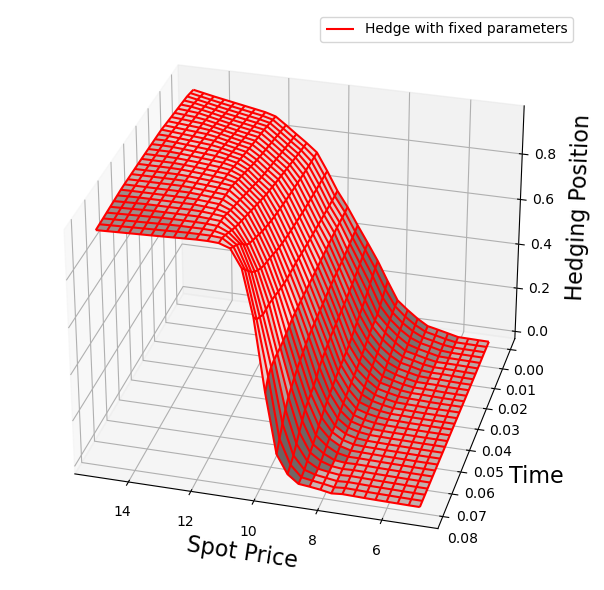

In [10]:
nr_discrete_points = 30 # Number of discrete points for the grid
# Create list of times and values
times = np.linspace(0,T,nr_discrete_points+1)[:-1]
values = np.linspace(x_0-x_0*0.5,x_0+x_0*0.5,nr_discrete_points)
# Empty grid
grid_fix = np.zeros((nr_discrete_points,nr_discrete_points))
#grid_Delta_hedge = np.zeros((nr_discrete_points,nr_discrete_points))
# Fill the grid with the values of the trained hedge
for i in range(len(times)):
    for j in range(len(values)):
        grid_fix[i,j] = hedge_fix([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]
        #grid_Delta_hedge[i,j] = BS_Delta(0.5,0,values[j],T-times[i],x_0)

# 3D PLOT
X, Y = np.meshgrid(values, times)

style.use('default')
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(bottom=0.15)
ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax.plot_wireframe(X, Y , grid_Delta_hedge,color = "darkred",label = "Delta-Hedge")
ax.plot_surface(X, Y , grid_fix,color = "mistyrose")
ax.plot_wireframe(X, Y , grid_fix,color = "red",label = "Hedge with fixed parameters")

ax.view_init(30, 105)
ax.set_ylabel("Time", fontsize=16, labelpad=15)
ax.set_xlabel("Spot Price", fontsize=16)
ax.set_zlabel("Hedging Position", fontsize=16, labelpad=10)
plt.legend()
plt.tight_layout()
plt.savefig('eps/fig_3d_gamma_uncertain_fix.eps', format='eps')
plt.show()

Sample Data

In [11]:
style.use('ggplot')
BATCH_SIZE = 50000 # Nr of Samples for the Histogram
t_k = np.linspace(0,T,n+1)

# The hedge with fix gamma
path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated_fix = [hedge_fix([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S_fix = tf.reduce_sum([hedge_evaluated_fix[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch_fix = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)])

# The hedge for the model with uncertainty
path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated = [hedge([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S = tf.reduce_sum([hedge_evaluated[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)]) 

Compare the hedges on samples under uncertainty.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
C:\Users\julia\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


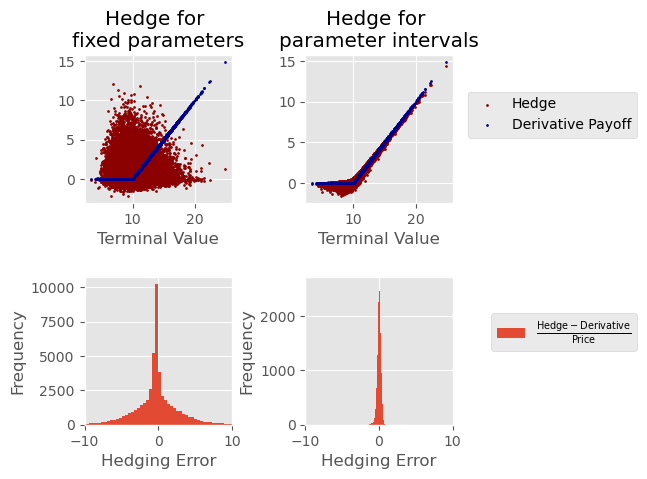

In [24]:
style.use('ggplot')
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5,wspace = 0.5,right=0.7)
axs[0,0].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price_fix + delta_S_fix,(BATCH_SIZE,1)),
            color = "darkred",label = "Hedge",s=2)
axs[0,0].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative Payoff",s=2)
axs[0,0].set_xlabel("Terminal Value")
axs[0,0].set_title("Hedge for \nfixed parameters")
axs[0,0].legend(loc = 0, bbox_to_anchor=(3.8, 0.8))

axs[0,1].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price + delta_S,(BATCH_SIZE,1)),
            color = "darkred",label = "Hedge",s=2)
axs[0,1].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative",s=2)
axs[0,1].set_xlabel("Terminal Value")
axs[0,1].set_title("Hedge for \nparameter intervals")

hedging_error_fix = (((price_fix + delta_S_fix) - derivative_on_batch)/price_fix).numpy()
axs[1,0].hist(hedging_error_fix,100,label = r"$\frac{\mathrm{Hedge}-\mathrm{Derivative}}{\mathrm{Price}}$")
axs[1,0].set_ylabel("Frequency")
axs[1,0].set_xlim([-10,10])
axs[1,0].set_xlabel("Hedging Error")
axs[1,0].legend(loc = 0, bbox_to_anchor=(3.8, 0.8))

hedging_error = (((price + delta_S) - derivative_on_batch)/price).numpy()
axs[1,1].hist(hedging_error,100)
axs[1,1].set_xlabel("Hedging Error")
axs[1,1].set_xlim([-10,10])
axs[1,1].set_ylabel("Frequency")

fig.savefig('eps/fig_call_example_hedge_error.eps', format='eps')
fig.show()

Plot the difference of the hedging errors in a histogram

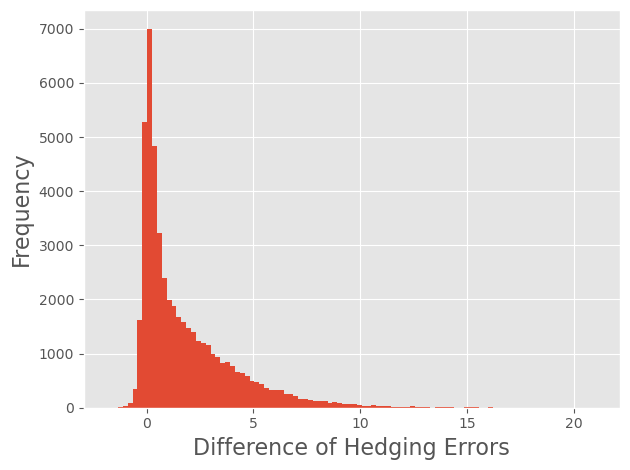

In [30]:
hedging_difference = np.abs(hedging_error_fix) - np.abs(hedging_error)
plt.hist(hedging_difference,100)
#plt.xlim([-2,2])
plt.xlabel("Difference of Hedging Errors", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
#plt.title("Difference of Hedging Errors", fontsize=16)
plt.tight_layout()
plt.savefig('eps/fig_histogram_call_difference.eps', format='eps')
plt.show()

Statistics on the difference

In [14]:
pd.DataFrame(hedging_difference).describe()

,0
count,50000.000000
mean,1.115552
std,1.433807
min,-1.465479
25%,0.091332
50%,0.571255
75%,1.735897
max,13.029090


## Statistics on Hedging Errors

Hedging Error of the non-robust strategy.

In [15]:
print("Price of the fix hedge: {}".format(price_fix))
print("Price of the robust hedge: {}".format(price))

Price of the fix hedge: 0.6257348656654358
Price of the robust hedge: 0.793061375617981


### Absolute Error

Hedging Error of the fix strategy.

In [26]:
pd.DataFrame(np.abs(hedging_error_fix)*price_fix).describe()

,0
count,50000.000000
mean,1.268144
std,1.417333
min,0.000038
25%,0.230051
50%,0.724084
75%,1.874337
max,13.590071


Hedging Error of the robust strategy.

In [27]:
pd.DataFrame(np.abs(hedging_error)*price).describe()

,0
count,50000.000000
mean,0.152592
std,0.129820
min,0.000006
25%,0.056878
50%,0.120926
75%,0.214522
max,1.610613


### Relative Error

In [28]:
pd.DataFrame(np.abs(hedging_error_fix)).describe()

,0
count,50000.000000
mean,2.026648
std,2.265069
min,0.000061
25%,0.367649
50%,1.157173
75%,2.995417
max,21.718576


In [29]:
pd.DataFrame(np.abs(hedging_error)).describe()

,0
count,50000.000000
mean,0.192409
std,0.163695
min,0.000008
25%,0.071720
50%,0.152480
75%,0.270499
max,2.030881
